In [2]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(stringr)
library(Sierra)
library(presto)
library(ggplot2)
library(msigdbr)
library(fgsea)
library(sctransform)
library(tidyverse)
setwd('/data1/APA/Paul_ALS_Data/')

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
"replacing previous import 'GenomicRanges::union' by 'dplyr::union' when loading 'Sierra'"
Warning message:
"replacing previous import 'GenomicRanges::intersect' by 'dplyr::intersect' when loading 'Sierra'"
Warning message:
"replacing previous import 'GenomicRanges::setdiff' by 'dplyr::setdiff' when loading 'Sierra'"
Warning message:
"replacing previous import 'Gviz::tail' by 'utils::tail' when loading 'Sierra'"
Warning message:
"replacing previous import 'Gviz::head' by 'utils::head' when loading 'Sierra'"
Loading required package: Rcpp

Loading required package: data.table


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


Registered S3 method overwritten by 'cli':
  method     f

In [3]:
reference.file <- '/home/aiden/data/refgenome/refdata-gex-GRCh38-2020-A/genes//genes.gtf'
gtf_gr <- rtracklayer::import(reference.file)
gtf_TxDb <- GenomicFeatures::makeTxDbFromGFF(reference.file, format="gtf")

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
OK



In [3]:
ge_so_hmctx_ref <- readRDS('rdata/human_motor-ctx_ref.RDS')
ge_so_hmctx_ref

An object of class Seurat 
3000 features across 24526 samples within 1 assay 
Active assay: refAssay (3000 features, 0 variable features)
 2 dimensional reductions calculated: refUMAP, refDR

In [11]:
ge_so_als_P <- readRDS('rdata/C9_RNA.RDS')

In [19]:
ge_so_als_P

An object of class Seurat 
68360 features across 113455 samples within 3 assays 
Active assay: SCT (30118 features, 0 variable features)
 2 other assays present: RNA, integrated
 3 dimensional reductions calculated: pca, tsne, umap

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



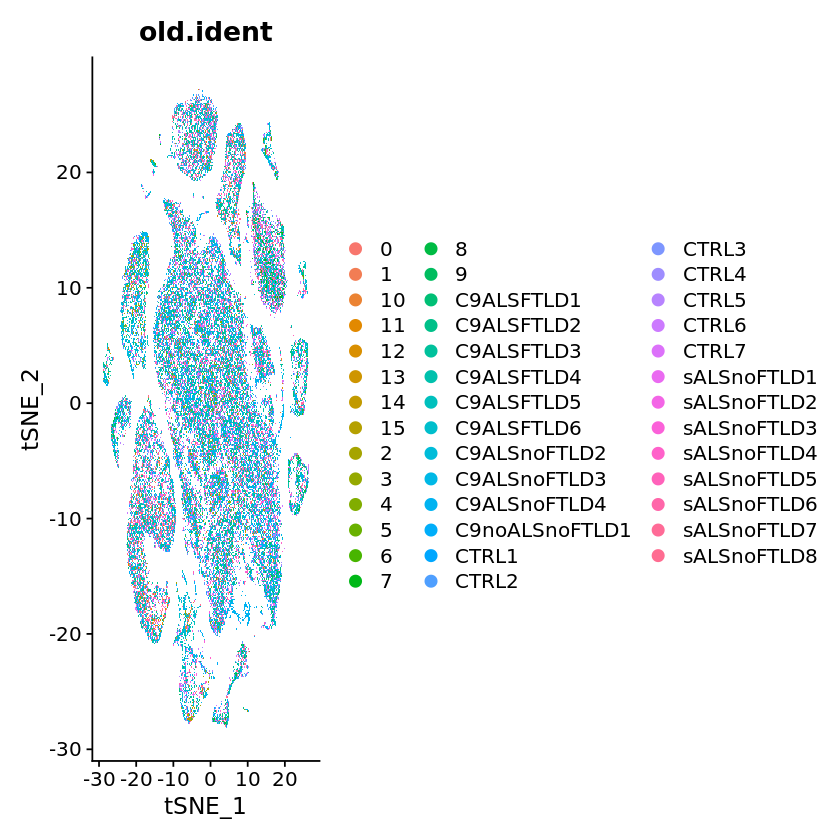

In [18]:
DimPlot(ge_so_als_P, reduction = 'tsne', group.by = 'old.ident')

In [27]:
# ref_ct_Dim <- readRDS('/data/APAproject/post_qual/data/Dimitry_Velmeshev_ASD/rdata/Control_cell_types_GE_PFC.rds')
ref_ct_Dim <- SCTransform(ref_ct_Dim, verbose = T)

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 33415 by 30147

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"


  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 52 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 33415 genes



  |======================================================================| 100%


Computing corrected count matrix for 33415 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 7.738835 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



In [30]:
query.anchors <- FindTransferAnchors(reference = ref_ct_Dim, query = ge_so_als_P,
    dims = 1:30, reference.reduction = "pca", normalization.method='SCT')
predictions <- TransferData(anchorset = query.anchors, refdata = ref_ct_Dim$main_cellTypes,
    dims = 1:30)
ge_so_als_P <- AddMetaData(ge_so_als_P, metadata = predictions)

Normalizing query using reference SCT model

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 8986 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



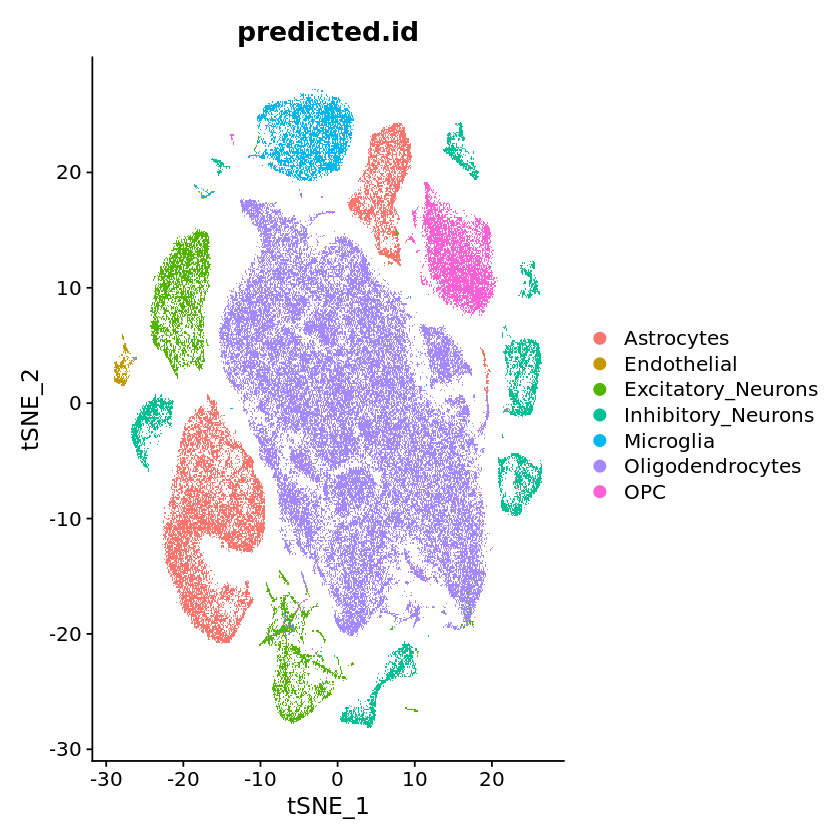

In [32]:
DimPlot(ge_so_als_P, reduction = 'tsne', group.by = 'predicted.id')

In [33]:
ge_so_als_P$main_celltypes <- ge_so_als_P$predicted.id

In [34]:
query.anchors <- FindTransferAnchors(reference = ref_ct_Dim, query = ge_so_als_P,
    dims = 1:30, reference.reduction = "pca", normalization.method='SCT')
predictions <- TransferData(anchorset = query.anchors, refdata = ref_ct_Dim$cluster,
    dims = 1:30)
ge_so_als_P <- AddMetaData(ge_so_als_P, metadata = predictions)

Normalizing query using reference SCT model

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 8986 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [35]:
ge_so_als_P$sub_celltypes <- ge_so_als_P$predicted.id

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



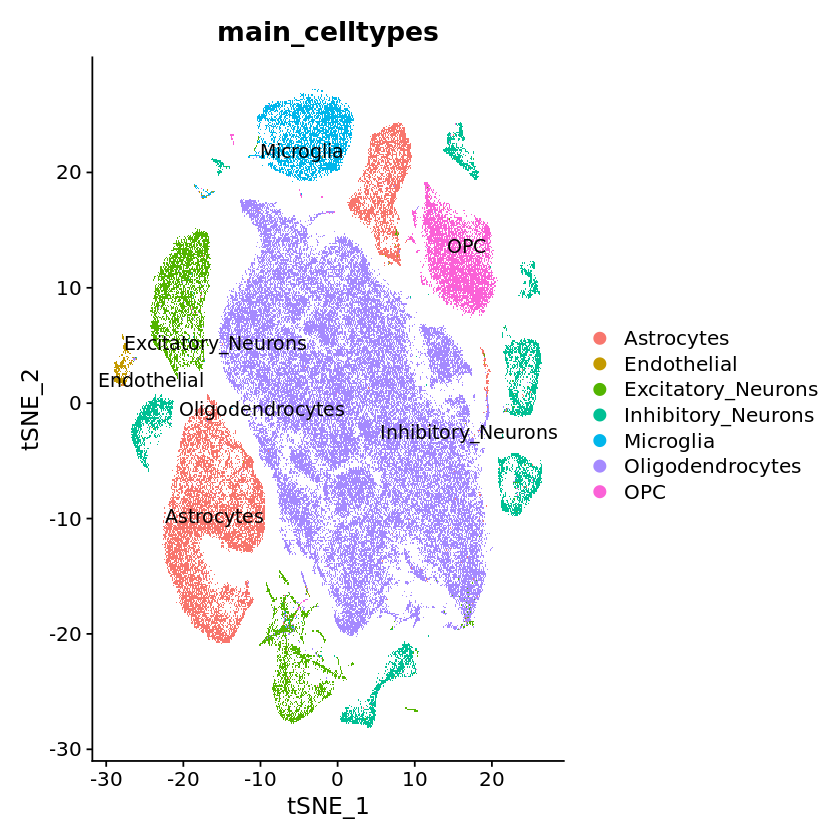

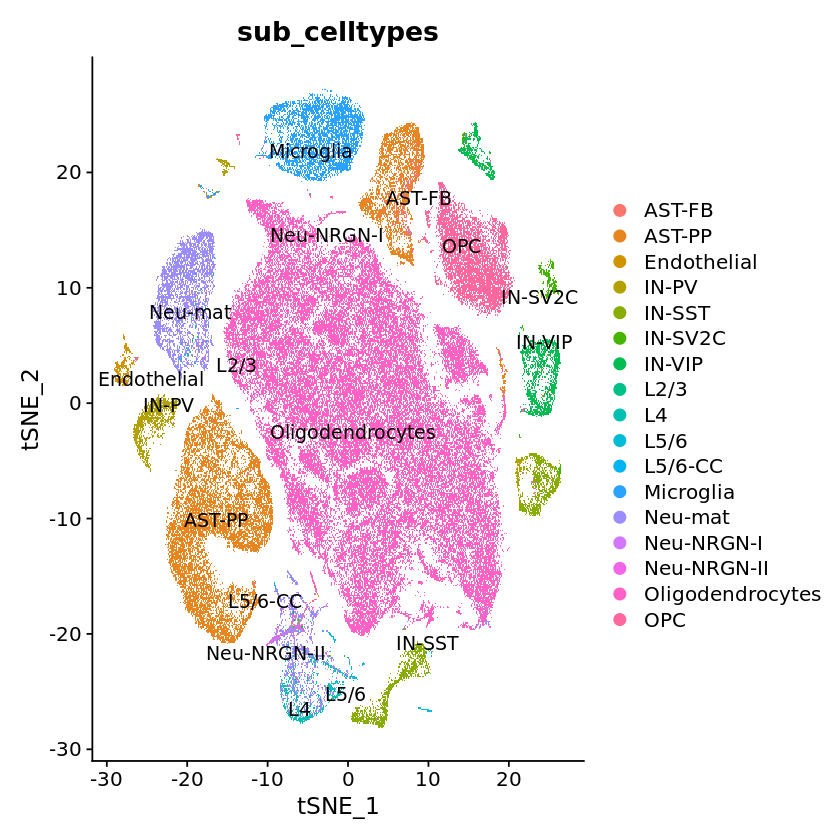

In [37]:
DimPlot(ge_so_als_P, reduction = 'tsne', group.by = 'main_celltypes', label = T, repel = T)
DimPlot(ge_so_als_P, reduction = 'tsne', group.by = 'sub_celltypes', label = T, repel = T)

In [39]:
table(ge_so_als_P$group)


    C9ALSFTLD   C9ALSnoFTLD C9noALSnoFTLD       control    sALSnoFTLD 
        30285         21666          4437         29708         27359 

In [40]:
ge_so_als_P <- subset(ge_so_als_P, subset=sample!= 'C9ALSnoFTLD4')
ge_so_als_P

An object of class Seurat 
68360 features across 106266 samples within 3 assays 
Active assay: SCT (30118 features, 0 variable features)
 2 other assays present: RNA, integrated
 3 dimensional reductions calculated: pca, tsne, umap

In [41]:
saveRDS(ge_so_als_P, 'rdata/ALS_CT_labeled.rds')

In [46]:
names(table(ge_so_als_P$sample))

[1] "C9ALSFTLD1"    "C9ALSFTLD2"    "C9ALSFTLD3"    "C9ALSFTLD4"   
 [5] "C9ALSFTLD5"    "C9ALSFTLD6"    "C9ALSnoFTLD1"  "C9ALSnoFTLD2" 
 [9] "C9ALSnoFTLD3"  "C9noALSnoFTLD" "CTRL1"         "CTRL2"        
[13] "CTRL3"         "CTRL4"         "CTRL5"         "CTRL6"        
[17] "CTRL7"         "sALSnoFTLD1"   "sALSnoFTLD2"   "sALSnoFTLD3"  
[21] "sALSnoFTLD4"   "sALSnoFTLD5"   "sALSnoFTLD6"   "sALSnoFTLD7"  
[25] "sALSnoFTLD8"

In [3]:
ge_so_als_P <- readRDS('rdata/ALS_CT_labeled.rds')

In [6]:
Cells(ge_so_als_P)[55555]

[1] "sALSnoFTLD8_GCTTCACGTAGGGAGG-1"

In [11]:
ge_so_als_P$cellnames <- Cells(ge_so_als_P)
cell_sample_df <- data.frame(cells= ge_so_als_P$cellnames, sample=ge_so_als_P$sample)
cell_sample_df

cells                            sample       
CTRL1_AAACCCACACAGCTGC-1         CTRL1_AAACCCACACAGCTGC-1         CTRL1        
CTRL1_AAACCCATCCCATACC-1         CTRL1_AAACCCATCCCATACC-1         CTRL1        
CTRL1_AAACCCATCTGTCGCT-1         CTRL1_AAACCCATCTGTCGCT-1         CTRL1        
CTRL1_AAACGAAGTAGGACTG-1         CTRL1_AAACGAAGTAGGACTG-1         CTRL1        
CTRL1_AAACGAATCGCGATCG-1         CTRL1_AAACGAATCGCGATCG-1         CTRL1        
CTRL1_AAACGCTAGAGCCGAT-1         CTRL1_AAACGCTAGAGCCGAT-1         CTRL1        
CTRL1_AAACGCTAGCTCCCTT-1         CTRL1_AAACGCTAGCTCCCTT-1         CTRL1        
CTRL1_AAACGCTCAGACACAG-1         CTRL1_AAACGCTCAGACACAG-1         CTRL1        
CTRL1_AAACGCTGTCACGACC-1         CTRL1_AAACGCTGTCACGACC-1         CTRL1        
CTRL1_AAACGCTGTGCCCAGT-1         CTRL1_AAACGCTGTGCCCAGT-1         CTRL1        
CTRL1_AAAGAACAGCCGCTTG-1         CTRL1_AAAGAACAGCCGCTTG-1         CTRL1        
CTRL1_AAAGAACCAACACAGG-1         CTRL1_AAAGAACCAACACAGG-1         CTRL1        
CTRL1_AAAGAACTCCATCTCG-1         CTRL1_AAAGAACTCCATCTCG-1         CTRL1        
CTRL1_AAAGAACTCCTTGACC-1         CTRL1_AAAGAACTCCTTGACC-1         CTRL1        
CTRL1_AAAGGGCAGAAACTGT-1         CTRL1_AAAGGGCAGAAACTGT-1         CTRL1        
CTRL1_AAAGGGCAGAGGTTTA-1         CTRL1_AAAGGGCAGAGGTTTA-1         CTRL1        
CTRL1_AAAGGGCAGCGATGGT-1         CTRL1_AAAGGGCAGCGATGGT-1         CTRL1        
CTRL1_AAAGGGCCACCTTCCA-1         CTRL1_AAAGGGCCACCTTCCA-1         CTRL1        
CTRL1_AAAGGGCGTACTTCCC-1         CTRL1_AAAGGGCGTACTTCCC-1         CTRL1        
CTRL1_AAAGGTAAGCATGCAG-1         CTRL1_AAAGGTAAGCATGCAG-1         CTRL1        
CTRL1_AAAGGTACAATGAAAC-1         CTRL1_AAAGGTACAATGAAAC-1         CTRL1        
CTRL1_AAAGTCCGTACGACAG-1         CTRL1_AAAGTCCGTACGACAG-1         CTRL1        
CTRL1_AAAGTCCGTGGAACAC-1         CTRL1_AAAGTCCGTGGAACAC-1         CTRL1        
CTRL1_AAAGTCCTCTCATGGA-1         CTRL1_AAAGTCCTCTCATGGA-1         CTRL1        
CTRL1_AAAGTGACATAGGCGA-1         CTRL1_AAAGTGACATAGGCGA-1         CTRL1        
CTRL1_AAAGTGAGTGTCACAT-1         CTRL1_AAAGTGAGTGTCACAT-1         CTRL1        
CTRL1_AAAGTGATCCTGATAG-1         CTRL1_AAAGTGATCCTGATAG-1         CTRL1        
CTRL1_AAATGGAAGAGTGGCT-1         CTRL1_AAATGGAAGAGTGGCT-1         CTRL1        
CTRL1_AAATGGATCGACCACG-1         CTRL1_AAATGGATCGACCACG-1         CTRL1        
CTRL1_AACAAAGAGTAACCTC-1         CTRL1_AACAAAGAGTAACCTC-1         CTRL1        
⋮                                ⋮                                ⋮            
C9noALSnoFTLD_TTTCAGTTCTTACGGA-1 C9noALSnoFTLD_TTTCAGTTCTTACGGA-1 C9noALSnoFTLD
C9noALSnoFTLD_TTTCATGAGTTCATGC-1 C9noALSnoFTLD_TTTCATGAGTTCATGC-1 C9noALSnoFTLD
C9noALSnoFTLD_TTTCATGTCTTACGGA-1 C9noALSnoFTLD_TTTCATGTCTTACGGA-1 C9noALSnoFTLD
C9noALSnoFTLD_TTTCCTCAGTCTGCAT-1 C9noALSnoFTLD_TTTCCTCAGTCTGCAT-1 C9noALSnoFTLD
C9noALSnoFTLD_TTTCCTCGTTGTTGTG-1 C9noALSnoFTLD_TTTCCTCGTTGTTGTG-1 C9noALSnoFTLD
C9noALSnoFTLD_TTTCCTCTCACCGCTT-1 C9noALSnoFTLD_TTTCCTCTCACCGCTT-1 C9noALSnoFTLD
C9noALSnoFTLD_TTTCGATGTCGCATCG-1 C9noALSnoFTLD_TTTCGATGTCGCATCG-1 C9noALSnoFTLD
C9noALSnoFTLD_TTTCGATGTTGCAAGG-1 C9noALSnoFTLD_TTTCGATGTTGCAAGG-1 C9noALSnoFTLD
C9noALSnoFTLD_TTTCGATTCCAGTACA-1 C9noALSnoFTLD_TTTCGATTCCAGTACA-1 C9noALSnoFTLD
C9noALSnoFTLD_TTTGACTAGGGCAGTT-1 C9noALSnoFTLD_TTTGACTAGGGCAGTT-1 C9noALSnoFTLD
C9noALSnoFTLD_TTTGACTCAAAGCTAA-1 C9noALSnoFTLD_TTTGACTCAAAGCTAA-1 C9noALSnoFTLD
C9noALSnoFTLD_TTTGACTCAACGTTAC-1 C9noALSnoFTLD_TTTGACTCAACGTTAC-1 C9noALSnoFTLD
C9noALSnoFTLD_TTTGACTGTGCATCTA-1 C9noALSnoFTLD_TTTGACTGTGCATCTA-1 C9noALSnoFTLD
C9noALSnoFTLD_TTTGACTTCAGGCGAA-1 C9noALSnoFTLD_TTTGACTTCAGGCGAA-1 C9noALSnoFTLD
C9noALSnoFTLD_TTTGATCAGCTGTTCA-1 C9noALSnoFTLD_TTTGATCAGCTGTTCA-1 C9noALSnoFTLD
C9noALSnoFTLD_TTTGATCGTCGGTGAA-1 C9noALSnoFTLD_TTTGATCGTCGGTGAA-1 C9noALSnoFTLD
C9noALSnoFTLD_TTTGATCTCGCCATAA-1 C9noALSnoFTLD_TTTGATCTCGCCATAA-1 C9noALSnoFTLD
C9noALSnoFTLD_TTTGGAGGTAGCGTTT-1 C9noALSnoFTLD_TTTGGAGGTAGCGTTT-1 C9noALSnoFTLD
C9noALSnoFTLD_TTTGGAGTCGCTAGCG-1 

In [39]:
for (sample in unique(ge_so_als_P$sample)){
    tmp_df <- cell_sample_df[cell_sample_df$sample == sample,]
    tmp_df <- tmp_df %>% mutate(bc= sub(".*_(.*)","\\1",cells))
    outname <- paste0('bams_in/',sample,'_barcodes.tsv')
    write.table(tmp_df$bc, file=outname, quote=F, row.names=F, col.names=F)
}

In [16]:
cell_sample_df[cell_sample_df$sample == sample,]

cells                    sample
CTRL1_AAACCCACACAGCTGC-1 CTRL1_AAACCCACACAGCTGC-1 CTRL1 
CTRL1_AAACCCATCCCATACC-1 CTRL1_AAACCCATCCCATACC-1 CTRL1 
CTRL1_AAACCCATCTGTCGCT-1 CTRL1_AAACCCATCTGTCGCT-1 CTRL1 
CTRL1_AAACGAAGTAGGACTG-1 CTRL1_AAACGAAGTAGGACTG-1 CTRL1 
CTRL1_AAACGAATCGCGATCG-1 CTRL1_AAACGAATCGCGATCG-1 CTRL1 
CTRL1_AAACGCTAGAGCCGAT-1 CTRL1_AAACGCTAGAGCCGAT-1 CTRL1 
CTRL1_AAACGCTAGCTCCCTT-1 CTRL1_AAACGCTAGCTCCCTT-1 CTRL1 
CTRL1_AAACGCTCAGACACAG-1 CTRL1_AAACGCTCAGACACAG-1 CTRL1 
CTRL1_AAACGCTGTCACGACC-1 CTRL1_AAACGCTGTCACGACC-1 CTRL1 
CTRL1_AAACGCTGTGCCCAGT-1 CTRL1_AAACGCTGTGCCCAGT-1 CTRL1 
CTRL1_AAAGAACAGCCGCTTG-1 CTRL1_AAAGAACAGCCGCTTG-1 CTRL1 
CTRL1_AAAGAACCAACACAGG-1 CTRL1_AAAGAACCAACACAGG-1 CTRL1 
CTRL1_AAAGAACTCCATCTCG-1 CTRL1_AAAGAACTCCATCTCG-1 CTRL1 
CTRL1_AAAGAACTCCTTGACC-1 CTRL1_AAAGAACTCCTTGACC-1 CTRL1 
CTRL1_AAAGGGCAGAAACTGT-1 CTRL1_AAAGGGCAGAAACTGT-1 CTRL1 
CTRL1_AAAGGGCAGAGGTTTA-1 CTRL1_AAAGGGCAGAGGTTTA-1 CTRL1 
CTRL1_AAAGGGCAGCGATGGT-1 CTRL1_AAAGGGCAGCGATGGT-1 CTRL1 
CTRL1_AAAGGGCCACCTTCCA-1 CTRL1_AAAGGGCCACCTTCCA-1 CTRL1 
CTRL1_AAAGGGCGTACTTCCC-1 CTRL1_AAAGGGCGTACTTCCC-1 CTRL1 
CTRL1_AAAGGTAAGCATGCAG-1 CTRL1_AAAGGTAAGCATGCAG-1 CTRL1 
CTRL1_AAAGGTACAATGAAAC-1 CTRL1_AAAGGTACAATGAAAC-1 CTRL1 
CTRL1_AAAGTCCGTACGACAG-1 CTRL1_AAAGTCCGTACGACAG-1 CTRL1 
CTRL1_AAAGTCCGTGGAACAC-1 CTRL1_AAAGTCCGTGGAACAC-1 CTRL1 
CTRL1_AAAGTCCTCTCATGGA-1 CTRL1_AAAGTCCTCTCATGGA-1 CTRL1 
CTRL1_AAAGTGACATAGGCGA-1 CTRL1_AAAGTGACATAGGCGA-1 CTRL1 
CTRL1_AAAGTGAGTGTCACAT-1 CTRL1_AAAGTGAGTGTCACAT-1 CTRL1 
CTRL1_AAAGTGATCCTGATAG-1 CTRL1_AAAGTGATCCTGATAG-1 CTRL1 
CTRL1_AAATGGAAGAGTGGCT-1 CTRL1_AAATGGAAGAGTGGCT-1 CTRL1 
CTRL1_AAATGGATCGACCACG-1 CTRL1_AAATGGATCGACCACG-1 CTRL1 
CTRL1_AACAAAGAGTAACCTC-1 CTRL1_AACAAAGAGTAACCTC-1 CTRL1 
⋮                        ⋮                        ⋮     
CTRL1_TTTACGTCATGGAATA-1 CTRL1_TTTACGTCATGGAATA-1 CTRL1 
CTRL1_TTTACGTGTACACTCA-1 CTRL1_TTTACGTGTACACTCA-1 CTRL1 
CTRL1_TTTACTGAGAGCTTTC-1 CTRL1_TTTACTGAGAGCTTTC-1 CTRL1 
CTRL1_TTTACTGGTAGCCAGA-1 CTRL1_TTTACTGGTAGCCAGA-1 CTRL1 
CTRL1_TTTACTGGTAGTTACC-1 CTRL1_TTTACTGGTAGTTACC-1 CTRL1 
CTRL1_TTTAGTCCACGGTGCT-1 CTRL1_TTTAGTCCACGGTGCT-1 CTRL1 
CTRL1_TTTAGTCGTCCTGAAT-1 CTRL1_TTTAGTCGTCCTGAAT-1 CTRL1 
CTRL1_TTTAGTCTCCGATTAG-1 CTRL1_TTTAGTCTCCGATTAG-1 CTRL1 
CTRL1_TTTATGCAGTTACGTC-1 CTRL1_TTTATGCAGTTACGTC-1 CTRL1 
CTRL1_TTTATGCGTTCTCCAC-1 CTRL1_TTTATGCGTTCTCCAC-1 CTRL1 
CTRL1_TTTATGCTCGCAGAGA-1 CTRL1_TTTATGCTCGCAGAGA-1 CTRL1 
CTRL1_TTTCACAAGAAGCCTG-1 CTRL1_TTTCACAAGAAGCCTG-1 CTRL1 
CTRL1_TTTCACACAATGCAAA-1 CTRL1_TTTCACACAATGCAAA-1 CTRL1 
CTRL1_TTTCACATCATGCCCT-1 CTRL1_TTTCACATCATGCCCT-1 CTRL1 
CTRL1_TTTCAGTCACATACTG-1 CTRL1_TTTCAGTCACATACTG-1 CTRL1 
CTRL1_TTTCATGAGGAGAATG-1 CTRL1_TTTCATGAGGAGAATG-1 CTRL1 
CTRL1_TTTCCTCGTAAGCGGT-1 CTRL1_TTTCCTCGTAAGCGGT-1 CTRL1 
CTRL1_TTTCCTCTCCCAATAG-1 CTRL1_TTTCCTCTCCCAATAG-1 CTRL1 
CTRL1_TTTCCTCTCTATCACT-1 CTRL1_TTTCCTCTCTATCACT-1 CTRL1 
CTRL1_TTTCGATAGCGTATAA-1 CTRL1_TTTCGATAGCGTATAA-1 CTRL1 
CTRL1_TTTGACTCACTAACCA-1 CTRL1_TTTGACTCACTAACCA-1 CTRL1 
CTRL1_TTTGACTCATTCTCTA-1 CTRL1_TTTGACTCATTCTCTA-1 CTRL1 
CTRL1_TTTGACTGTATACCCA-1 CTRL1_TTTGACTGTATACCCA-1 CTRL1 
CTRL1_TTTGATCAGCTGAAGC-1 CTRL1_TTTGATCAGCTGAAGC-1 CTRL1 
CTRL1_TTTGATCGTGGAACCA-1 CTRL1_TTTGATCGTGGAACCA-1 CTRL1 
CTRL1_TTTGATCTCTCGTTTA-1 CTRL1_TTTGATCTCTCGTTTA-1 CTRL1 
CTRL1_TTTGGAGGTTAAGACA-1 CTRL1_TTTGGAGGTTAAGACA-1 CTRL1 
CTRL1_TTTGGAGTCTGCGTCT-1 CTRL1_TTTGGAGTCTGCGTCT-1 CTRL1 
CTRL1_TTTGGTTAGTGATCGG-1 CTRL1_TTTGGTTAGTGATCGG-1 CTRL1 
CTRL1_TTTGGTTTCTTGGAAC-1 CTRL1_TTTGGTTTCTTGGAAC-1 CTRL1

In [34]:
outfile <- file("bams_in/subset_bamfiles.sh")
outlines = c()
for (sample in unique(ge_so_als_P$sample)){
    bc = paste0(sample,'_barcodes.tsv')
    bamfiles = paste0(' /data1/Paul_ALS_Data/cellranger5_snRNA_output/',sample,'/outs/possorted_genome_bam.bam')
    outname = paste0(" ",sample,'_filtered.bam')
    subset_arg = '~/softwares/subset_bam --bam 'q
    bc_arg = ' --cell-barcodes '
    out_arg = ' --out-bam'
    outline = paste0(subset_arg,bamfiles, bc_arg, bc, out_arg,outname, " &")
    print(outline)
    outlines <- append(outlines, outline)
}
writeLines(outlines, outfile)
close(outfile)

[1] "~/softwares/subset_bam --bam  /data1/Paul_ALS_Data/cellranger5_snRNA_output/CTRL1/outs/possorted_genome_bam.bam --cell-barcodes CTRL1_barcodes.tsv --out-bam CTRL1_filtered.bam &"
[1] "~/softwares/subset_bam --bam  /data1/Paul_ALS_Data/cellranger5_snRNA_output/CTRL2/outs/possorted_genome_bam.bam --cell-barcodes CTRL2_barcodes.tsv --out-bam CTRL2_filtered.bam &"
[1] "~/softwares/subset_bam --bam  /data1/Paul_ALS_Data/cellranger5_snRNA_output/CTRL3/outs/possorted_genome_bam.bam --cell-barcodes CTRL3_barcodes.tsv --out-bam CTRL3_filtered.bam &"
[1] "~/softwares/subset_bam --bam  /data1/Paul_ALS_Data/cellranger5_snRNA_output/CTRL4/outs/possorted_genome_bam.bam --cell-barcodes CTRL4_barcodes.tsv --out-bam CTRL4_filtered.bam &"
[1] "~/softwares/subset_bam --bam  /data1/Paul_ALS_Data/cellranger5_snRNA_output/CTRL5/outs/possorted_genome_bam.bam --cell-barcodes CTRL5_barcodes.tsv --out-bam CTRL5_filtered.bam &"
[1] "~/softwares/subset_bam --bam  /data1/Paul_ALS_Data/cellranger5_snRNA_output

In [30]:
outlines

[1] "~/softwares/subset_bam --bam  /data1/Paul_ALS_Data/cellranger5_snRNA_output/C9noALSnoFTLDouts/possorted_genome_bam.bam--cell-barcodes C9noALSnoFTLD_barcodes.tsv --out-bam C9noALSnoFTLDfiltered.bam &"

In [40]:
ge_so_als_P <- readRDS('rdata/ALS_CT_labeled.rds')
ge_so_als_P

An object of class Seurat 
68360 features across 106266 samples within 3 assays 
Active assay: SCT (30118 features, 0 variable features)
 2 other assays present: RNA, integrated
 3 dimensional reductions calculated: pca, tsne, umap

In [226]:
Cells(ge_so_als_P)[10]

ERROR: Error in Cells(ge_so_als_P): object 'ge_so_als_P' not found


In [4]:
## lets read in the peaks object and process 

reference.file <- '/home/aiden/data/refgenome/refdata-gex-GRCh38-2020-A/genes//genes.gtf'
gtf_gr <- rtracklayer::import(reference.file)
gtf_TxDb <- GenomicFeatures::makeTxDbFromGFF(reference.file, format="gtf")
###########
peak.annotations <- read.table("sierra_out/ALS_paul_peaks_annotated.txt", 
                               header = TRUE,
                               sep = "\t",
                               row.names = 1,
                               stringsAsFactors = FALSE)

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
OK



In [20]:
peak.counts <- ReadPeakCounts(data.dir = "sierra_out/ALS_paul_Sierra_aggregate/")
ALS_all_peaks_so <- NewPeakSeurat(peak.data = peak.counts, 
                              annot.info = peak.annotations, 
                              min.cells = 50, min.peaks = 200)
ALS_all_peaks_so

[1] "Creating Seurat object with 280061 peaks and 94795 cells"


Warning message:
"The following arguments are not used: row.names"


[1] "Preparing feature table for DEXSeq"
[1] "No t-SNE coodinates included"
[1] "No UMAP coordinates included"


An object of class Seurat 
279088 features across 94795 samples within 1 assay 
Active assay: RNA (279088 features, 0 variable features)

In [21]:
ALS_all_peaks_so$cellnames <- Cells(ALS_all_peaks_so)
ALS_all_peaks_so

An object of class Seurat 
279088 features across 94795 samples within 1 assay 
Active assay: RNA (279088 features, 0 variable features)

In [22]:
ge_so_als_P$cellnames <- Cells(ge_so_als_P)

In [23]:
ge_so_als_P_filtered <- subset(ge_so_als_P, subset = cellnames %in% ALS_all_peaks_so$cellnames)
ge_so_als_P_filtered

An object of class Seurat 
68360 features across 94795 samples within 3 assays 
Active assay: SCT (30118 features, 0 variable features)
 2 other assays present: RNA, integrated
 3 dimensional reductions calculated: pca, tsne, umap

In [24]:
#### change the name of nCount_RNA and nFeature_RNA
ALS_all_peaks_so$nCount_peaks <- ALS_all_peaks_so$nCount_RNA
ALS_all_peaks_so$nFeature_peaks <- ALS_all_peaks_so$nFeature_RNA

In [25]:
ALS_all_peaks_so <- AddMetaData(ALS_all_peaks_so, metadata = ge_so_als_P_filtered@meta.data)

In [26]:
saveRDS(ALS_all_peaks_so, 'rdata/ALS_all_peaks_so.rds')

In [6]:
#### second chapter do the UTR shift analysis

peaks_so <- readRDS('rdata/ALS_all_peaks_so.rds')
peaks_so

An object of class Seurat 
279088 features across 94795 samples within 1 assay 
Active assay: RNA (279088 features, 0 variable features)

In [6]:
table(peaks_so$main_celltypes)


        Astrocytes        Endothelial Excitatory_Neurons Inhibitory_Neurons 
             16186                598               8197               7697 
         Microglia   Oligodendrocytes                OPC 
              4934              50065               7118 

In [7]:
table(peaks_so$group)


    C9ALSFTLD   C9ALSnoFTLD C9noALSnoFTLD       control    sALSnoFTLD 
        30285         14477          4437         23147         22449 

In [7]:
cond <- peaks_so$group
celltype <- peaks_so$main_celltypes
df <- data.frame(cond=cond, celltype=celltype)
df

cond       celltype          
C9ALSFTLD1_AAACCCACATACACCA-1  C9ALSFTLD  Oligodendrocytes  
C9ALSFTLD1_AAACCCACATCGAACT-1  C9ALSFTLD  Oligodendrocytes  
C9ALSFTLD1_AAACGAAAGTTACGGG-1  C9ALSFTLD  Oligodendrocytes  
C9ALSFTLD1_AAACGAAGTCCATAGT-1  C9ALSFTLD  Oligodendrocytes  
C9ALSFTLD1_AAACGAAGTCCTGAAT-1  C9ALSFTLD  Oligodendrocytes  
C9ALSFTLD1_AAACGAATCTAGCATG-1  C9ALSFTLD  Inhibitory_Neurons
C9ALSFTLD1_AAACGAATCTTGGTGA-1  C9ALSFTLD  OPC               
C9ALSFTLD1_AAACGCTAGAGGATGA-1  C9ALSFTLD  Microglia         
C9ALSFTLD1_AAACGCTGTTGTGGCC-1  C9ALSFTLD  OPC               
C9ALSFTLD1_AAACGCTTCCTGTAGA-1  C9ALSFTLD  OPC               
C9ALSFTLD1_AAACGCTTCGAGAAAT-1  C9ALSFTLD  Oligodendrocytes  
C9ALSFTLD1_AAAGAACCAGTCTTCC-1  C9ALSFTLD  Microglia         
C9ALSFTLD1_AAAGAACGTACGTGAG-1  C9ALSFTLD  Microglia         
C9ALSFTLD1_AAAGAACGTTCAAGGG-1  C9ALSFTLD  Oligodendrocytes  
C9ALSFTLD1_AAAGGATAGATGTTAG-1  C9ALSFTLD  Inhibitory_Neurons
C9ALSFTLD1_AAAGGATAGTCACTGT-1  C9ALSFTLD  Oligodendrocytes  
C9ALSFTLD1_AAAGGATCAAATCAGA-1  C9ALSFTLD  Inhibitory_Neurons
C9ALSFTLD1_AAAGGTAAGCCTCGTG-1  C9ALSFTLD  Oligodendrocytes  
C9ALSFTLD1_AAAGGTAAGGTTACAA-1  C9ALSFTLD  Oligodendrocytes  
C9ALSFTLD1_AAAGGTAAGTGTTGAA-1  C9ALSFTLD  OPC               
C9ALSFTLD1_AAAGGTACAAACCACT-1  C9ALSFTLD  Excitatory_Neurons
C9ALSFTLD1_AAAGGTATCATTGTGG-1  C9ALSFTLD  Oligodendrocytes  
C9ALSFTLD1_AAAGGTATCTGTCCCA-1  C9ALSFTLD  Oligodendrocytes  
C9ALSFTLD1_AAAGGTATCTTACTGT-1  C9ALSFTLD  OPC               
C9ALSFTLD1_AAAGTCCGTAGGCTCC-1  C9ALSFTLD  Microglia         
C9ALSFTLD1_AAAGTCCGTGGCTGAA-1  C9ALSFTLD  Oligodendrocytes  
C9ALSFTLD1_AAAGTCCTCCCTTGGT-1  C9ALSFTLD  Astrocytes        
C9ALSFTLD1_AAAGTCCTCCGCTAGG-1  C9ALSFTLD  Oligodendrocytes  
C9ALSFTLD1_AAAGTGAAGCTTGTTG-1  C9ALSFTLD  Oligodendrocytes  
C9ALSFTLD1_AAAGTGACAAGGCAAC-1  C9ALSFTLD  Astrocytes        
⋮                              ⋮          ⋮                 
sALSnoFTLD8_TTTCGATAGACGGTCA-1 sALSnoFTLD OPC               
sALSnoFTLD8_TTTCGATAGCACTCAT-1 sALSnoFTLD Inhibitory_Neurons
sALSnoFTLD8_TTTCGATCAACTCGTA-1 sALSnoFTLD Astrocytes        
sALSnoFTLD8_TTTCGATCAATCTCGA-1 sALSnoFTLD OPC               
sALSnoFTLD8_TTTCGATCAGACCCGT-1 sALSnoFTLD Astrocytes        
sALSnoFTLD8_TTTCGATGTGATCGTT-1 sALSnoFTLD Astrocytes        
sALSnoFTLD8_TTTGACTGTGGTGATG-1 sALSnoFTLD OPC               
sALSnoFTLD8_TTTGATCCAGATTTCG-1 sALSnoFTLD OPC               
sALSnoFTLD8_TTTGATCCAGGTCTCG-1 sALSnoFTLD Astrocytes        
sALSnoFTLD8_TTTGATCGTAGATCGG-1 sALSnoFTLD Microglia         
sALSnoFTLD8_TTTGATCGTAGCGCCT-1 sALSnoFTLD Microglia         
sALSnoFTLD8_TTTGATCTCACCATGA-1 sALSnoFTLD Oligodendrocytes  
sALSnoFTLD8_TTTGGAGAGCGTATGG-1 sALSnoFTLD OPC               
sALSnoFTLD8_TTTGGAGAGGTGCATG-1 sALSnoFTLD Astrocytes        
sALSnoFTLD8_TTTGGAGCACTCACTC-1 sALSnoFTLD Astrocytes        
sALSnoFTLD8_TTTGGAGCATGAATCC-1 sALSnoFTLD Oligodendrocytes  
sALSnoFTLD8_TTTGGAGGTGATATAG-1 sALSnoFTLD Astrocytes        
sALSnoFTLD8_TTTGGAGTCACGGGAA-1 sALSnoFTLD OPC               
sALSnoFTLD8_TTTGGTTAGAAATTCG-1 sALSnoFTLD OPC               
sALSnoFTLD8_TTTGGTTAGGAGGCAG-1 sALSnoFTLD Oligodendrocytes  
sALSnoFTLD8_TTTGGTTCAATAGGAT-1 sALSnoFTLD Inhibitory_Neurons
sALSnoFTLD8_TTTGGTTGTCCTGTTC-1 sALSnoFTLD Oligodendrocytes  
sALSnoFTLD8_TTTGGTTGTCTGTCCT-1 sALSnoFTLD Oligodendrocytes  
sALSnoFTLD8_TTTGGTTGTTGACGGA-1 sALSnoFTLD OPC               
sALSnoFTLD8_TTTGGTTTCCCAGGCA-1 sALSnoFTLD Astrocytes        
sALSnoFTLD8_TTTGGTTTCTTCCGTG-1 sALSnoFTLD Microglia         
sALSnoFTLD8_TTTGTTGCAATGCAGG-1 sALSnoFTLD Oligodendrocytes  
sALSnoFTLD8_TTTGTTGCACTACCGG-1 sALSnoFTLD OPC               
sALSnoFTLD8_TTTGTTGTCACCGCTT-1 sALSnoFTLD Astrocytes        
sALSnoFTLD8_TTTGTTGTCTACTGCC-1 sALSnoFTLD Oligodendrocytes

In [8]:
df <- df %>% mutate(ct_cnd=paste0(cond,"_",celltype))

In [9]:
peaks_so <- AddMetaData(peaks_so, metadata = df)

In [17]:
table(peaks_so$ct_cnd)


            C9ALSFTLD_Astrocytes            C9ALSFTLD_Endothelial 
                            4900                              304 
    C9ALSFTLD_Excitatory_Neurons     C9ALSFTLD_Inhibitory_Neurons 
                            3221                             3075 
             C9ALSFTLD_Microglia       C9ALSFTLD_Oligodendrocytes 
                            1379                            15658 
                   C9ALSFTLD_OPC           C9ALSnoFTLD_Astrocytes 
                            1748                             2760 
         C9ALSnoFTLD_Endothelial   C9ALSnoFTLD_Excitatory_Neurons 
                             118                             2524 
  C9ALSnoFTLD_Inhibitory_Neurons            C9ALSnoFTLD_Microglia 
                            1553                              497 
    C9ALSnoFTLD_Oligodendrocytes                  C9ALSnoFTLD_OPC 
                            6330                              695 
        C9noALSnoFTLD_Astrocytes        C9noALSnoFTLD_Endothe

In [10]:
peaks_so <- SetIdent(peaks_so, value = peaks_so$ct_cnd)

### lets go one celltype at a time
peaks_so <- SetIdent(peaks_so, value = peaks_so$ct_cnd)
Exc_ALSFTLD_utrshift <- DetectUTRLengthShift(peaks.object = peaks_so, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'C9ALSFTLD_Excitatory_Neurons', 
                                      population.2 = 'control_Excitatory_Neurons')
Exc_ALSFTLD_utrshift
PlotUTRLengthShift(Exc_ALSFTLD_utrshift)

[1] "8786 expressed peaks in feature types UTR3"
[1] "8288 peaks after filtering out A-rich annotations"
[1] "1790 genes detected with multiple peak sites expressed"
[1] "6149 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"


genomic_feature(s) population1_pct
CCDC144A:chr17:16777088-16777628:1   UTR3               0.5297147      
CCDC144A:chr17:16776453-16777791:1   UTR3               0.6204437      
STXBP5L:chr3:121121526-121157657:1   UTR3               0.7737718      
UCHL1:chr4:41261653-41268125:1       UTR3               0.4405705      
UCHL1:chr4:41257663-41268107:1       UTR3               0.4873217      
UCHL1:chr4:41264070-41264190:1       UTR3               0.1125198      
WSB1:chr17:27312703-27313903:1       UTR3               0.4381933      
WSB1:chr17:27313084-27313249:1       UTR3               0.1422345      
WSB1:chr17:27312904-27313232:1       UTR3               0.1889857      
ITPRID2:chr2:181930226-181930738:1   UTR3               0.1786846      
ITPRID2:chr2:181929386-181930738:1   UTR3               0.1977021      
LUC7L3:chr17:50752184-50752755:1     UTR3               0.3498415      
LUC7L3:chr17:50751716-50752340:1     UTR3               0.2309826      
TARDBP:chr1:11024960-11025649:1      UTR3               0.1414422      
ITPR1:chr3:4846954-4847549:1         UTR3               0.3538035      
ATP1B1:chr1:169132215-169132722:1    UTR3               0.5396197      
ATP1B1:chr1:169131694-169132294:1    UTR3               0.2147385      
ANK2:chr4:113383217-113383803:1      UTR3               0.3403328      
SRSF5:chr14:69771357-69772005:1      UTR3               0.3819334      
SRSF5:chr14:69771006-69772005:1      UTR3               0.4461173      
SRSF5:chr14:69770298-69772005:1      UTR3               0.5467512      
SRSF5:chr14:69771201-69771683:1      UTR3               0.3391442      
OGT:chrX:71575332-71575892:1         UTR3               0.2876387      
MDM4:chr1:204551509-204552023:1      UTR3               0.1905705      
YWHAH:chr22:31957011-31957293:1      UTR3               0.2856577      
ZNF483:chr9:111553060-111553912:1    UTR3               0.3791601      
ZNF483:chr9:111553237-111553849:1    UTR3               0.3728209      
NKTR:chr3:42600674-42627647:1        UTR3               0.5344691      
NKTR:chr3:42626877-42627365:1        UTR3               0.1255943      
NKTR:chr3:42621031-42633070:1        UTR3               0.3910460      
⋮                                    ⋮                  ⋮              
POLR2J3:chr7:102563590-102564307:-1  UTR3               0.13034865     
NAPB:chr20:23375004-23375676:-1      UTR3               0.11370840     
NAP1L3:chrX:93671321-93671921:-1     UTR3               0.08716323     
NSD3:chr8:38275094-38276606:-1       UTR3               0.12400951     
TTLL7:chr1:83868875-83869541:-1      UTR3               0.10023772     
MAPK10:chr4:86015839-86016511:-1     UTR3               0.10221870     
VPS29:chr12:110491876-110496504:-1   UTR3               0.13153724     
SRSF10:chr1:23978104-23978856:-1     UTR3               0.14342314     
GABRA2:chr4:46248543-46249761:-1     UTR3               0.10221870     
G3BP2:chr4:75644866-75645697:-1      UTR3               0.06973059     
APOO:chrX:23833353-23856379:-1       UTR3               0.34825674     
HP1BP3:chr1:20744741-20747661:-1     UTR3               0.14025357     
SPOCK3:chr4:166792055-167000592:-1   UTR3               0.24484945     
NCOR1:chr17:16151071-16165131:-1     UTR3               0.16561014     
LIN7C:chr11:27498378-27506769:-1     UTR3               0.09033281     
CREG2:chr2:101350562-101351084:-1    UTR3               0.12083994     
RAB14:chr9:121180089-121181457:-1    UTR3               0.08042789     
SEPTIN8:chr5:132751706-132752286:-1  UTR3               0.15293185     
CD47:chr3:108045952-108046798:-1     UTR3               0.11885895     
DYNC1LI2:chr16:66742445-66751512:-1  UTR3               0.08201268     
MMP16:chr8:88038255-88039713:-1      UTR3               0.10974643     
TXNL1:chr18:56616284-56638755:-1     UTR3               0.15649762     
USP48:chr1:21728202-21756570:-1      UTR3               0.25316957     
MAP4K3:chr2:39325603-39333701:-1     UTR3               0.12083994     
CTSB:

[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 4.5505919132915e-23"


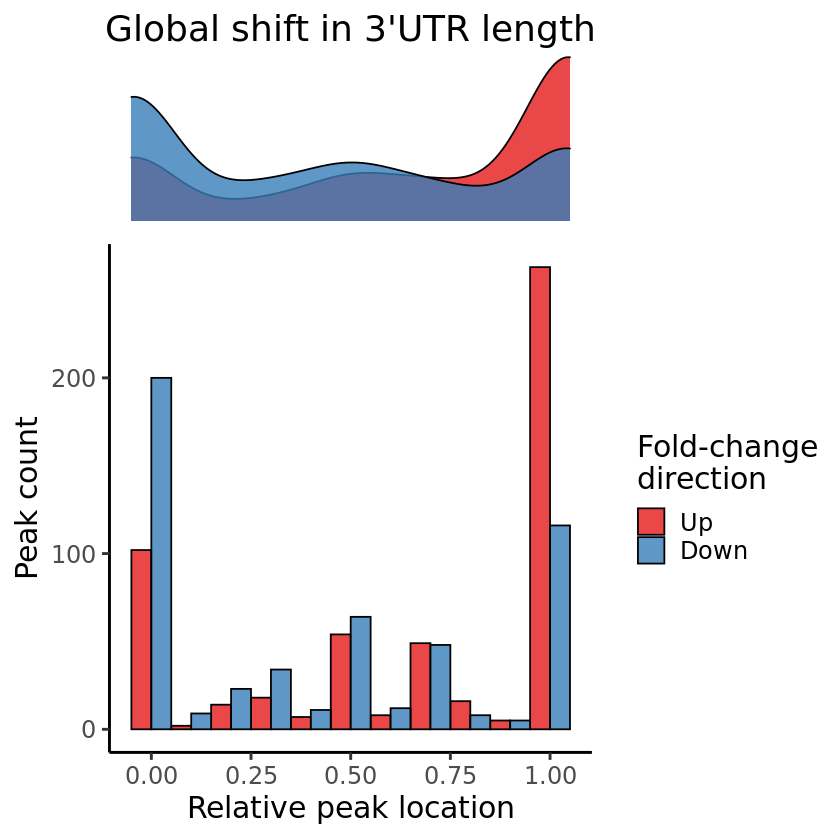

In [22]:
Exc_c9ALSnoFTLD_utrshift <- DetectUTRLengthShift(peaks.object = peaks_so, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'C9ALSnoFTLD_Excitatory_Neurons', 
                                      population.2 = 'control_Excitatory_Neurons')
Exc_c9ALSnoFTLD_utrshift
PlotUTRLengthShift(Exc_c9ALSnoFTLD_utrshift)

[1] "10965 expressed peaks in feature types UTR3"
[1] "10457 peaks after filtering out A-rich annotations"
[1] "2270 genes detected with multiple peak sites expressed"
[1] "7475 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"


genomic_feature(s) population1_pct
LUC7L3:chr17:50752184-50752755:1   UTR3               0.5082212      
LUC7L3:chr17:50751716-50752340:1   UTR3               0.2907324      
LUC7L3:chr17:50755803-50756219:1   UTR3               0.1038864      
ANK2:chr4:113383217-113383803:1    UTR3               0.4887892      
STXBP1:chr9:127692164-127692814:1  UTR3               0.6300448      
CALM1:chr14:90407839-90408268:1    UTR3               0.7182362      
CALM1:chr14:90405114-90405534:1    UTR3               0.2877429      
ZNF483:chr9:111553060-111553912:1  UTR3               0.5142003      
ZNF483:chr9:111553237-111553849:1  UTR3               0.5074738      
ITPR1:chr3:4846954-4847549:1       UTR3               0.3908819      
SYT1:chr12:79451526-79452008:1     UTR3               0.7690583      
BTBD8:chr1:92184261-92184725:1     UTR3               0.2443946      
BTBD8:chr1:92184012-92184384:1     UTR3               0.1136024      
MACF1:chr1:39486496-39487054:1     UTR3               0.3565022      
MACF1:chr1:39485933-39486659:1     UTR3               0.1883408      
MACF1:chr1:39485515-39486388:1     UTR3               0.1793722      
MACF1:chr1:39484698-39486208:1     UTR3               0.1644245      
SRSF11:chr1:70251592-70252055:1    UTR3               0.3161435      
SRSF11:chr1:70251096-70251690:1    UTR3               0.4028401      
SRSF11:chr1:70252567-70253052:1    UTR3               0.1935725      
SPTBN1:chr2:54669216-54669736:1    UTR3               0.3901345      
CCDC144A:chr17:16711653-16731905:1 UTR3               0.4985052      
TTC3:chr21:37202619-37203112:1     UTR3               0.4297459      
TTC3:chr21:37202104-37202742:1     UTR3               0.1786248      
SRRM1:chr1:24672829-24673281:1     UTR3               0.2496263      
SRRM1:chr1:24671728-24673210:1     UTR3               0.2660688      
ATP1B1:chr1:169132215-169132722:1  UTR3               0.7167414      
ATP1B1:chr1:169131694-169132294:1  UTR3               0.2683109      
ITPRID2:chr2:181930226-181930738:1 UTR3               0.2122571      
ITPRID2:chr2:181929386-181930738:1 UTR3               0.2279522      
⋮                                  ⋮                  ⋮              
CACNB4:chr2:151838964-151842082:-1 UTR3               0.05455904     
ZNF91:chr19:23358893-23360141:-1   UTR3               0.12556054     
REEP5:chr5:112878269-112887385:-1  UTR3               0.15022422     
PIAS2:chr18:46827986-46844764:-1   UTR3               0.16591928     
APOO:chrX:23833353-23856379:-1     UTR3               0.37593423     
RNF130:chr5:180013054-180040514:-1 UTR3               0.19805680     
SHTN1:chr10:116884924-116885961:-1 UTR3               0.18086697     
MAP4K3:chr2:39325603-39333701:-1   UTR3               0.11509716     
THAP4:chr2:241584405-241601917:-1  UTR3               0.13079223     
ZC3H13:chr13:46003133-46020595:-1  UTR3               0.12331839     
ZC3H13:chr13:46003144-46011684:-1  UTR3               0.09940209     
ZC3H13:chr13:46010279-46010591:-1  UTR3               0.06053812     
SPOCK1:chr5:136975298-136979198:-1 UTR3               0.42526158     
GABRB2:chr5:161288429-161288785:-1 UTR3               0.23841555     
ATXN3:chr14:92064289-92081064:-1   UTR3               0.15994021     
AGAP4:chr10:45825594-45826823:-1   UTR3               0.21599402     
EEA1:chr12:92832687-92864952:-1    UTR3               0.12630792     
AMER2:chr13:25168445-25168990:-1   UTR3               0.11883408     
CNBP:chr3:129169645-129171708:-1   UTR3               0.14798206     
SPRYD7:chr13:49914931-49936490:-1  UTR3               0.17638266     
MCCC1:chr3:183071239-183099764:-1  UTR3               0.10986547     
NCOR1:chr17:16151071-16165131:-1   UTR3               0.14499253     
ACTL6B:chr7:100643097-100646308:-1 UTR3               0.20328849     
GFOD1:chr6:13363521-13364055:-1    UTR3               0.10014948     
SNX14:chr6:85507980-85514255:-1    UTR3               0.16517190     
BOD1L1:chr4:13610873-13614267:-1   UTR3      

[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 8.13993173903484e-89"


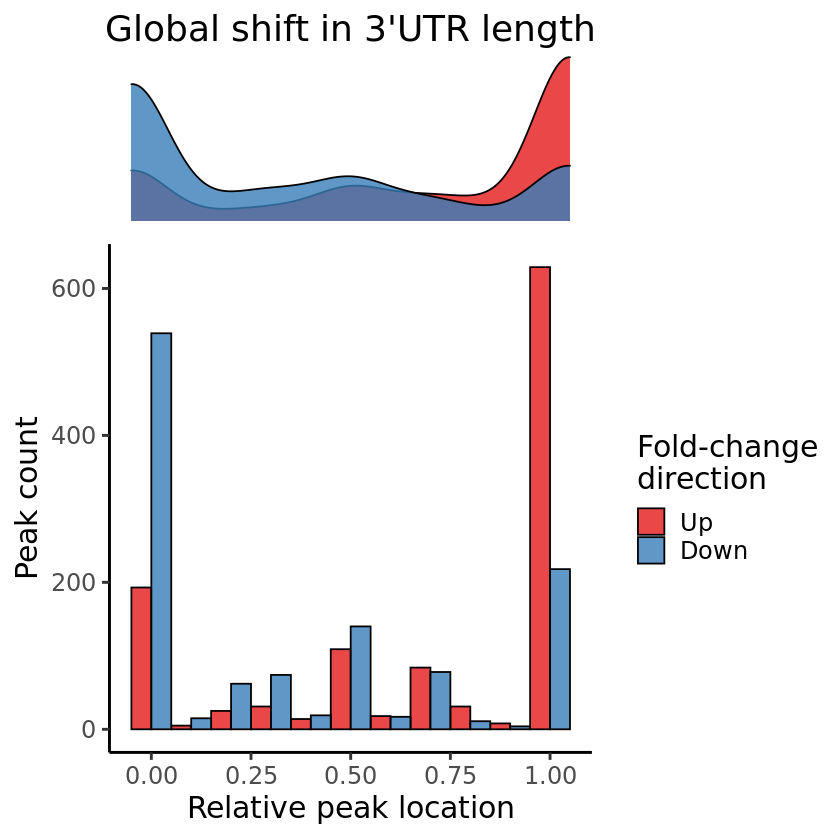

In [23]:
Exc_sALSnoFTLD_utrshift <- DetectUTRLengthShift(peaks.object = peaks_so, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'sALSnoFTLD_Excitatory_Neurons', 
                                      population.2 = 'control_Excitatory_Neurons')
Exc_sALSnoFTLD_utrshift
PlotUTRLengthShift(Exc_sALSnoFTLD_utrshift)

[1] "7758 expressed peaks in feature types UTR3"
[1] "7359 peaks after filtering out A-rich annotations"
[1] "1607 genes detected with multiple peak sites expressed"
[1] "5542 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"


genomic_feature(s) population1_pct
TNRC6A:chr16:24823957-24825169:1     UTR3               0.3636364      
TNRC6A:chr16:24825746-24826284:1     UTR3               0.1565657      
TNRC6A:chr16:24824309-24824489:1     UTR3               0.1397306      
WSB1:chr17:27312703-27313903:1       UTR3               0.5000000      
WSB1:chr17:27313084-27313249:1       UTR3               0.1700337      
ZNF655:chr7:99575892-99576453:1      UTR3               0.1178451      
OGT:chrX:71575332-71575892:1         UTR3               0.2340067      
TARDBP:chr1:11024960-11025649:1      UTR3               0.1178451      
TMEM178A:chr2:39717459-39717963:1    UTR3               0.3047138      
SNAP25:chr20:10306827-10307418:1     UTR3               0.6565657      
VSNL1:chr2:17591891-17655854:1       UTR3               0.7306397      
LUC7L3:chr17:50752184-50752755:1     UTR3               0.3400673      
LUC7L3:chr17:50755803-50756219:1     UTR3               0.1632997      
LUC7L3:chr17:50751716-50752340:1     UTR3               0.1885522      
STXBP1:chr9:127612391-127658478:1    UTR3               0.6565657      
SRSF11:chr1:70251592-70252055:1      UTR3               0.2340067      
SRSF11:chr1:70251096-70251690:1      UTR3               0.3468013      
SRSF11:chr1:70250003-70251395:1      UTR3               0.5101010      
ITPRID2:chr2:181930226-181930738:1   UTR3               0.1498316      
ITPRID2:chr2:181929386-181930738:1   UTR3               0.1717172      
NFAT5:chr16:69704198-69704666:1      UTR3               0.1195286      
RBM25:chr14:73096932-73103247:1      UTR3               0.6649832      
RBM25:chr14:73096880-73099856:1      UTR3               0.4006734      
RBM25:chr14:73096883-73097051:1      UTR3               0.2558923      
HNRNPA3:chr2:177223323-177223958:1   UTR3               0.1212121      
HNRNPA3:chr2:177222562-177223157:1   UTR3               0.1296296      
CCDC144A:chr17:16711653-16731905:1   UTR3               0.5454545      
CCDC144A:chr17:16720129-16735063:1   UTR3               0.6464646      
CCDC144A:chr17:16727534-16734947:1   UTR3               0.5791246      
CHL1:chr3:196763-325984:1            UTR3               0.7239057      
⋮                                    ⋮                  ⋮              
SERINC1:chr6:122443853-122444608:-1  UTR3               0.07744108     
CCSAP:chr1:229325138-229326991:-1    UTR3               0.16666667     
FAM3C:chr7:121349747-121350569:-1    UTR3               0.06734007     
HMGN3:chr6:79201245-79201704:-1      UTR3               0.18855219     
RSRC2:chr12:122514950-122527000:-1   UTR3               0.28114478     
HSPH1:chr13:31138413-31139224:-1     UTR3               0.09764310     
HSPH1:chr13:31138038-31139202:-1     UTR3               0.10101010     
MAP4:chr3:47973015-47973491:-1       UTR3               0.06565657     
OGA:chr10:101785842-101787459:-1     UTR3               0.17508418     
CCDC186:chr10:114123891-114128265:-1 UTR3               0.10942761     
ADD2:chr2:70663465-70663819:-1       UTR3               0.06734007     
SEPTIN8:chr5:132751706-132752286:-1  UTR3               0.09932660     
ZMYND8:chr20:47210368-47210984:-1    UTR3               0.18686869     
NAP1L1:chr12:76048135-76055038:-1    UTR3               0.27104377     
CAMKK2:chr12:121240493-121240960:-1  UTR3               0.13299663     
DST:chr6:56572962-56573979:-1        UTR3               0.06228956     
CREG2:chr2:101349696-101350203:-1    UTR3               0.06902357     
SRSF10:chr1:23967442-23975189:-1     UTR3               0.28787879     
MYT1L:chr2:1792253-1801863:-1        UTR3               0.06060606     
TBL1XR1:chr3:177024878-177026789:-1  UTR3               0.10269360     
YWHAG:chr7:76328227-76329481:-1      UTR3               0.08754209     
YWHAG:chr7:76328324-76328690:-1      UTR3               0.02693603     
ERCC1:chr19:45409531-45416947:-1     UTR3               0.14814815     
ERCC1:chr19:45409564-45414962:-1     UTR3               0.14141414     
TIA1:

[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 2.11758794517697e-06"


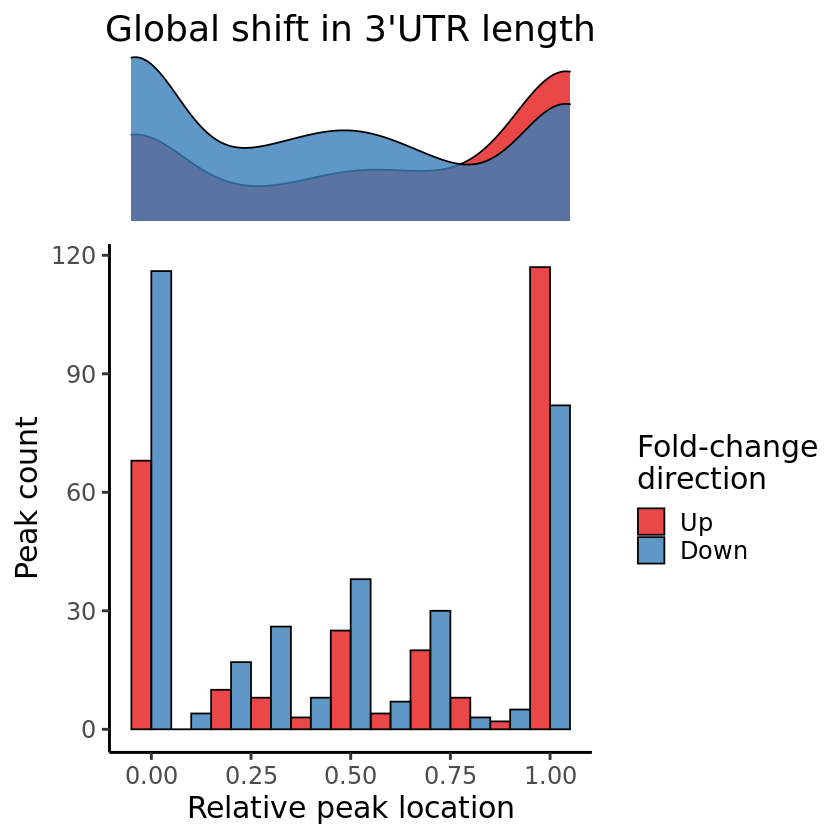

In [24]:
Exc_C9noALSnoFTLD_utrshift <- DetectUTRLengthShift(peaks.object = peaks_so, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'C9noALSnoFTLD_Excitatory_Neurons', 
                                      population.2 = 'control_Excitatory_Neurons')
Exc_C9noALSnoFTLD_utrshift
PlotUTRLengthShift(Exc_C9noALSnoFTLD_utrshift)

In [25]:
## Very nice!! the number of lengthened genes are going down!! based on severity


In [26]:
## lets compare all celltypes vs control
peaks_so <- SetIdent(peaks_so, value = peaks_so$group)


[1] "7206 expressed peaks in feature types UTR3"
[1] "6891 peaks after filtering out A-rich annotations"
[1] "1468 genes detected with multiple peak sites expressed"
[1] "5510 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"


genomic_feature(s) population1_pct
EIF4A2:chr3:186783560-186786641:1    UTR3               0.2181276      
EIF4A2:chr3:186784449-186786676:1    UTR3               0.1930272      
EIF4A2:chr3:186785707-186786516:1    UTR3               0.1270575      
CIRBP:chr19:1271555-1272748:1        UTR3               0.3577137      
CIRBP:chr19:1272166-1272814:1        UTR3               0.3047479      
CIRBP:chr19:1271270-1272315:1        UTR3               0.1808010      
QKI:chr6:163565465-163568531:1       UTR3               0.5105629      
QKI:chr6:163566898-163568134:1       UTR3               0.3204303      
QKI:chr6:163566050-163568214:1       UTR3               0.4111548      
QKI:chr6:163567851-163568925:1       UTR3               0.3330885      
QKI:chr6:163568174-163568740:1       UTR3               0.2449994      
QKI:chr6:163568521-163569165:1       UTR3               0.2294898      
QKI:chr6:163567263-163568145:1       UTR3               0.2222750      
QKI:chr6:163566730-163567138:1       UTR3               0.1800233      
QKI:chr6:163566164-163567208:1       UTR3               0.2828876      
QKI:chr6:163564959-163565847:1       UTR3               0.1919903      
RBM6:chr3:49968562-50058537:1        UTR3               0.6197347      
RBM6:chr3:50057769-50059873:1        UTR3               0.1000994      
SRSF5:chr14:69766907-69769668:1      UTR3               0.3390504      
SRSF5:chr14:69767921-69769605:1      UTR3               0.2704454      
SRSF5:chr14:69768479-69769561:1      UTR3               0.2206765      
YWHAH:chr22:31944522-31956434:1      UTR3               0.1328034      
SNAP25:chr20:10306298-10307010:1     UTR3               0.1130600      
SLC25A37:chr8:23572236-23572578:1    UTR3               0.1020003      
ZNF483:chr9:111525159-111545208:1    UTR3               0.4216529      
ZNF483:chr9:111533647-111541881:1    UTR3               0.2286257      
MAP1B:chr5:72194834-72195626:1       UTR3               0.2925217      
SCG5:chr15:32643733-32696820:1       UTR3               0.2570095      
CLDN11:chr3:170432377-170433271:1    UTR3               0.1361300      
GRAMD2B:chr5:126423051-126480659:1   UTR3               0.5130254      
⋮                                    ⋮                  ⋮              
PICALM:chr11:85957604-85958150:-1    UTR3               0.20836393     
FGFR2:chr10:121564281-121564669:-1   UTR3               0.11098630     
FGFR2:chr10:121564270-121565666:-1   UTR3               0.12852637     
ATP5MPL:chr14:103912288-103912635:-1 UTR3               0.09543353     
UBE2D3:chr4:102795740-102796809:-1   UTR3               0.16222405     
IRF2BP2:chr1:234604269-234604685:-1  UTR3               0.11232557     
ZNF83:chr19:52612313-52612869:-1     UTR3               0.11172074     
SLC11A2:chr12:50986540-50987062:-1   UTR3               0.10467879     
C1orf52:chr1:85251611-85252790:-1    UTR3               0.10325312     
SRCIN1:chr17:38530031-38530359:-1    UTR3               0.13859247     
ZCCHC24:chr10:79382325-79382762:-1   UTR3               0.16550741     
TBCA:chr5:77691166-77691489:-1       UTR3               0.12187324     
CDK5RAP2:chr9:120388968-120403487:-1 UTR3               0.16598263     
TRIM23:chr5:65589690-65591132:-1     UTR3               0.14831296     
CD47:chr3:108043171-108043885:-1     UTR3               0.18382512     
HSPH1:chr13:31136561-31137094:-1     UTR3               0.05421869     
DDRGK1:chr20:3190444-3190864:-1      UTR3               0.08722513     
DDRGK1:chr20:3190401-3191356:-1      UTR3               0.09037888     
TMTC4:chr13:100603927-100604273:-1   UTR3               0.13180974     
SCAF11:chr12:45954525-45955292:-1    UTR3               0.10480840     
PNISR:chr6:99398581-99399193:-1      UTR3               0.12532942     
PNISR:chr6:99399903-99400393:-1      UTR3               0.12269409     
CAMK2B:chr7:44217150-44217575:-1     UTR3               0.05789087     
SCARB2:chr4:76178953-76179655:-1     UTR3               0.11055428     
ADAM1

[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 6.1265807133761e-46"


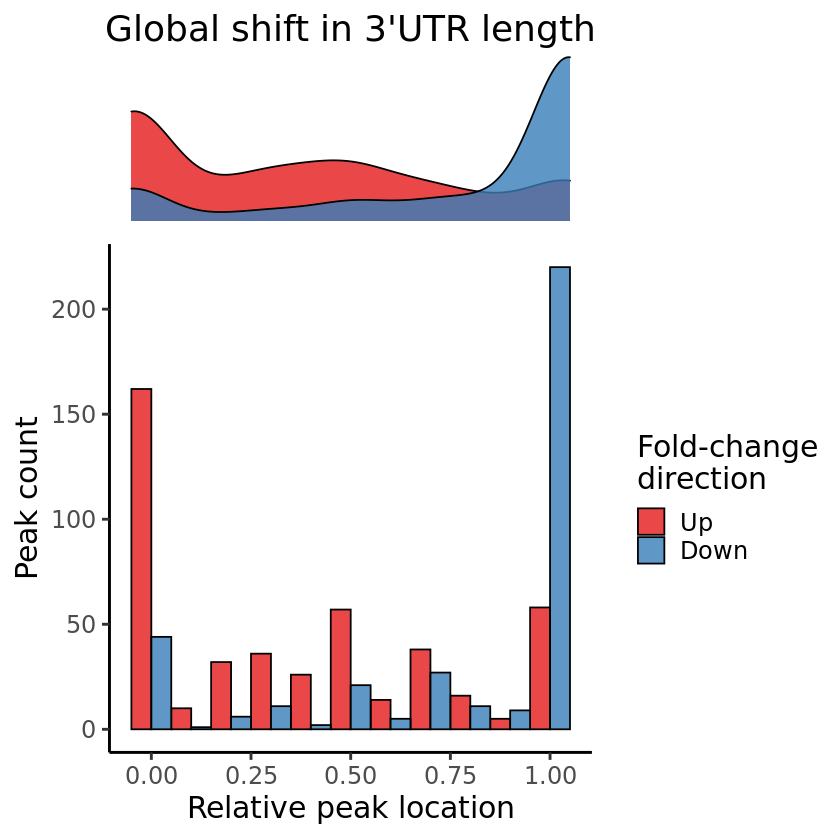

In [27]:
ctl_vs_all_utrshift <- DetectUTRLengthShift(peaks.object = peaks_so, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'control')
ctl_vs_all_utrshift
PlotUTRLengthShift(ctl_vs_all_utrshift)

In [28]:
### lets try with different chemistries:
table(peaks_so$chemistry)


   V2    V3 
21729 73066 

In [11]:
peaks_so_v3 <- subset(peaks_so, subset = chemistry == 'V3')
peaks_so_v3 <- SetIdent(peaks_so_v3, value = peaks_so_v3$ct_cnd)

[1] "10838 expressed peaks in feature types UTR3"
[1] "10281 peaks after filtering out A-rich annotations"
[1] "2283 genes detected with multiple peak sites expressed"
[1] "7850 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"


genomic_feature(s) population1_pct
NKTR:chr3:42600674-42627647:1         UTR3               0.6307301      
NKTR:chr3:42617573-42627432:1         UTR3               0.4719864      
NKTR:chr3:42618965-42620216:1         UTR3               0.2164686      
STXBP5L:chr3:121121526-121157657:1    UTR3               0.7801358      
LUC7L3:chr17:50752184-50752755:1      UTR3               0.5636672      
CCDC144A:chr17:16761562-16764339:1    UTR3               0.5161290      
CCDC144A:chr17:16761695-16761899:1    UTR3               0.1816638      
ITPR1:chr3:4846954-4847549:1          UTR3               0.4651952      
STXBP1:chr9:127692164-127692814:1     UTR3               0.6502547      
RBM25:chr14:73096880-73099856:1       UTR3               0.3998302      
RBM25:chr14:73083532-73099910:1       UTR3               0.4821732      
RBM25:chr14:73096883-73097051:1       UTR3               0.2495756      
RBM25:chr14:73096932-73103247:1       UTR3               0.5331070      
RBM25:chr14:73058532-73097044:1       UTR3               0.4762309      
RBM25:chr14:73071482-73097033:1       UTR3               0.4380306      
RBM25:chr14:73088002-73103369:1       UTR3               0.6052632      
ANK2:chr4:113383217-113383803:1       UTR3               0.3701188      
OGT:chrX:71575332-71575892:1          UTR3               0.4185059      
ZNF655:chr7:99575892-99576453:1       UTR3               0.1485569      
TTC3:chr21:37202619-37203112:1        UTR3               0.3675722      
MDM4:chr1:204551509-204552023:1       UTR3               0.1646859      
TMEM178A:chr2:39717459-39717963:1     UTR3               0.3251273      
GRIA4:chr11:105903733-105918994:1     UTR3               0.4923599      
GRIA4:chr11:105903797-105912126:1     UTR3               0.3064516      
GRIA4:chr11:105912037-105912521:1     UTR3               0.1638370      
GRIA4:chr11:105912697-105913175:1     UTR3               0.1332767      
GRIA4:chr11:105910309-105912090:1     UTR3               0.1663837      
SRRM1:chr1:24646017-24647273:1        UTR3               0.3531409      
SRRM1:chr1:24646790-24647376:1        UTR3               0.2724958      
SRRM1:chr1:24647094-24647220:1        UTR3               0.1086587      
⋮                                     ⋮                  ⋮              
SNX14:chr6:85507980-85514255:-1       UTR3               0.18760611     
COPA:chr1:160289446-160290208:-1      UTR3               0.17657046     
COPA:chr1:160289438-160290596:-1      UTR3               0.18675722     
MEF2D:chr1:156466157-156466733:-1     UTR3               0.10696095     
KCNV1:chr8:109966722-109967748:-1     UTR3               0.11205433     
IFT57:chr3:108191349-108219530:-1     UTR3               0.24533107     
SCN3B:chr11:123629187-123629585:-1    UTR3               0.27674024     
GLG1:chr16:74452785-74453279:-1       UTR3               0.10950764     
C2CD5:chr12:22448981-22449827:-1      UTR3               0.08404075     
CD164:chr6:109368604-109379651:-1     UTR3               0.13242784     
PCMTD1:chr8:51819830-51833974:-1      UTR3               0.19185059     
SUCLG1:chr2:84423528-84433478:-1      UTR3               0.20628183     
SLITRK4:chrX:143628045-143628583:-1   UTR3               0.21052632     
SRCIN1:chr17:38531518-38532072:-1     UTR3               0.22241087     
THUMPD1:chr16:20736965-20737939:-1    UTR3               0.11035654     
CFAP298:chr21:32604067-32604367:-1    UTR3               0.11629881     
SMARCC2:chr12:56181450-56182170:-1    UTR3               0.05263158     
MAPK9:chr5:180264786-180292008:-1     UTR3               0.20203735     
SKP1:chr5:134158524-134167280:-1      UTR3               0.27504244     
RAB6A:chr11:73707245-73716529:-1      UTR3               0.15619694     
SETD2:chr3:47083860-47086423:-1       UTR3               0.04668930     
ERGIC2:chr12:29339815-29340865:-1     UTR3               0.10271647     
HNRNPA0:chr5:137751439-137752109:-1   UTR3               0.13327674     
UBL3:chr13:29764371-297

[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 1.35043791437687e-20"


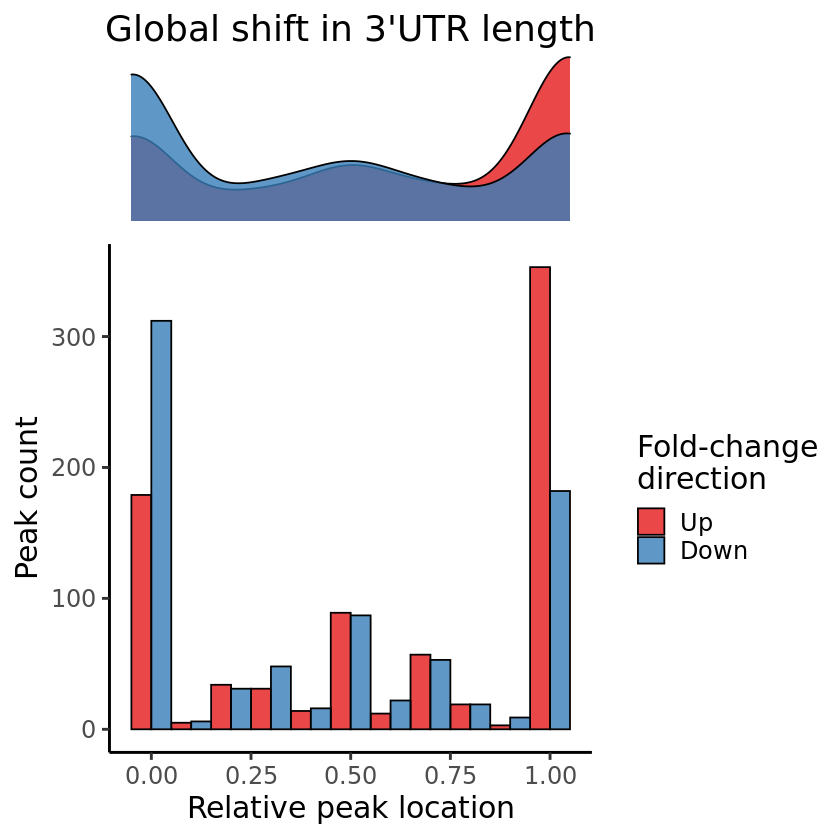

In [30]:
Exc_ALSFTLD_utrshift_v3 <- DetectUTRLengthShift(peaks.object = peaks_so_v3, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'C9ALSFTLD_Excitatory_Neurons', 
                                      population.2 = 'control_Excitatory_Neurons')
Exc_ALSFTLD_utrshift_v3
PlotUTRLengthShift(Exc_ALSFTLD_utrshift_v3)

In [33]:
# peaks_so_v2 <- subset(peaks_so, subset = chemistry == 'V2')
# peaks_so_v2 <- SetIdent(peaks_so_v2, value = peaks_so_v2$ct_cnd)
Exc_ALSFTLD_utrshift_v2 <- DetectUTRLengthShift(peaks.object = peaks_so_v2, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'C9ALSFTLD_Excitatory_Neurons', 
                                      population.2 = 'control_Excitatory_Neurons')
Exc_ALSFTLD_utrshift_v2
PlotUTRLengthShift(Exc_ALSFTLD_utrshift_v2)

[1] "7776 expressed peaks in feature types UTR3"
[1] "7372 peaks after filtering out A-rich annotations"
[1] "1627 genes detected with multiple peak sites expressed"
[1] "4634 individual peak sites to test"


ERROR: Error in profile.set2[, i] <- sub.matrix: number of items to replace is not a multiple of replacement length


In [32]:
peaks_so_v2

An object of class Seurat 
279088 features across 21729 samples within 1 assay 
Active assay: RNA (279088 features, 0 variable features)

In [36]:
res.table = DUTest(peaks_so_v2, 
                   population.1 = "control_Excitatory_Neurons",
                   population.2 = 'C9ALSFTLD_Excitatory_Neurons',
                   exp.thresh = 0.1)
res.table

[1] "10311 expressed peaks in feature types UTR3, exon"
[1] "2261 genes detected with multiple peak sites expressed"
[1] "7496 individual peak sites to test"


ERROR: Error in profile.set1[, i] <- sub.matrix: replacement has length zero


In [37]:
table(peaks_so_v2$ct_cnd)


          C9ALSFTLD_Astrocytes          C9ALSFTLD_Endothelial 
                          1799                             34 
  C9ALSFTLD_Excitatory_Neurons   C9ALSFTLD_Inhibitory_Neurons 
                          2043                           1114 
           C9ALSFTLD_Microglia     C9ALSFTLD_Oligodendrocytes 
                           284                           1700 
                 C9ALSFTLD_OPC         C9ALSnoFTLD_Astrocytes 
                           443                            763 
       C9ALSnoFTLD_Endothelial C9ALSnoFTLD_Excitatory_Neurons 
                             5                            730 
C9ALSnoFTLD_Inhibitory_Neurons          C9ALSnoFTLD_Microglia 
                           322                            103 
  C9ALSnoFTLD_Oligodendrocytes                C9ALSnoFTLD_OPC 
                          1462                            164 
         sALSnoFTLD_Astrocytes         sALSnoFTLD_Endothelial 
                          2240                        

In [38]:
## Ok since all the controls are V3 the comparison between v2 and v3 is not possible

In [39]:
table(peaks_so_v3$group)


    C9ALSFTLD   C9ALSnoFTLD C9noALSnoFTLD       control    sALSnoFTLD 
        22868         10928          4437         23147         11686 

In [40]:
peaks_so_v3 <- SetIdent(peaks_so_v3, value = peaks_so_v3$group)

[1] "7340 expressed peaks in feature types UTR3"
[1] "7011 peaks after filtering out A-rich annotations"
[1] "1502 genes detected with multiple peak sites expressed"
[1] "5625 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"


genomic_feature(s) population1_pct
LUC7L3:chr17:50752184-50752755:1    UTR3               0.4533846      
TF:chr3:133782098-133783028:1       UTR3               0.1022827      
ADD1:chr4:2929555-2930076:1         UTR3               0.3216722      
STXBP1:chr9:127692164-127692814:1   UTR3               0.1377033      
P2RX7:chr12:121185529-121186135:1   UTR3               0.2047402      
P2RX7:chr12:121187561-121188032:1   UTR3               0.2120868      
P2RX7:chr12:121184583-121185137:1   UTR3               0.2157163      
P2RX7:chr12:121184980-121185742:1   UTR3               0.1375284      
PXK:chr3:58425575-58426087:1        UTR3               0.3512332      
SCG5:chr15:32696382-32697098:1      UTR3               0.1975687      
RBM25:chr14:73096880-73099856:1     UTR3               0.2111247      
RBM25:chr14:73083532-73099910:1     UTR3               0.2782491      
RBM25:chr14:73096883-73097051:1     UTR3               0.1361728      
MOG:chr6:29659603-29660577:1        UTR3               0.2491254      
MOG:chr6:29659429-29659836:1        UTR3               0.1641158      
ZNF483:chr9:111553237-111553849:1   UTR3               0.2050901      
ZNF483:chr9:111553060-111553912:1   UTR3               0.2108186      
DNM3:chr1:172411055-172411588:1     UTR3               0.2435281      
DNM3:chr1:172412234-172412792:1     UTR3               0.1642470      
SPTBN1:chr2:54669216-54669736:1     UTR3               0.2000612      
ATP2A2:chr12:110350582-110351093:1  UTR3               0.1549764      
KLC1:chr14:103685751-103686340:1    UTR3               0.1841875      
CHL1:chr3:319571-341964:1           UTR3               0.1369162      
CHL1:chr3:328202-349663:1           UTR3               0.1273832      
PPFIBP1:chr12:27645990-27648105:1   UTR3               0.1059559      
PPFIBP1:chr12:27634925-27654752:1   UTR3               0.1842312      
MDM4:chr1:204551509-204552023:1     UTR3               0.2144044      
SRSF11:chr1:70251096-70251690:1     UTR3               0.2716022      
SOX2:chr3:181712939-181713515:1     UTR3               0.2345636      
SLC5A11:chr16:24910287-24911628:1   UTR3               0.1520903      
⋮                                   ⋮                  ⋮              
SLC1A2:chr11:35259670-35260580:-1   UTR3               0.07565157     
SLC1A2:chr11:35253847-35254945:-1   UTR3               0.04307329     
SMG1:chr16:18875987-18882412:-1     UTR3               0.06100227     
FRYL:chr4:48499047-48499794:-1      UTR3               0.11889977     
SCAPER:chr15:76701570-76728703:-1   UTR3               0.11483295     
HIPK2:chr7:139572575-139573111:-1   UTR3               0.05409306     
ATRX:chrX:77656430-77663699:-1      UTR3               0.08299808     
PPFIA2:chr12:81366693-81369655:-1   UTR3               0.07149729     
CEP290:chr12:88114306-88126357:-1   UTR3               0.10836103     
PNPT1:chr2:55671312-55679765:-1     UTR3               0.07849397     
ZRANB2:chr1:71064346-71065294:-1    UTR3               0.08225468     
KIF13B:chr8:29187861-29189085:-1    UTR3               0.08697744     
ZNF280D:chr15:56666715-56668977:-1  UTR3               0.07792549     
ZNF280D:chr15:56666700-56668238:-1  UTR3               0.07420850     
LUC7L:chr16:206014-208790:-1        UTR3               0.07635123     
UBE2D3:chr4:102797034-102801709:-1  UTR3               0.10521252     
KIAA0930:chr22:45211176-45211867:-1 UTR3               0.06830506     
PMP22:chr17:15230268-15230910:-1    UTR3               0.06620605     
ANK3:chr10:60083304-60084961:-1     UTR3               0.06213923     
NAIP:chr5:70969870-70970495:-1      UTR3               0.05168795     
GPATCH8:chr17:44399896-44400546:-1  UTR3               0.08199230     
ZBTB20:chr3:114319920-114320767:-1  UTR3               0.06747420     
RDX:chr11:110233178-110236350:-1    UTR3               0.04840826     
RDX:chr11:110231979-110236163:-1    UTR3               0.05094455     
GOLGB1:chr3:121690660-121692298:-1  UTR3               0.057

[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 4.7311064000045e-07"


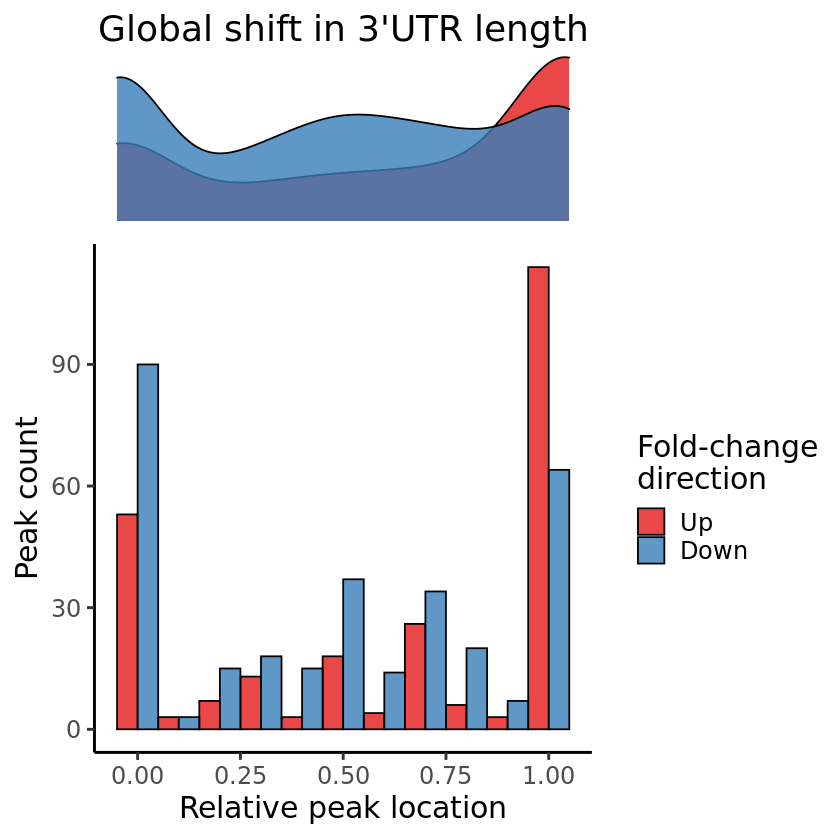

In [41]:
ctl_ALSFTLD_utrshift_v3 <- DetectUTRLengthShift(peaks.object = peaks_so_v3, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'C9ALSFTLD', 
                                      population.2 = 'control')
ctl_ALSFTLD_utrshift_v3
PlotUTRLengthShift(ctl_ALSFTLD_utrshift_v3)

[1] "7290 expressed peaks in feature types UTR3"
[1] "6957 peaks after filtering out A-rich annotations"
[1] "1482 genes detected with multiple peak sites expressed"
[1] "5593 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"


genomic_feature(s) population1_pct
SLC1A3:chr5:36680218-36686526:1    UTR3               0.21431186     
SLC1A3:chr5:36683583-36686598:1    UTR3               0.13177160     
SLC1A3:chr5:36686796-36687674:1    UTR3               0.14366764     
SLC1A3:chr5:36687000-36687408:1    UTR3               0.10129941     
CADM2:chr3:85912454-86066827:1     UTR3               0.63808565     
CCDC144A:chr17:16761562-16764339:1 UTR3               0.20040264     
CCDC144A:chr17:16734893-16764009:1 UTR3               0.39064788     
VSNL1:chr2:17591891-17655854:1     UTR3               0.24194729     
ITM2B:chr13:48233209-48256359:1    UTR3               0.34132504     
VSTM2B:chr19:29529981-29564127:1   UTR3               0.27086384     
PLP1:chrX:103791286-103791785:1    UTR3               0.31478770     
SRSF11:chr1:70235526-70244872:1    UTR3               0.37710469     
MOG:chr6:29657150-29668376:1       UTR3               0.33702416     
NTM:chr11:132314530-132335287:1    UTR3               0.39430820     
LRMDA:chr10:76444529-76557364:1    UTR3               0.12500000     
KLC1:chr14:103685751-103686340:1   UTR3               0.15034773     
SLC48A1:chr12:47782286-47782751:1  UTR3               0.13890922     
RHOU:chr1:228737379-228744501:1    UTR3               0.26107247     
NKTR:chr3:42637703-42638303:1      UTR3               0.22593338     
NKTR:chr3:42635333-42637975:1      UTR3               0.34818814     
NKTR:chr3:42636959-42637883:1      UTR3               0.24743777     
PLEKHG3:chr14:64746407-64746935:1  UTR3               0.14247804     
SCD:chr10:100362727-100363339:1    UTR3               0.13826867     
SCD:chr10:100361149-100362415:1    UTR3               0.10340410     
SCD:chr10:100361274-100361724:1    UTR3               0.05536237     
MYO6:chr6:75885967-75890302:1      UTR3               0.30664348     
MYO6:chr6:75881724-75890314:1      UTR3               0.35980966     
RBM25:chr14:73106054-73109578:1    UTR3               0.14760249     
RBM25:chr14:73107777-73109568:1    UTR3               0.11502562     
RBM25:chr14:73106021-73110988:1    UTR3               0.18200952     
⋮                                  ⋮                  ⋮              
EVI2A:chr17:31317560-31318145:-1   UTR3               0.06670937     
ZEB2:chr2:144387944-144388484:-1   UTR3               0.07375549     
TCF4:chr18:55223226-55223768:-1    UTR3               0.08199122     
MYO5A:chr15:52387592-52397758:-1   UTR3               0.11960102     
HMGB1:chr13:30461401-30461413:-1   UTR3               0.04785871     
HMGB1:chr13:30461398-30461422:-1   UTR3               0.05636896     
AIDA:chr1:222669860-222676310:-1   UTR3               0.03760981     
HIPK2:chr7:139561570-139561884:-1  UTR3               0.04200220     
NAA25:chr12:112026689-112027894:-1 UTR3               0.08336384     
NAA25:chr12:112027061-112027859:-1 UTR3               0.06387262     
DICER1:chr14:95086228-95086600:-1  UTR3               0.08308931     
CRBN:chr3:3149691-3150663:-1       UTR3               0.08089312     
HNRNPD:chr4:82353752-82354261:-1   UTR3               0.07009517     
HNRNPD:chr4:82353756-82355439:-1   UTR3               0.08318082     
CDKN1C:chr11:2883213-2883537:-1    UTR3               0.04154466     
TBCA:chr5:77691166-77691489:-1     UTR3               0.05536237     
PSMB1:chr6:170535120-170535403:-1  UTR3               0.05060395     
ORMDL1:chr2:189771235-189771842:-1 UTR3               0.06359810     
PPA1:chr10:70202835-70203149:-1    UTR3               0.08537701     
ATOX1:chr5:151742771-151746469:-1  UTR3               0.04849927     
ZFR:chr5:32354350-32354849:-1      UTR3               0.08043558     
SLCO1A2:chr12:21264600-21264931:-1 UTR3               0.06835652     
GNG7:chr19:2514857-2520787:-1      UTR3               0.08290630     
FRYL:chr4:48497471-48498045:-1     UTR3               0.06799048     
GPATCH8:chr17:44424261-44435236:-1 UTR3               0.09114202     
NAIP:chr5:71001957-71003163:-1     UTR3      

[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 3.92964303759193e-35"


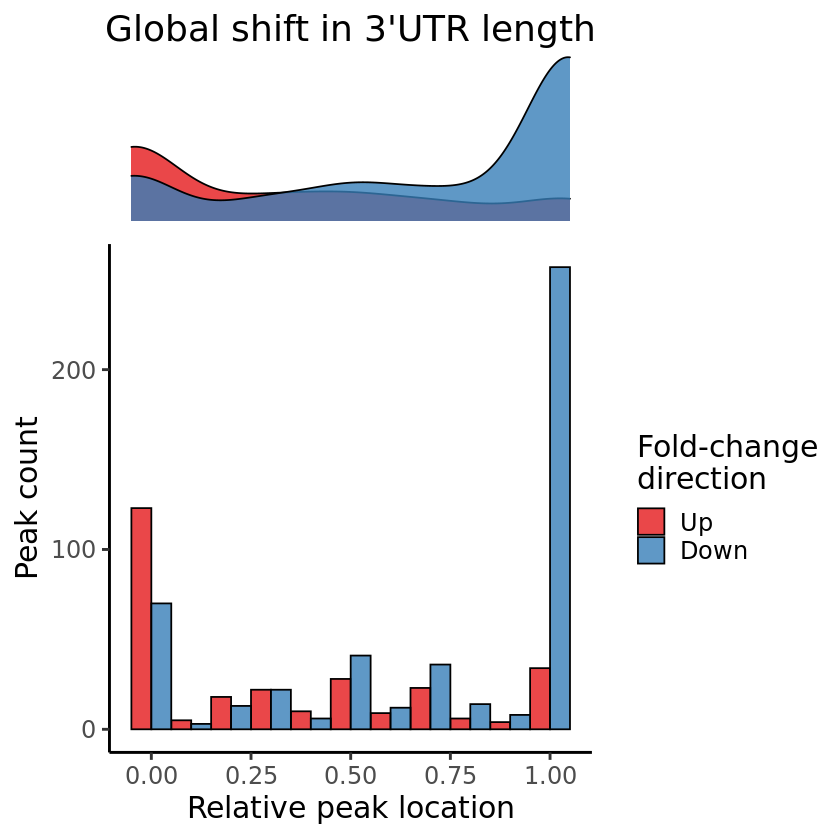

In [43]:
ctl_C9ALSnoFTLD_utrshift_v3 <- DetectUTRLengthShift(peaks.object = peaks_so_v3, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'C9ALSnoFTLD', 
                                      population.2 = 'control')
ctl_C9ALSnoFTLD_utrshift_v3
PlotUTRLengthShift(ctl_C9ALSnoFTLD_utrshift_v3)

[1] "7205 expressed peaks in feature types UTR3"
[1] "6889 peaks after filtering out A-rich annotations"
[1] "1460 genes detected with multiple peak sites expressed"
[1] "5518 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"


genomic_feature(s) population1_pct
PXK:chr3:58425575-58426087:1        UTR3               0.35581037     
PXK:chr3:58424026-58426048:1        UTR3               0.41322951     
PXK:chr3:58425246-58425639:1        UTR3               0.09207599     
HSPE1:chr2:197503129-197503207:1    UTR3               0.11081636     
CIRBP:chr19:1274131-1274854:1       UTR3               0.45088140     
CIRBP:chr19:1272709-1274868:1       UTR3               0.51257915     
MAT2A:chr2:85544856-85545281:1      UTR3               0.37283929     
PLEKHH1:chr14:67588996-67589612:1   UTR3               0.42906041     
PLEKHH1:chr14:67588575-67589308:1   UTR3               0.36393976     
WSB1:chr17:27312703-27313903:1      UTR3               0.66130412     
WSB1:chr17:27313084-27313249:1      UTR3               0.31328085     
WSB1:chr17:27312904-27313232:1      UTR3               0.36188602     
LUC7L3:chr17:50752184-50752755:1    UTR3               0.44822865     
MACF1:chr1:39486496-39487054:1      UTR3               0.28264590     
MACF1:chr1:39485933-39486659:1      UTR3               0.24730447     
MOBP:chr3:39528000-39528580:1       UTR3               0.28093445     
MOBP:chr3:39527547-39528201:1       UTR3               0.20776998     
MOBP:chr3:39526833-39527336:1       UTR3               0.16036283     
SNAP25:chr20:10306827-10307418:1    UTR3               0.19442067     
SPTBN1:chr2:54669216-54669736:1     UTR3               0.21204861     
TMEM165:chr4:55425535-55426436:1    UTR3               0.23455417     
SRSF5:chr14:69770298-69772005:1     UTR3               0.58967996     
SRSF5:chr14:69770151-69770465:1     UTR3               0.28872155     
STX16:chr20:58678952-58679526:1     UTR3               0.25209653     
CADM2:chr3:85912454-86066827:1      UTR3               0.53551258     
SLC44A1:chr9:105393048-105393426:1  UTR3               0.19690228     
GRAMD2B:chr5:126480286-126484512:1  UTR3               0.18449427     
ZNF483:chr9:111553237-111553849:1   UTR3               0.14795482     
ZNF483:chr9:111553060-111553912:1   UTR3               0.15214787     
ADD1:chr4:2929555-2930076:1         UTR3               0.26176622     
⋮                                   ⋮                  ⋮              
SERINC5:chr5:80143466-80147273:-1   UTR3               0.06494951     
SPTLC2:chr14:77509629-77511627:-1   UTR3               0.04543899     
ZRANB2:chr1:71064346-71065294:-1    UTR3               0.09686805     
NRBP2:chr8:143834160-143834430:-1   UTR3               0.07881225     
GOLGB1:chr3:121694264-121695216:-1  UTR3               0.05604997     
GOLGB1:chr3:121695627-121696990:-1  UTR3               0.06435050     
DYNC1LI2:chr16:66742445-66751512:-1 UTR3               0.07059730     
HSPD1:chr2:197496967-197500112:-1   UTR3               0.10499743     
ATP9A:chr20:51597026-51597736:-1    UTR3               0.07256546     
NAIP:chr5:70969870-70970495:-1      UTR3               0.09618347     
CSDE1:chr1:114717919-114719752:-1   UTR3               0.05853158     
PTPRD:chr9:8315999-8316796:-1       UTR3               0.08086599     
CEP170:chr1:243165483-243170016:-1  UTR3               0.06683211     
NME7:chr1:169132531-169132809:-1    UTR3               0.06674653     
TRIM23:chr5:65611094-65624522:-1    UTR3               0.07855554     
REEP5:chr5:112876385-112876778:-1   UTR3               0.07829882     
MCCC1:chr3:183086510-183099796:-1   UTR3               0.05031662     
VPS13C:chr15:61866868-61867614:-1   UTR3               0.07008386     
VPS13C:chr15:61866526-61867372:-1   UTR3               0.07958241     
HNRNPD:chr4:82357243-82359843:-1    UTR3               0.08574362     
HNRNPD:chr4:82358356-82359979:-1    UTR3               0.07992470     
TMEM30A:chr6:75255649-75259485:-1   UTR3               0.04278624     
TMEM30A:chr6:75255721-75260825:-1   UTR3               0.04338525     
ZBTB7A:chr19:4047617-4048204:-1     UTR3               0.07282218     
BBS2:chr16:56502257-56506012:-1     UTR3               0.068

[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 1.77070044773902e-25"


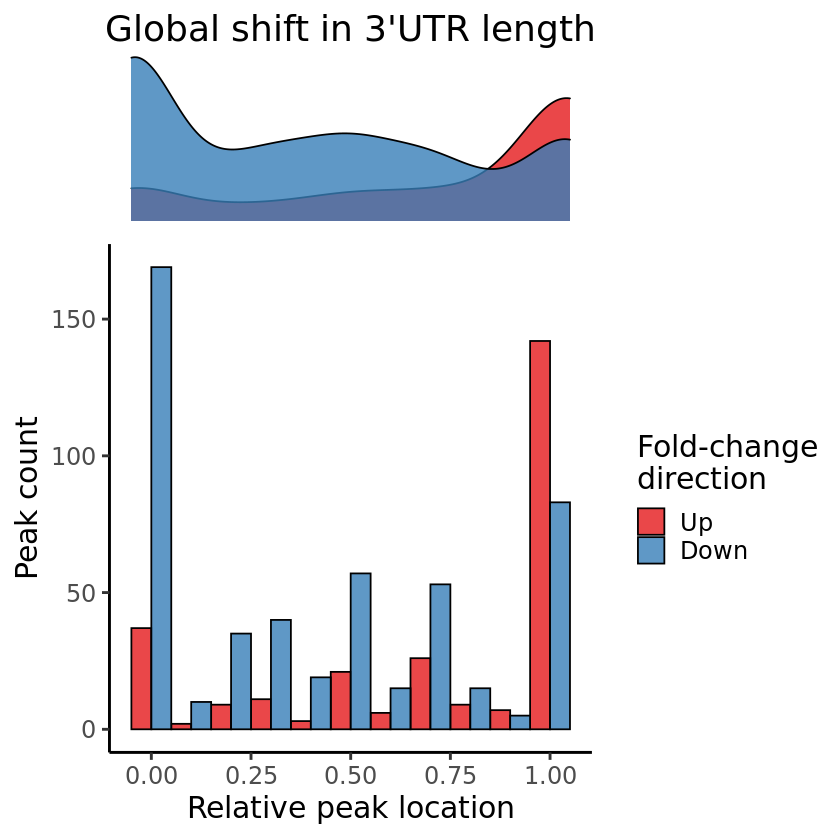

In [46]:
ctl_sALSnoFTLD_utrshift_v3 <- DetectUTRLengthShift(peaks.object = peaks_so_v3, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'sALSnoFTLD', 
                                      population.2 = 'control')
ctl_sALSnoFTLD_utrshift_v3
PlotUTRLengthShift(ctl_sALSnoFTLD_utrshift_v3)

[1] "7050 expressed peaks in feature types UTR3"
[1] "6736 peaks after filtering out A-rich annotations"
[1] "1431 genes detected with multiple peak sites expressed"
[1] "5409 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"


genomic_feature(s) population1_pct
MAT2A:chr2:85544856-85545281:1        UTR3               0.28014424     
PLEKHH1:chr14:67588996-67589612:1     UTR3               0.29163849     
PLEKHH1:chr14:67588575-67589308:1     UTR3               0.21072797     
CADM2:chr3:85912454-86066827:1        UTR3               0.49605589     
VSNL1:chr2:17591891-17655854:1        UTR3               0.17151228     
SPTBN1:chr2:54669216-54669736:1       UTR3               0.11381564     
PXK:chr3:58425575-58426087:1          UTR3               0.20712193     
PXK:chr3:58424026-58426048:1          UTR3               0.24701375     
GNAO1:chr16:56356141-56357444:1       UTR3               0.17894974     
GNAO1:chr16:56357036-56357444:1       UTR3               0.09601082     
GNAO1:chr16:56354812-56356398:1       UTR3               0.06130268     
TMEM144:chr4:158240272-158244653:1    UTR3               0.33693937     
TMEM144:chr4:158241316-158244732:1    UTR3               0.30809105     
WSB1:chr17:27312703-27313903:1        UTR3               0.50935317     
NKTR:chr3:42635167-42635437:1         UTR3               0.11313951     
NKTR:chr3:42634570-42637045:1         UTR3               0.21072797     
NKTR:chr3:42633635-42637045:1         UTR3               0.21591165     
QKI:chr6:163571129-163571849:1        UTR3               0.29118774     
MOBP:chr3:39528000-39528580:1         UTR3               0.11854857     
CCDC144A:chr17:16761131-16762001:1    UTR3               0.13319811     
CCDC144A:chr17:16761331-16761661:1    UTR3               0.12778905     
CCDC144A:chr17:16734893-16764009:1    UTR3               0.24588686     
TCF25:chr16:89910994-89911443:1       UTR3               0.12463376     
TCF25:chr16:89910530-89911424:1       UTR3               0.12621140     
NAV1:chr1:201826514-201826969:1       UTR3               0.06919089     
ATP2A2:chr12:110350582-110351093:1    UTR3               0.10412441     
MTURN:chr7:30157974-30158588:1        UTR3               0.08654496     
ANKRD12:chr18:9254592-9255701:1       UTR3               0.23146270     
ANKRD12:chr18:9255013-9256087:1       UTR3               0.24092856     
ANKRD12:chr18:9254214-9254802:1       UTR3               0.11336489     
⋮                                     ⋮                  ⋮              
OGA:chr10:101785842-101787459:-1      UTR3               0.07031778     
NCOR1:chr17:16149326-16158929:-1      UTR3               0.09308091     
IL6ST:chr5:55936588-55937114:-1       UTR3               0.03989182     
DYNC1LI2:chr16:66742445-66751512:-1   UTR3               0.04732928     
RBMX:chrX:136873794-136874592:-1      UTR3               0.02974983     
SEM1:chr7:96688743-96694956:-1        UTR3               0.05251296     
CLASP2:chr3:33497666-33498272:-1      UTR3               0.05454136     
KCNJ10:chr1:160038591-160039275:-1    UTR3               0.02005860     
AIDA:chr1:222669860-222676310:-1      UTR3               0.04124408     
CAPZB:chr1:19339198-19342801:-1       UTR3               0.04507550     
TOB2:chr22:41436209-41436727:-1       UTR3               0.03651116     
CSNK1A1:chr5:149495668-149496770:-1   UTR3               0.05679513     
CSNK1A1:chr5:149495808-149496564:-1   UTR3               0.05544287     
UBE2D3:chr4:102797034-102801709:-1    UTR3               0.04530088     
UBE2G2:chr21:44770135-44771065:-1     UTR3               0.03989182     
PPFIA2:chr12:81341022-81344760:-1     UTR3               0.03448276     
CFL2:chr14:34710378-34711017:-1       UTR3               0.02389002     
CLMN:chr14:95191471-95194162:-1       UTR3               0.03267974     
PTGES3:chr12:56663341-56664538:-1     UTR3               0.04800541     
RFC1:chr4:39323202-39327706:-1        UTR3               0.05161145     
HMGN1:chr21:39346688-39347693:-1      UTR3               0.04642777     
HMGN1:chr21:39347407-39348033:-1      UTR3               0.04079333     
TTLL7:chr1:83866818-83867694:-1       UTR3               0.02997521     
CPOX:chr3:98588722-9859

[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 1.59553935529956e-10"


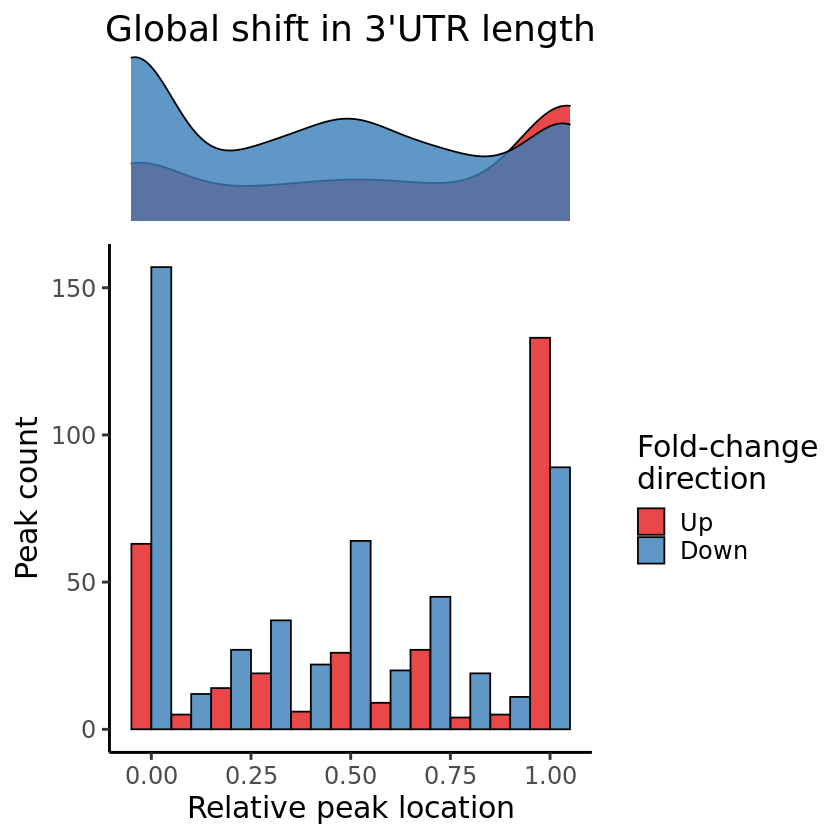

In [48]:
ctl_C9noALSnoFTLD_utrshift_v3 <- DetectUTRLengthShift(peaks.object = peaks_so_v3, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'C9noALSnoFTLD', 
                                      population.2 = 'control')
ctl_C9noALSnoFTLD_utrshift_v3
PlotUTRLengthShift(ctl_C9noALSnoFTLD_utrshift_v3)


Attaching package: 'ggVennDiagram'


The following object is masked from 'package:VennDiagram':

    ellipse




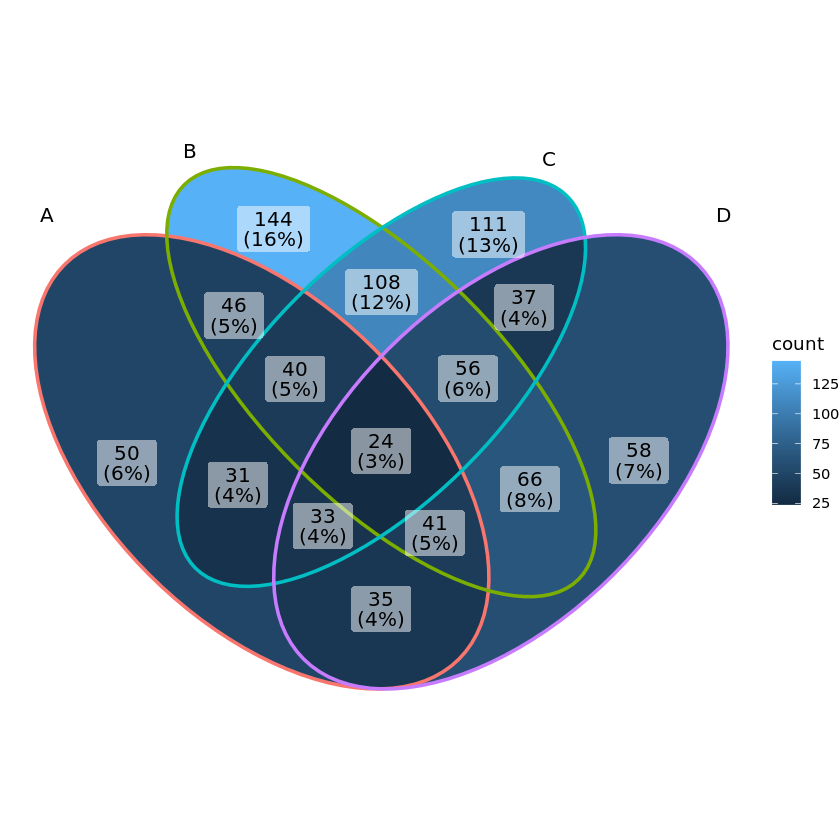

In [56]:
library("ggVennDiagram")
# Default plot
set.seed(20190708)
genes <- paste("gene",1:1000,sep="")
x <- list(
  A = sample(genes,300), 
  B = sample(genes,525), 
  C = sample(genes,440),
  D = sample(genes,350)
  )
ggVennDiagram(x)

In [66]:
source('/home/aiden/codes/APA_stuff/post_qual/APA/usefull_functions.R')

In [61]:
peak.annotations <- read.table("sierra_out/ALS_paul_peaks_annotated.txt", 
                               header = TRUE,
                               sep = "\t",
                               row.names = 1,
                               stringsAsFactors = FALSE)

In [67]:
Exc_ALSFTLD_lengthened_genes <- get_sig_longer_UTRs(Exc_ALSFTLD_utrshift, peak.annotations)
Exc_ALSFTLD_lengthened_genes

$genes
      gene_id
1        AAK1
2        AATK
3       ABCA5
4        ABI2
6      ABLIM1
7       ACSL6
8      ACTL6B
9       ACTN1
10      ACTR2
11     ADAM17
12     ADAM23
13       ADD3
15     ADGRB3
16       ADNP
17      AGAP4
18      AHDC1
19        AK5
20      AKAP6
22       AMD1
23     ANAPC4
25       ANK3
26   ANKRD36C
27     ANKS1B
29      ANXA7
30      AP1G1
31     ARGLU1
32   ARHGAP21
33    ARHGEF7
35      ARL4A
36      ARMC9
37     ARPP19
38     ARPP21
39      ASH1L
40      ATCAY
41       ATL1
43     ATP2A2
44     ATP8A1
45     ATRNL1
47       ATRX
49      ATXN2
50       BAG4
52     BCAP29
53     BCLAF1
54     BMERB1
55       BMI1
56     BNIP3L
57       BPTF
58       BRD8
59       BTG1
60   C11orf58
61  C14orf132
62   C18orf32
63    C1orf61
64      C2CD5
65    C6orf62
66    C6orf89
67     CACNG8
68      CADM2
70      CADM3
71     CAMK1D
72     CAMK2A
73     CAMK2B
74    CAMK2N1
75     CAMKK2
76    CAMSAP2
77     CAMTA1
79      CBWD5
81       CBX5
82       CBX6
83      CCAR1
84     CCDC84
85    CCDC88A
86      CCND2
87      CCNL1
88      CCNL2
90      CCNT2
92      CCSAP
93       CD47
94      CDC42
95      CELF1
96      CELF2
97      CELF4
98     CELSR2
99     CEP170
100    CEP290
101      CHD8
102      CHL1
103   CHORDC1
104     CHPT1
105     CHRM3
106     CIRBP
107    CLASP2
108     CLCN4
109      CLK1
111      CLK4
113      CLTB
114      CLTC
115     CNTN1
116      COQ4
118       CPE
119     CPSF6
120      CRBN
121    CREBZF
122     CREG2
123     CSDE1
124   CSNK1A1
126    CTNND2
129     DAAM1
131    DAZAP1
132     DCAF8
133    DDRGK1
134     DDX17
136     DDX3Y
137      DDX5
139      DLG2
140     DMTF1
141    DNAJA1
142    DNAJC6
144      DNM3
145    DONSON
146       DST
150      DSTN
151     DTWD1
152       DUT
153  DYNC1LI2
154     DZIP3
155     EIF3H
156     EIF4B
157    EIF4G3
158      ELP2
160   EPB41L1
161     EPHX4
163      EPRS
164     EXOC5
165    EXOC6B
166   EXOSC10
167   FAM120B
168   FAM171B
169   FAM217B
171     FAM3C
172     FBXW7
174  FGFR1OP2
175     FKBP3
177     FLRT2
178     FMNL2
179     FOXP1
180  FRA10AC1
182    FRRS1L
183      FUT9
184    GABRA1
185    GALNT8
186      GIT2
187      GLG1
188       GLS
189      GNAL
190     GNAO1
193   GOLGA8A
194   GOLGA8B
195    GOLGB1
196      GPHN
197     GPM6A
199     GRIA2
200     GRIA3
201     GRIK2
202   GTF2H2C
203     HACD2
204     HERC2
206     HERC4
207     HIBCH
208   HIKESHI
209   HNRNPA1
210 HNRNPA2B1
215   HNRNPA3
217    HNRNPD
218   HNRNPDL
219   HNRNPH3
220    HNRNPM
221    HNRNPU
224    HP1BP3
226     HSBP1
227   HSD17B4
228   HSP90B1
229     HSPA5
230     HSPA9
231     HSPE1
232     HSPH1
234      ICA1
235       ID2
236     IFT57
237      IPO5
239     ISCA1
240     ITFG1
242     ITM2B
243     ITPR1
244   ITPRID2
245       JUN
246     KCNK1
247     KCNT1
248     KCTD1
249    KCTD16
250   KHDRBS3
251 KIAA0319L
252  KIAA1109
253       KIZ
254     KLF13
255    KLHL24
256     KMT2A
259      LARS
260     LCMT1
261    LIMCH1
262    LONRF2
263    LRATD1
264     LRFN5
265   LRRC37B
266   LRRFIP1
267     LSAMP
268     LUC7L
269    LUC7L3
271     MACF1
273    MALSU1
274     MAP1B
275  MAP1LC3B
276    MAP3K7
277    MAP4K5
280      MAP7
281      MAPT
282    MARCH6
284     MATR3
285       MAX
286      MDM4
287    MED13L
288     MEF2A
289     MICU3
290     MKLN1
291     MMP16
292     MOSMO
293      MPDZ
294     MPRIP
296    MRPL33
297      MSL1
298     MTURN
300      MXI1
301    MYCBP2
302     MYT1L
303   N4BP2L2
304      NAPB
305   NAPEPLD
306      NASP
307     NCAM1
308      NCS1
309    NDUFA5
310    NDUFB1
311    NDUFS1
312      NEFL
314     NELL2
315     NFAT5
316      NFIB
317      NFIC
319      NFIX
320       NIN
321       NLK
322     NOP58
323    NPEPPS
324     NPY1R
325     NR2F1
326     NRCAM
327     NRXN1
328      NSD3
329       NTM
332     NTRK3
335     ODF2L
336       OGA
337       OGT
338      OPTN
339   OSBPL1A
340      OXR1
341     P2RX7
343  PAFAH1B1
344     PAIP2
345     PANK2
347     PCBP2
349    PCDH10
350    PCMTD2
352      PCNP
353

In [68]:
Exc_c9ALSnoFTLD_lengthened_genes <- get_sig_longer_UTRs(Exc_c9ALSnoFTLD_utrshift, peak.annotations)
Exc_c9ALSnoFTLD_lengthened_genes

$genes
      gene_id
1        AAK1
2    AASDHPPT
3      ABLIM1
5       ACSL3
6       ACSL6
7        ADD3
8      ADGRB3
9        AHI1
10       ANK2
11       ANK3
12    ANKRD36
13      AP1G1
14        APP
15     ARGLU1
16   ARHGAP21
17    ARHGEF7
19    ARL6IP5
20     ARPP21
21      ASAH1
22     ATP1B1
24     ATRNL1
25       ATRX
27      ATXN2
28       BAG4
30       BTG1
31   C11orf58
32   C18orf32
33      C2CD5
34     CACNG8
35      CADM3
36    CAMK2N1
37    CAMSAP2
38     CAMTA1
39       CAP2
40       CBR4
41       CBX6
42   CCDC144A
43    CCDC88A
45      CCNL1
46      CCNL2
47      CCNT2
48      CCSAP
49       CD47
50      CDC42
51   CDK5RAP2
52      CHRM3
53       CRBN
54     CREBZF
56      CSDE1
57    CSNK1A1
59      DAAM1
61     DAZAP1
62     DDRGK1
63      DDX17
64       DDX5
66      DMTF1
67     DNAJA1
68     DNAJC6
69      DNM1L
70     DPYSL2
71        DST
74      DTWD1
75   DYNC1LI2
76      DZIP3
77      EIF4B
78    EPB41L1
79    EXOSC10
80     FAM13A
81    FAM217B
83      FBXW7
85      FKBP3
86      FMNL2
87      FOXP1
88     GABRB2
89     GATAD1
90        GLS
91      GLYR1
92      GNAO1
93    GOLGA8A
95    GOLGA8B
96     GOLGB1
97      GPM6A
98      GRIA2
100     GRIA3
101     GRIA4
103     HERC2
104     HIBCH
105 HNRNPA2B1
109   HNRNPA3
112    HNRNPD
113   HNRNPH3
114    HNRNPM
115    HNRNPU
118   HSD17B4
119     HSPA9
120     HSPH1
121      ICA1
122       ID2
123     ITPR1
124   ITPRID2
125     KCNT1
126    KCTD16
127  KIAA0930
128  KIAA1109
129    KLHL24
130     KMT2A
132     LONP2
133    LRATD1
134   LRRC37B
135   LRRFIP1
136     LUC7L
137    LUC7L3
139     MACF1
141     MAP1B
142  MAP1LC3B
143    MAP3K7
144      MAP7
145     MATR3
146      MDH1
147      MDM4
148     MED28
149     MMP16
150      MTPN
151      MXI1
152     MYT1L
153    NAP1L1
154    NDUFA5
155     NFAT5
156      NFIC
157      NFIX
158       NIN
159      NKTR
161    NPEPPS
162     NPY1R
163     NRXN1
164      NSD3
165       NTM
168     NTRK3
171     ODF2L
172       OGT
173   OSBPL1A
174     P2RX7
175      PCM1
176      PCNP
177    PIK3R1
178     PNISR
180       PNN
182    PPFIA2
183   PPP2R5E
184     PRDM2
185    PRXL2A
186     PSMA6
187      PTEN
188      PTK2
189      PUM2
190      QDPR
192     RAD50
193     RBM25
194     RBM39
195      RBM6
197     RCOR3
198    RPL13A
199     RPL22
200     RSRC2
202     RSRP1
204      RTN3
206     SAFB2
207    SCAPER
208     SCN2A
210     SCN3A
211      SCOC
212 SECISBP2L
213   SELENOF
214  SEPTIN11
215   SEPTIN2
216   SERINC1
217     SETD5
218   SIPA1L1
219  SLC25A36
220   SLC44A1
221      SLF2
222   SLITRK5
223      SMG1
225    SORBS1
226     SPCS2
227     SPCS3
228    SPTAN1
229    SRSF11
230     SRSF3
231     SRSF5
235   STXBP5L
236     SUGP2
237    TARDBP
238     TCAF1
239   TERF2IP
240        TF
241     TMED4
242   TMEM245
244   TMEM30A
245   TMEM50A
246    TMEM59
247    TNRC6A
249    TNRC6B
250    TOMM20
251     TRIM9
252      TRIO
253     TTC14
255      TTC3
256     TTC37
258     UBE2B
259      UBN2
260      UBR5
261     UBXN4
263     UCHL1
264     UNC80
265    VPS13A
266     VSNL1
268    VSTM2B
269     WASF1
270      WNK2
271      WSB1
272     YWHAH
273    ZFAND5
274    ZNF302
275    ZNF483
277    ZNF655
278    ZRANB2

$df
                               Row.names genomic_feature(s) population1_pct
1         AAK1:chr2:69457997-69458360:-1               UTR3       0.1152932
2   AASDHPPT:chr11:106098004-106098699:1               UTR3       0.1667987
3    ABLIM1:chr10:114431113-114431479:-1               UTR3       0.1271791
4    ABLIM1:chr10:114431432-114432566:-1               UTR3       0.1141046
5       ACSL3:chr2:222942614-222943172:1               UTR3       0.1814580
6      ACSL6:chr5:131949973-131950334:-1               UTR3       0.1287639
7       ADD3:chr10:110133791-110134487:1               UTR3       0.2115689
8        ADGRB3:chr6:69389040-69389506:1               UTR3       0.1774960
9       AHI1:chr6:135283895-135284482:-1               UTR3       0.1778922
10       ANK2:chr4:113383217-1133838

In [69]:
Exc_sALSnoFTLD_lengthened_genes <- get_sig_longer_UTRs(Exc_sALSnoFTLD_utrshift, peak.annotations)
Exc_sALSnoFTLD_lengthened_genes

$genes
      gene_id
1        AAK1
2    AASDHPPT
3       ABCA5
4        ABI2
6      ABLIM1
7       ACSL6
8       ACTN1
9       ACTN4
10      ACTR2
11     ADAM17
12     ADAM23
13       ADD3
15     ADGRB3
16     ADGRL3
17       ADNP
18      AGAP4
19     AGPAT4
20    AGTPBP1
21      AHDC1
22       AIG1
24        AK5
25      AKAP6
26      ALCAM
27       AMD1
28     ANAPC4
30       ANK2
31       ANK3
32    ANKRD28
33   ANKRD36C
34     ANKS1B
35      ANXA7
36      AP1G1
37        APP
38     ARGLU1
40   ARHGAP21
41   ARHGAP32
42    ARL6IP5
43      ARPC5
44     ARPP19
45       ASB3
46      ASH1L
47      ATCAY
48       ATL1
50     ATP1B1
52     ATP2A2
53     ATP2B1
55    ATP6AP2
56     ATP8A1
57     ATRNL1
59       ATRX
61      ATXN2
62      BAALC
63       BAG4
65     BCAP29
66     BCLAF1
67     BMERB1
68       BMI1
70     BNIP3L
71       BRD8
72     BRINP1
73      BTBD8
74       BTG1
75       BUB3
76   C11orf58
77  C14orf132
78   C18orf32
79    C1orf61
80      C2CD5
81    C6orf62
82    C6orf89
83     CACNG8
85      CADM1
86      CADM2
89      CADM3
90      CALM1
92     CAMK1D
93     CAMK2A
94    CAMK2N1
95     CAMKK2
96    CAMSAP2
97     CAMTA1
99       CAP2
100     CAPN7
102    CAPZA2
104     CBWD5
106      CBX5
107      CBX6
108     CCAR1
109    CCDC84
110   CCDC88A
114     CCND2
115      CCNI
116     CCNL1
117     CCNL2
119     CCNT2
121     CCPG1
122     CCSAP
123      CD47
124     CDC27
125     CDC42
126     CELF1
128     CELF2
129     CELF4
130    CELSR2
131    CEP170
132     CEP95
133      CHD8
134      CHL1
135   CHORDC1
136     CHPT1
137     CHRM3
138     CIRBP
140    CLASP2
142     CLCN4
143     CLIC4
144      CLK1
145      CLK4
148      CLTB
149      CLTC
150      CNBP
151    COMMD7
152     CPSF6
153      CRBN
154    CREBZF
156     CREG2
157     CSDE1
159   CSNK1A1
160   CTNNAL1
161     DAAM1
163    DAZAP1
164     DCAF8
165    DDRGK1
166     DDX17
168      DDX5
170      DENR
171      DLG2
172     DMTF1
173    DNAJA1
174    DNAJC6
177     DNM1L
178      DNM3
179    DONSON
180    DPYSL2
182       DST
187      DTNA
188     DTWD1
189       DUT
190  DYNC1LI2
191      EID1
192    EIF1AX
193     EIF4B
194    EIF4G3
195      ELL2
196      ELP2
198      ENC1
199   EPB41L1
200   EXOSC10
201   FAM120B
202   FAM171B
203   FAM217B
205     FAM3C
206    FAM49A
207      FAR1
208    FBXO44
209     FBXW7
212     FGF12
213  FGFR1OP2
214     FKBP3
216     FMNL2
217     FOXP1
218  FRA10AC1
220    FRRS1L
221      FUT9
222      FXR1
223     G3BP2
224    GABBR2
225    GABRA1
227    GATAD1
229     GDAP1
232      GIT2
233      GLG1
234       GLS
235     GNAI1
236     GNAO1
238      GNG7
239   GOLGA8A
240   GOLGA8B
241    GOLGB1
242      GPHN
243     GPM6A
245     GRIA2
247     GRIA3
248     GRIA4
249     GRIK2
250    GRIN2A
251    GTF2A1
252     H3F3B
253     HACD2
254     HBS1L
256     HERC2
258     HERC4
259     HIBCH
260   HIKESHI
263     HMGB1
265   HNRNPA1
266 HNRNPA2B1
271   HNRNPA3
274    HNRNPD
275   HNRNPDL
276   HNRNPH3
277    HNRNPM
278    HNRNPU
279    HP1BP3
281   HSD17B4
282   HSP90B1
283     HSPA5
284     HSPA9
285     HSPH1
287      ICA1
288     ICA1L
289       ID2
290       IDS
291    IFNGR1
292     IFT57
293     IFT80
294      IPO5
296     ISCA1
297     ITFG1
299     ITM2B
300     ITPR1
301   ITPRID2
302       JUN
303   KATNBL1
304     KCNK1
305     KCTD1
306    KCTD16
308     KCTD3
309     KDM4B
310   KHDRBS3
311 KIAA0319L
312  KIAA1109
313 KIDINS220
314       KIZ
315     KLF13
316    KLHL24
317     KMT2A
320     KPNA3
321      KTN1
322     LAMP2
323      LARS
324     LIN7C
325    LINGO1
326    LONRF2
327    LPGAT1
328     LRFN5
329   LRRC37B
330   LRRFIP1
331     LSAMP
333     LUC7L
334    LUC7L3
336     MACF1
338    MALSU1
339     MAP1B
341  MAP1LC3B
342    MAP3K7
344    MAP4K4
345    MAP4K5
349      MAP7
350      MAPT
351    MARCH6
353    MARCKS
354     MATR3
355       MAX
356       MBP
358      MDH1
359      MDM4
361    MED13L
362     MEF2A
363     MEF2C
364     MEIS2
365       MFF
366     MICU3
367     MKLN1
368     MMP16
369

In [70]:
Exc_C9noALSnoFTLD_lengthened_genes <- get_sig_longer_UTRs(Exc_C9noALSnoFTLD_utrshift, peak.annotations)
Exc_C9noALSnoFTLD_lengthened_genes

$genes
      gene_id
1        AAK1
2      ABLIM1
3       ACTN1
4       AGAP4
5     ANKRD36
6         APP
8      ARGLU1
9    ARHGAP32
10      C2CD5
11    CAMK2N1
12    CCDC88A
14      CCNL2
15       CD47
16      CELF5
17     CELSR2
18     CREBZF
20      CREG2
21     DAZAP1
22      DDX17
24      DDX3Y
25       DDX5
26      DMTF1
27      DNM1L
28      EIF4B
29     EIF4G3
30      ERCC1
31    FAM217B
32     FBXO44
33      FBXW7
35      GDAP1
36       GIT2
37    GOLGA8A
39    GOLGA8B
40      GRIA3
41      GRIA4
42      GRIK2
43      HIBCH
44  HNRNPA2B1
46    HNRNPA3
48     HNRNPU
51     HP1BP3
53      HSPH1
54       ICA1
56      ITPR1
57    ITPRID2
58      KCNT1
59   KIAA0930
61   KIAA1109
62      KMT2A
63    LRRC37B
64    LRRFIP1
65      LUC7L
66     LUC7L3
68      MACF1
69     MAP3K7
70      MCF2L
71       MDM4
72      MYT1L
73      NFAT5
74     NPEPPS
75       NSD3
76        NTM
79      NTRK3
81        OGT
82      OLFM1
84      PDE4A
85     PDXDC1
86      PNISR
88    POLR2J3
89     PPFIA2
90     PRKACB
91      RAB5A
92      RBM25
95      RCOR3
96      RGPD5
97      RSRP1
98     SCAPER
99      SCN2A
100     SCN3A
101 SECISBP2L
102   SEPTIN2
104   SEPTIN8
105   SERINC1
106   SIPA1L1
108      SLF2
109    SMCHD1
110    SORBS1
111     SPCS3
112    SPTAN1
113     SRRM1
114    SRSF11
116     SRSF3
117     SRSF5
118     SUGP2
119    TARDBP
120   TBL1XR1
121     TCF25
122   TERF2IP
123  TMEM178A
124    TNRC6A
126     TTC37
127      UBN2
128     UBXN4
130       UTY
131    VSTM2B
132     WASF1
133      WSB1
134    ZFAND5
135    ZNF451
136    ZNF655
137    ZRANB2

$df
                                Row.names genomic_feature(s) population1_pct
1          AAK1:chr2:69457997-69458360:-1               UTR3       0.1750842
2     ABLIM1:chr10:114431113-114431479:-1               UTR3       0.1043771
3        ACTN1:chr14:68874143-68874657:-1               UTR3       0.2474747
4        AGAP4:chr10:45825594-45825891:-1               UTR3       0.1111111
5        ANKRD36:chr2:97200024-97200360:1               UTR3       0.1936027
6          APP:chr21:25881415-25955648:-1               UTR3       0.6835017
7          APP:chr21:25897589-25975439:-1               UTR3       0.7205387
8     ARGLU1:chr13:106543293-106543769:-1               UTR3       0.2609428
9   ARHGAP32:chr11:128967860-128968448:-1               UTR3       0.2340067
10       C2CD5:chr12:22448583-22448966:-1               UTR3       0.1010101
11      CAMK2N1:chr1:20482391-20482693:-1               UTR3       0.1767677
12      CCDC88A:chr2:55287842-55289017:-1               UTR3       0.1919192
13      CCDC88A:chr2:55287842-55290025:-1               UTR3       0.2474747
14          CCNL2:chr1:1386385-1387213:-1               UTR3       0.2760943
15       CD47:chr3:108045509-108046040:-1               UTR3       0.2205387
16          CELF5:chr19:3296525-3297076:1               UTR3       0.3737374
17      CELSR2:chr1:109275143-109275751:1               UTR3       0.2070707
18      CREBZF:chr11:85659708-85660146:-1               UTR3       0.1380471
19      CREBZF:chr11:85659913-85661365:-1               UTR3       0.1414141
20      CREG2:chr2:101345550-101345884:-1               UTR3       0.1919192
21         DAZAP1:chr19:1435241-1435687:1               UTR3       0.1245791
22       DDX17:chr22:38483438-38483821:-1               UTR3       0.4797980
23       DDX17:chr22:38483633-38484807:-1               UTR3       0.4057239
24         DDX3Y:chrY:12919998-12920478:1               UTR3       0.1026936
25        DDX5:chr17:64499590-64500022:-1               UTR3       0.5151515
26         DMTF1:chr7:87195679-87196337:1               UTR3       0.1599327
27        DNM1L:chr12:32706524-32707254:1               UTR3       0.1531987
28        EIF4B:chr12:53041750-53042209:1               UTR3       0.1161616
29       EIF4G3:chr1:20806349-20807181:-1               UTR3       0.2356902
30       ERCC1:chr19:45407333-45407696:-1               UTR3       0.1313131
31      FAM217B:chr20:59947573-59

In [71]:
Exc_ALSFTLD <- Exc_ALSFTLD_lengthened_genes
Exc_c9ALSnoFTLD <- Exc_c9ALSnoFTLD_lengthened_genes
Exc_sALSnoFTLD <- Exc_sALSnoFTLD_lengthened_genes
Exc_C9noALSnoFTLD <- Exc_C9noALSnoFTLD_lengthened_genes

In [103]:
ALS_lengthened_genes <- list(
    ALSFTLD = Exc_ALSFTLD_lengthened_genes$genes$gene_id,
    c9ALSnoFTLD = Exc_c9ALSnoFTLD_lengthened_genes$genes$gene_id,
    sALSnoFTLD = Exc_sALSnoFTLD_lengthened_genes$genes$gene_id,
    C9noALSnoFTLD = Exc_C9noALSnoFTLD_lengthened_genes$genes$gene_id)

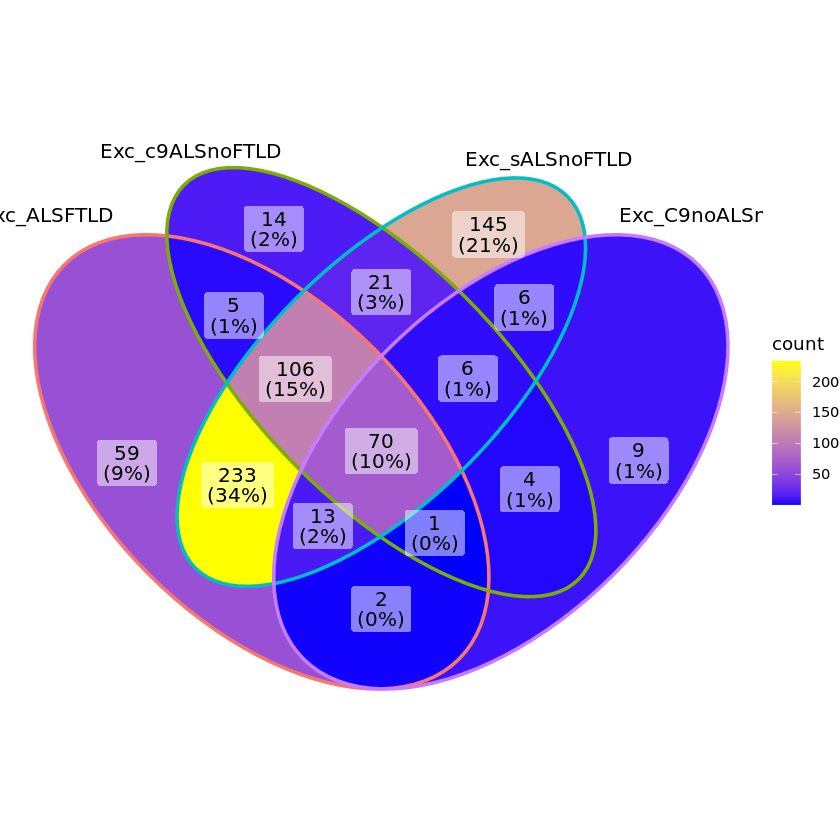

In [82]:
ggVennDiagram(ALS_lengthened_genes) + 
ggplot2::scale_fill_gradient(low="blue",high = "yellow")

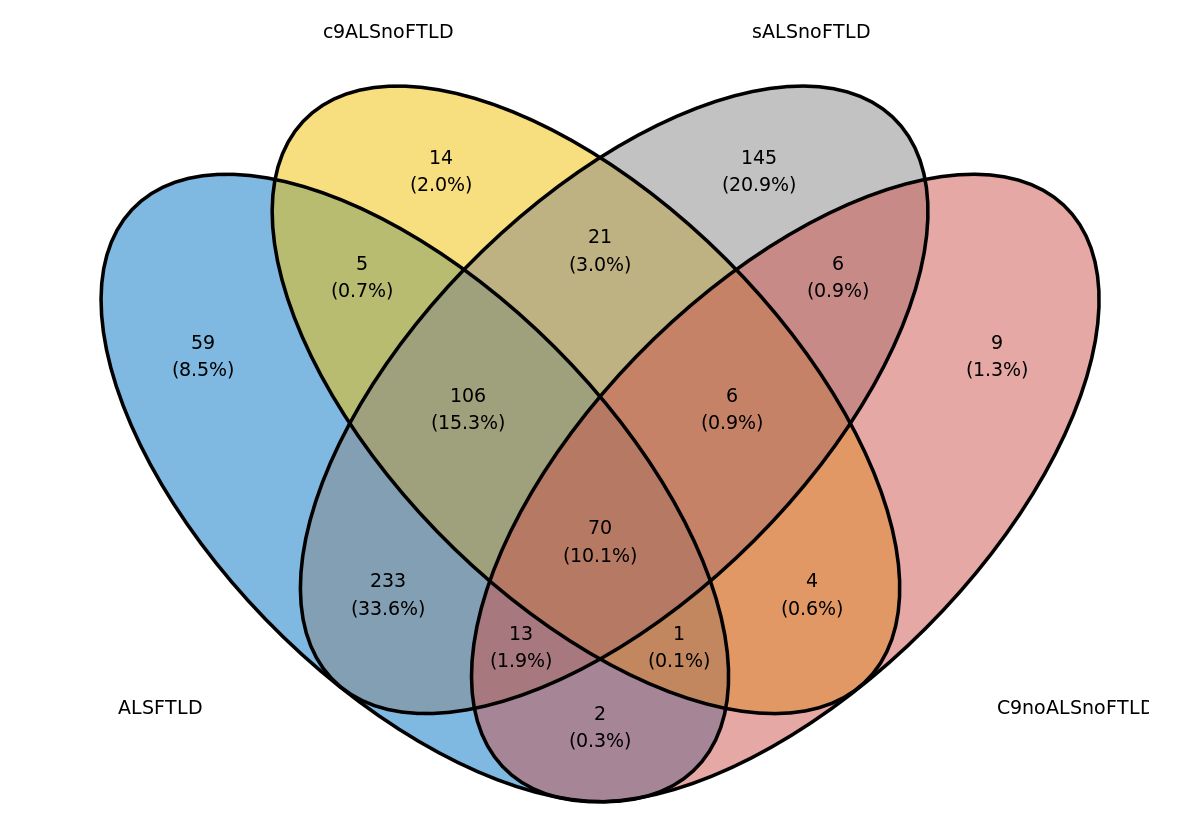

In [116]:
options(repr.plot.width=10)
library("ggvenn")
ggvenn(ALS_lengthened_genes,
       fill_color = c("#0073C2FF", "#EFC000FF", "#868686FF", "#CD534CFF"),
      stroke_size = 1, set_name_size = 4)

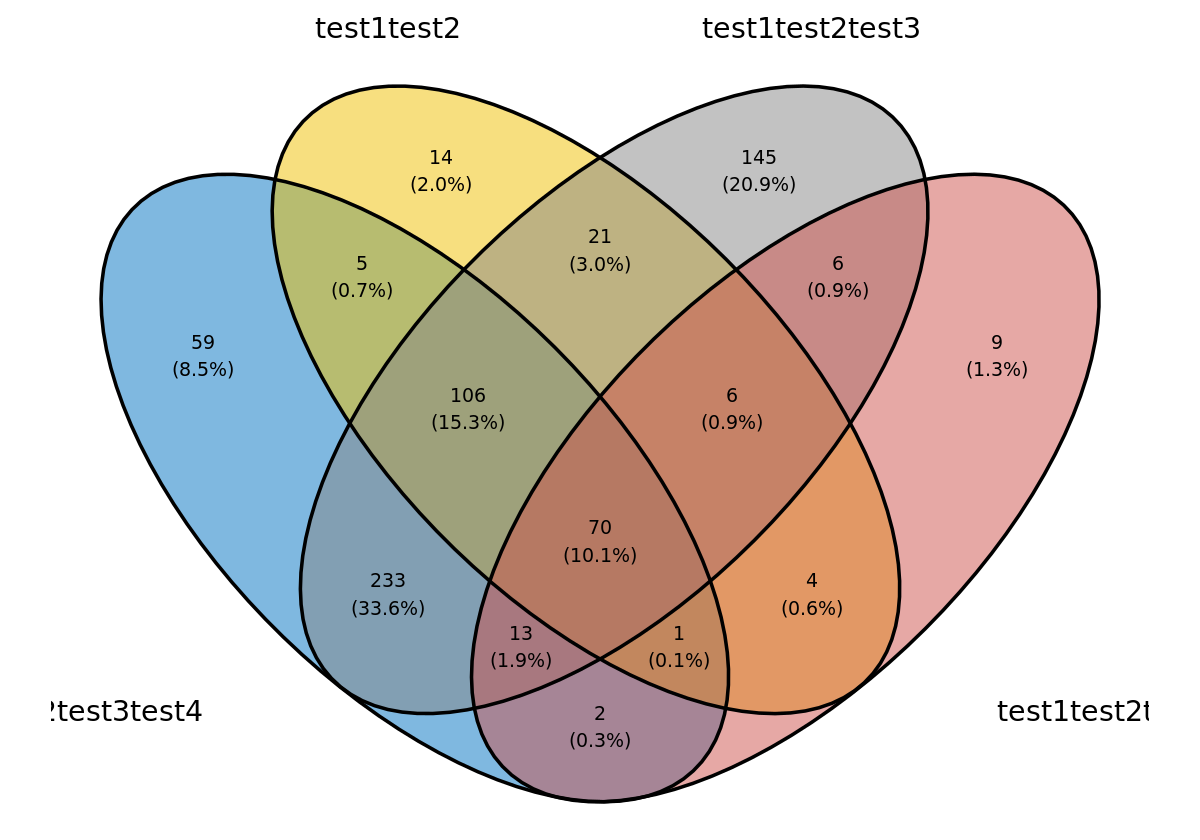

In [119]:
tst <- list(
    test1test2test3test4 = Exc_ALSFTLD_lengthened_genes$genes$gene_id,
    test1test2 = Exc_c9ALSnoFTLD_lengthened_genes$genes$gene_id,
    test1test2test3 = Exc_sALSnoFTLD_lengthened_genes$genes$gene_id,
    test1test2test3test4test5 = Exc_C9noALSnoFTLD_lengthened_genes$genes$gene_id)
ggvenn(tst,
       fill_color = c("#0073C2FF", "#EFC000FF", "#868686FF", "#CD534CFF"),
      stroke_size = 1, set_name_size = 6)

In [120]:
ctl_C9noALSnoFTLD_utrshift_v3
ctl_C9ALSnoFTLD_utrshift_v3
ctl_sALSnoFTLD_utrshift_v3
ctl_ALSFTLD_utrshift_v3

genomic_feature(s) population1_pct
MAT2A:chr2:85544856-85545281:1        UTR3               0.28014424     
PLEKHH1:chr14:67588996-67589612:1     UTR3               0.29163849     
PLEKHH1:chr14:67588575-67589308:1     UTR3               0.21072797     
CADM2:chr3:85912454-86066827:1        UTR3               0.49605589     
VSNL1:chr2:17591891-17655854:1        UTR3               0.17151228     
SPTBN1:chr2:54669216-54669736:1       UTR3               0.11381564     
PXK:chr3:58425575-58426087:1          UTR3               0.20712193     
PXK:chr3:58424026-58426048:1          UTR3               0.24701375     
GNAO1:chr16:56356141-56357444:1       UTR3               0.17894974     
GNAO1:chr16:56357036-56357444:1       UTR3               0.09601082     
GNAO1:chr16:56354812-56356398:1       UTR3               0.06130268     
TMEM144:chr4:158240272-158244653:1    UTR3               0.33693937     
TMEM144:chr4:158241316-158244732:1    UTR3               0.30809105     
WSB1:chr17:27312703-27313903:1        UTR3               0.50935317     
NKTR:chr3:42635167-42635437:1         UTR3               0.11313951     
NKTR:chr3:42634570-42637045:1         UTR3               0.21072797     
NKTR:chr3:42633635-42637045:1         UTR3               0.21591165     
QKI:chr6:163571129-163571849:1        UTR3               0.29118774     
MOBP:chr3:39528000-39528580:1         UTR3               0.11854857     
CCDC144A:chr17:16761131-16762001:1    UTR3               0.13319811     
CCDC144A:chr17:16761331-16761661:1    UTR3               0.12778905     
CCDC144A:chr17:16734893-16764009:1    UTR3               0.24588686     
TCF25:chr16:89910994-89911443:1       UTR3               0.12463376     
TCF25:chr16:89910530-89911424:1       UTR3               0.12621140     
NAV1:chr1:201826514-201826969:1       UTR3               0.06919089     
ATP2A2:chr12:110350582-110351093:1    UTR3               0.10412441     
MTURN:chr7:30157974-30158588:1        UTR3               0.08654496     
ANKRD12:chr18:9254592-9255701:1       UTR3               0.23146270     
ANKRD12:chr18:9255013-9256087:1       UTR3               0.24092856     
ANKRD12:chr18:9254214-9254802:1       UTR3               0.11336489     
⋮                                     ⋮                  ⋮              
OGA:chr10:101785842-101787459:-1      UTR3               0.07031778     
NCOR1:chr17:16149326-16158929:-1      UTR3               0.09308091     
IL6ST:chr5:55936588-55937114:-1       UTR3               0.03989182     
DYNC1LI2:chr16:66742445-66751512:-1   UTR3               0.04732928     
RBMX:chrX:136873794-136874592:-1      UTR3               0.02974983     
SEM1:chr7:96688743-96694956:-1        UTR3               0.05251296     
CLASP2:chr3:33497666-33498272:-1      UTR3               0.05454136     
KCNJ10:chr1:160038591-160039275:-1    UTR3               0.02005860     
AIDA:chr1:222669860-222676310:-1      UTR3               0.04124408     
CAPZB:chr1:19339198-19342801:-1       UTR3               0.04507550     
TOB2:chr22:41436209-41436727:-1       UTR3               0.03651116     
CSNK1A1:chr5:149495668-149496770:-1   UTR3               0.05679513     
CSNK1A1:chr5:149495808-149496564:-1   UTR3               0.05544287     
UBE2D3:chr4:102797034-102801709:-1    UTR3               0.04530088     
UBE2G2:chr21:44770135-44771065:-1     UTR3               0.03989182     
PPFIA2:chr12:81341022-81344760:-1     UTR3               0.03448276     
CFL2:chr14:34710378-34711017:-1       UTR3               0.02389002     
CLMN:chr14:95191471-95194162:-1       UTR3               0.03267974     
PTGES3:chr12:56663341-56664538:-1     UTR3               0.04800541     
RFC1:chr4:39323202-39327706:-1        UTR3               0.05161145     
HMGN1:chr21:39346688-39347693:-1      UTR3               0.04642777     
HMGN1:chr21:39347407-39348033:-1      UTR3               0.04079333     
TTLL7:chr1:83866818-83867694:-1       UTR3               0.02997521     
CPOX:chr3:98588722-9859

genomic_feature(s) population1_pct
SLC1A3:chr5:36680218-36686526:1    UTR3               0.21431186     
SLC1A3:chr5:36683583-36686598:1    UTR3               0.13177160     
SLC1A3:chr5:36686796-36687674:1    UTR3               0.14366764     
SLC1A3:chr5:36687000-36687408:1    UTR3               0.10129941     
CADM2:chr3:85912454-86066827:1     UTR3               0.63808565     
CCDC144A:chr17:16761562-16764339:1 UTR3               0.20040264     
CCDC144A:chr17:16734893-16764009:1 UTR3               0.39064788     
VSNL1:chr2:17591891-17655854:1     UTR3               0.24194729     
ITM2B:chr13:48233209-48256359:1    UTR3               0.34132504     
VSTM2B:chr19:29529981-29564127:1   UTR3               0.27086384     
PLP1:chrX:103791286-103791785:1    UTR3               0.31478770     
SRSF11:chr1:70235526-70244872:1    UTR3               0.37710469     
MOG:chr6:29657150-29668376:1       UTR3               0.33702416     
NTM:chr11:132314530-132335287:1    UTR3               0.39430820     
LRMDA:chr10:76444529-76557364:1    UTR3               0.12500000     
KLC1:chr14:103685751-103686340:1   UTR3               0.15034773     
SLC48A1:chr12:47782286-47782751:1  UTR3               0.13890922     
RHOU:chr1:228737379-228744501:1    UTR3               0.26107247     
NKTR:chr3:42637703-42638303:1      UTR3               0.22593338     
NKTR:chr3:42635333-42637975:1      UTR3               0.34818814     
NKTR:chr3:42636959-42637883:1      UTR3               0.24743777     
PLEKHG3:chr14:64746407-64746935:1  UTR3               0.14247804     
SCD:chr10:100362727-100363339:1    UTR3               0.13826867     
SCD:chr10:100361149-100362415:1    UTR3               0.10340410     
SCD:chr10:100361274-100361724:1    UTR3               0.05536237     
MYO6:chr6:75885967-75890302:1      UTR3               0.30664348     
MYO6:chr6:75881724-75890314:1      UTR3               0.35980966     
RBM25:chr14:73106054-73109578:1    UTR3               0.14760249     
RBM25:chr14:73107777-73109568:1    UTR3               0.11502562     
RBM25:chr14:73106021-73110988:1    UTR3               0.18200952     
⋮                                  ⋮                  ⋮              
EVI2A:chr17:31317560-31318145:-1   UTR3               0.06670937     
ZEB2:chr2:144387944-144388484:-1   UTR3               0.07375549     
TCF4:chr18:55223226-55223768:-1    UTR3               0.08199122     
MYO5A:chr15:52387592-52397758:-1   UTR3               0.11960102     
HMGB1:chr13:30461401-30461413:-1   UTR3               0.04785871     
HMGB1:chr13:30461398-30461422:-1   UTR3               0.05636896     
AIDA:chr1:222669860-222676310:-1   UTR3               0.03760981     
HIPK2:chr7:139561570-139561884:-1  UTR3               0.04200220     
NAA25:chr12:112026689-112027894:-1 UTR3               0.08336384     
NAA25:chr12:112027061-112027859:-1 UTR3               0.06387262     
DICER1:chr14:95086228-95086600:-1  UTR3               0.08308931     
CRBN:chr3:3149691-3150663:-1       UTR3               0.08089312     
HNRNPD:chr4:82353752-82354261:-1   UTR3               0.07009517     
HNRNPD:chr4:82353756-82355439:-1   UTR3               0.08318082     
CDKN1C:chr11:2883213-2883537:-1    UTR3               0.04154466     
TBCA:chr5:77691166-77691489:-1     UTR3               0.05536237     
PSMB1:chr6:170535120-170535403:-1  UTR3               0.05060395     
ORMDL1:chr2:189771235-189771842:-1 UTR3               0.06359810     
PPA1:chr10:70202835-70203149:-1    UTR3               0.08537701     
ATOX1:chr5:151742771-151746469:-1  UTR3               0.04849927     
ZFR:chr5:32354350-32354849:-1      UTR3               0.08043558     
SLCO1A2:chr12:21264600-21264931:-1 UTR3               0.06835652     
GNG7:chr19:2514857-2520787:-1      UTR3               0.08290630     
FRYL:chr4:48497471-48498045:-1     UTR3               0.06799048     
GPATCH8:chr17:44424261-44435236:-1 UTR3               0.09114202     
NAIP:chr5:71001957-71003163:-1     UTR3      

genomic_feature(s) population1_pct
PXK:chr3:58425575-58426087:1        UTR3               0.35581037     
PXK:chr3:58424026-58426048:1        UTR3               0.41322951     
PXK:chr3:58425246-58425639:1        UTR3               0.09207599     
HSPE1:chr2:197503129-197503207:1    UTR3               0.11081636     
CIRBP:chr19:1274131-1274854:1       UTR3               0.45088140     
CIRBP:chr19:1272709-1274868:1       UTR3               0.51257915     
MAT2A:chr2:85544856-85545281:1      UTR3               0.37283929     
PLEKHH1:chr14:67588996-67589612:1   UTR3               0.42906041     
PLEKHH1:chr14:67588575-67589308:1   UTR3               0.36393976     
WSB1:chr17:27312703-27313903:1      UTR3               0.66130412     
WSB1:chr17:27313084-27313249:1      UTR3               0.31328085     
WSB1:chr17:27312904-27313232:1      UTR3               0.36188602     
LUC7L3:chr17:50752184-50752755:1    UTR3               0.44822865     
MACF1:chr1:39486496-39487054:1      UTR3               0.28264590     
MACF1:chr1:39485933-39486659:1      UTR3               0.24730447     
MOBP:chr3:39528000-39528580:1       UTR3               0.28093445     
MOBP:chr3:39527547-39528201:1       UTR3               0.20776998     
MOBP:chr3:39526833-39527336:1       UTR3               0.16036283     
SNAP25:chr20:10306827-10307418:1    UTR3               0.19442067     
SPTBN1:chr2:54669216-54669736:1     UTR3               0.21204861     
TMEM165:chr4:55425535-55426436:1    UTR3               0.23455417     
SRSF5:chr14:69770298-69772005:1     UTR3               0.58967996     
SRSF5:chr14:69770151-69770465:1     UTR3               0.28872155     
STX16:chr20:58678952-58679526:1     UTR3               0.25209653     
CADM2:chr3:85912454-86066827:1      UTR3               0.53551258     
SLC44A1:chr9:105393048-105393426:1  UTR3               0.19690228     
GRAMD2B:chr5:126480286-126484512:1  UTR3               0.18449427     
ZNF483:chr9:111553237-111553849:1   UTR3               0.14795482     
ZNF483:chr9:111553060-111553912:1   UTR3               0.15214787     
ADD1:chr4:2929555-2930076:1         UTR3               0.26176622     
⋮                                   ⋮                  ⋮              
SERINC5:chr5:80143466-80147273:-1   UTR3               0.06494951     
SPTLC2:chr14:77509629-77511627:-1   UTR3               0.04543899     
ZRANB2:chr1:71064346-71065294:-1    UTR3               0.09686805     
NRBP2:chr8:143834160-143834430:-1   UTR3               0.07881225     
GOLGB1:chr3:121694264-121695216:-1  UTR3               0.05604997     
GOLGB1:chr3:121695627-121696990:-1  UTR3               0.06435050     
DYNC1LI2:chr16:66742445-66751512:-1 UTR3               0.07059730     
HSPD1:chr2:197496967-197500112:-1   UTR3               0.10499743     
ATP9A:chr20:51597026-51597736:-1    UTR3               0.07256546     
NAIP:chr5:70969870-70970495:-1      UTR3               0.09618347     
CSDE1:chr1:114717919-114719752:-1   UTR3               0.05853158     
PTPRD:chr9:8315999-8316796:-1       UTR3               0.08086599     
CEP170:chr1:243165483-243170016:-1  UTR3               0.06683211     
NME7:chr1:169132531-169132809:-1    UTR3               0.06674653     
TRIM23:chr5:65611094-65624522:-1    UTR3               0.07855554     
REEP5:chr5:112876385-112876778:-1   UTR3               0.07829882     
MCCC1:chr3:183086510-183099796:-1   UTR3               0.05031662     
VPS13C:chr15:61866868-61867614:-1   UTR3               0.07008386     
VPS13C:chr15:61866526-61867372:-1   UTR3               0.07958241     
HNRNPD:chr4:82357243-82359843:-1    UTR3               0.08574362     
HNRNPD:chr4:82358356-82359979:-1    UTR3               0.07992470     
TMEM30A:chr6:75255649-75259485:-1   UTR3               0.04278624     
TMEM30A:chr6:75255721-75260825:-1   UTR3               0.04338525     
ZBTB7A:chr19:4047617-4048204:-1     UTR3               0.07282218     
BBS2:chr16:56502257-56506012:-1     UTR3               0.068

genomic_feature(s) population1_pct
LUC7L3:chr17:50752184-50752755:1    UTR3               0.4533846      
TF:chr3:133782098-133783028:1       UTR3               0.1022827      
ADD1:chr4:2929555-2930076:1         UTR3               0.3216722      
STXBP1:chr9:127692164-127692814:1   UTR3               0.1377033      
P2RX7:chr12:121185529-121186135:1   UTR3               0.2047402      
P2RX7:chr12:121187561-121188032:1   UTR3               0.2120868      
P2RX7:chr12:121184583-121185137:1   UTR3               0.2157163      
P2RX7:chr12:121184980-121185742:1   UTR3               0.1375284      
PXK:chr3:58425575-58426087:1        UTR3               0.3512332      
SCG5:chr15:32696382-32697098:1      UTR3               0.1975687      
RBM25:chr14:73096880-73099856:1     UTR3               0.2111247      
RBM25:chr14:73083532-73099910:1     UTR3               0.2782491      
RBM25:chr14:73096883-73097051:1     UTR3               0.1361728      
MOG:chr6:29659603-29660577:1        UTR3               0.2491254      
MOG:chr6:29659429-29659836:1        UTR3               0.1641158      
ZNF483:chr9:111553237-111553849:1   UTR3               0.2050901      
ZNF483:chr9:111553060-111553912:1   UTR3               0.2108186      
DNM3:chr1:172411055-172411588:1     UTR3               0.2435281      
DNM3:chr1:172412234-172412792:1     UTR3               0.1642470      
SPTBN1:chr2:54669216-54669736:1     UTR3               0.2000612      
ATP2A2:chr12:110350582-110351093:1  UTR3               0.1549764      
KLC1:chr14:103685751-103686340:1    UTR3               0.1841875      
CHL1:chr3:319571-341964:1           UTR3               0.1369162      
CHL1:chr3:328202-349663:1           UTR3               0.1273832      
PPFIBP1:chr12:27645990-27648105:1   UTR3               0.1059559      
PPFIBP1:chr12:27634925-27654752:1   UTR3               0.1842312      
MDM4:chr1:204551509-204552023:1     UTR3               0.2144044      
SRSF11:chr1:70251096-70251690:1     UTR3               0.2716022      
SOX2:chr3:181712939-181713515:1     UTR3               0.2345636      
SLC5A11:chr16:24910287-24911628:1   UTR3               0.1520903      
⋮                                   ⋮                  ⋮              
SLC1A2:chr11:35259670-35260580:-1   UTR3               0.07565157     
SLC1A2:chr11:35253847-35254945:-1   UTR3               0.04307329     
SMG1:chr16:18875987-18882412:-1     UTR3               0.06100227     
FRYL:chr4:48499047-48499794:-1      UTR3               0.11889977     
SCAPER:chr15:76701570-76728703:-1   UTR3               0.11483295     
HIPK2:chr7:139572575-139573111:-1   UTR3               0.05409306     
ATRX:chrX:77656430-77663699:-1      UTR3               0.08299808     
PPFIA2:chr12:81366693-81369655:-1   UTR3               0.07149729     
CEP290:chr12:88114306-88126357:-1   UTR3               0.10836103     
PNPT1:chr2:55671312-55679765:-1     UTR3               0.07849397     
ZRANB2:chr1:71064346-71065294:-1    UTR3               0.08225468     
KIF13B:chr8:29187861-29189085:-1    UTR3               0.08697744     
ZNF280D:chr15:56666715-56668977:-1  UTR3               0.07792549     
ZNF280D:chr15:56666700-56668238:-1  UTR3               0.07420850     
LUC7L:chr16:206014-208790:-1        UTR3               0.07635123     
UBE2D3:chr4:102797034-102801709:-1  UTR3               0.10521252     
KIAA0930:chr22:45211176-45211867:-1 UTR3               0.06830506     
PMP22:chr17:15230268-15230910:-1    UTR3               0.06620605     
ANK3:chr10:60083304-60084961:-1     UTR3               0.06213923     
NAIP:chr5:70969870-70970495:-1      UTR3               0.05168795     
GPATCH8:chr17:44399896-44400546:-1  UTR3               0.08199230     
ZBTB20:chr3:114319920-114320767:-1  UTR3               0.06747420     
RDX:chr11:110233178-110236350:-1    UTR3               0.04840826     
RDX:chr11:110231979-110236163:-1    UTR3               0.05094455     
GOLGB1:chr3:121690660-121692298:-1  UTR3               0.057

In [121]:
ALSFTLD_lengthened_genes <- get_sig_longer_UTRs(ctl_ALSFTLD_utrshift_v3, peak.annotations)
sALSnoFTLD_lengthened_genes <- get_sig_longer_UTRs(ctl_sALSnoFTLD_utrshift_v3, peak.annotations)
C9ALSnoFTLD_lengthened_genes <- get_sig_longer_UTRs(ctl_C9ALSnoFTLD_utrshift_v3, peak.annotations)
C9noALSnoFTLD_lengthened_genes <- get_sig_longer_UTRs(ctl_C9noALSnoFTLD_utrshift_v3, peak.annotations)

In [122]:
ALS_allcells_lengthened_genes <- list(
    ALSFTLD = ALSFTLD_lengthened_genes$genes$gene_id,
    c9ALSnoFTLD = sALSnoFTLD_lengthened_genes$genes$gene_id,
    sALSnoFTLD = C9ALSnoFTLD_lengthened_genes$genes$gene_id,
    C9noALSnoFTLD = C9noALSnoFTLD_lengthened_genes$genes$gene_id)

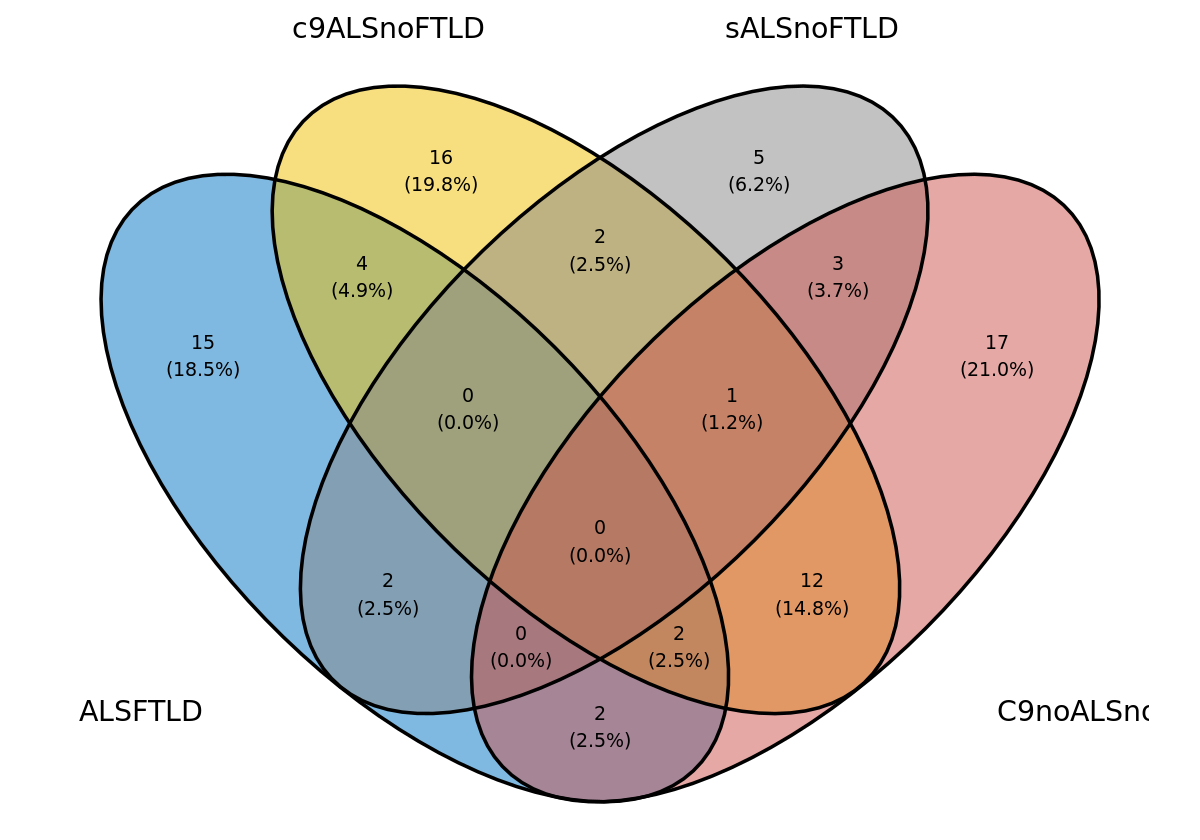

In [123]:
ggvenn(ALS_allcells_lengthened_genes,
       fill_color = c("#0073C2FF", "#EFC000FF", "#868686FF", "#CD534CFF"),
      stroke_size = 1, set_name_size = 6)

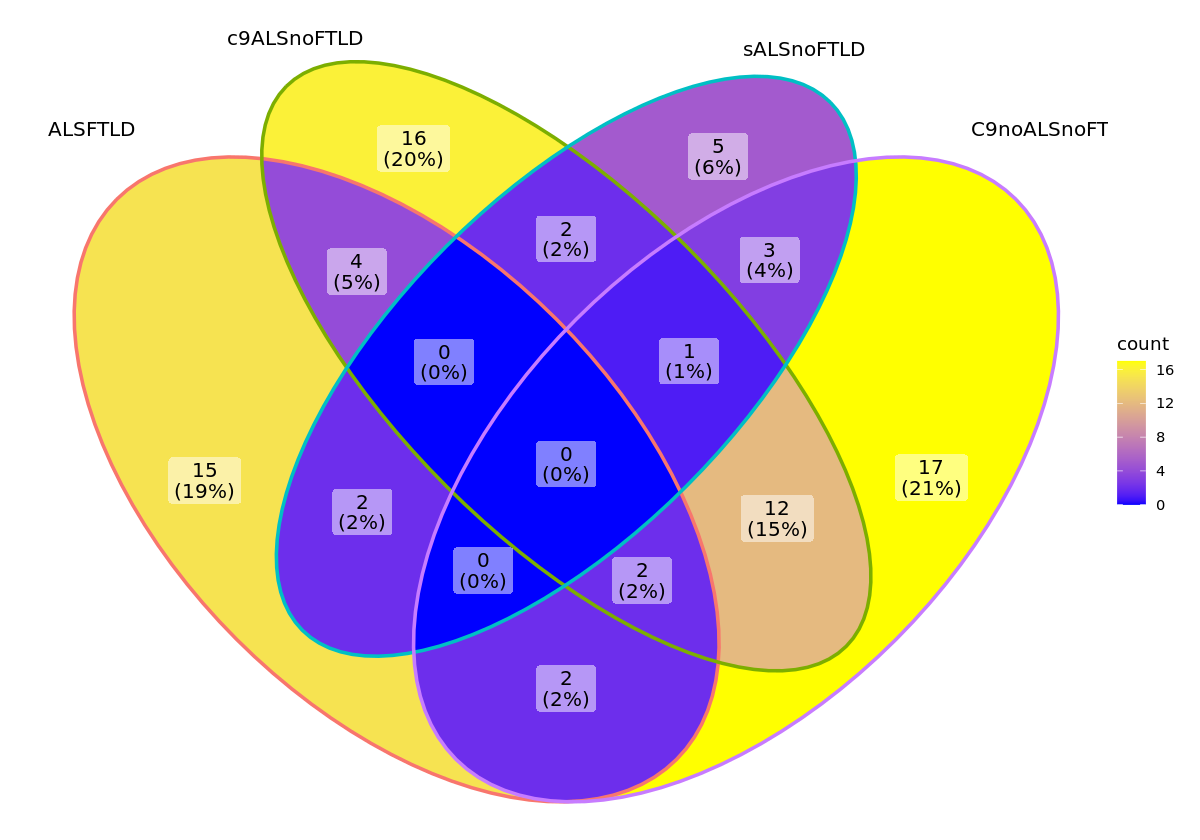

In [124]:
ggVennDiagram(ALS_allcells_lengthened_genes) + 
ggplot2::scale_fill_gradient(low="blue",high = "yellow")

In [205]:
results <- list(c('C9ALSFTLD_Excitatory_Neurons', 'Exc_ALSFTLD_utrshift'),
                c('C9ALSnoFTLD_Excitatory_Neurons', 'Exc_c9ALSnoFTLD_utrshift'),
               c('C9noALSnoFTLD_Excitatory_Neurons','Exc_C9noALSnoFTLD_utrshift'),
               c('sALSnoFTLD_Excitatory_Neurons', 'Exc_sALSnoFTLD_utrshift' ))

# results <- list(c('sALSnoFTLD_Excitatory_Neurons', 'Exc_sALSnoFTLD_utrshift'))

In [127]:
get_UTR_seqs(results, peaks_so_v3, peak.annotations, gtf_TxDb)

[1] "processing the  C9ALSFTLD_Excitatory_Neurons results"


couldnt get any UTR seqs for the population: C9ALSFTLD_Excitatory_Neurons

Here's the original error message:



ERROR: Error in add_gene_peak_info(df, peak.annotations): argument "peak.annotations" is missing, with no default


In [141]:
peaks_so_v3 <- SetIdent(peaks_so_v3, value = peaks_so_v3$ct_cnd)

In [207]:
source('/home/aiden/codes/APA_stuff/post_qual/APA/usefull_functions.R')
get_UTR_seqs(results, peaks_so_v3, peak.annotations, gtf_TxDb)

[1] "processing the  C9ALSFTLD_Excitatory_Neurons results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not prese

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not pr

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not p

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not pr

[1] "processing the  C9ALSnoFTLD_Excitatory_Neurons results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not pre

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

Warning message in if (strand == "1") {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (current_dist <= d

[1] "processing the  C9noALSnoFTLD_Excitatory_Neurons results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present 

[1] "processing the  sALSnoFTLD_Excitatory_Neurons results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not pre

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not p

Warning message in if (current_dist <= distance & current_dist > 0) {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (strand == "1") {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (current_dist <= distance & current_dist > 0) {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (strand == "1") {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (current_dist <= distance & current_dist > 0) {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (strand == "1") {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (current_dist <= distance & current_dist > 0) {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (strand == "1") {:
"the condition has length > 1 and only the first elemen

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not 

In [219]:
peaks_so_v3 <- SetIdent(peaks_so_v3, value=peaks_so_v3$cond)

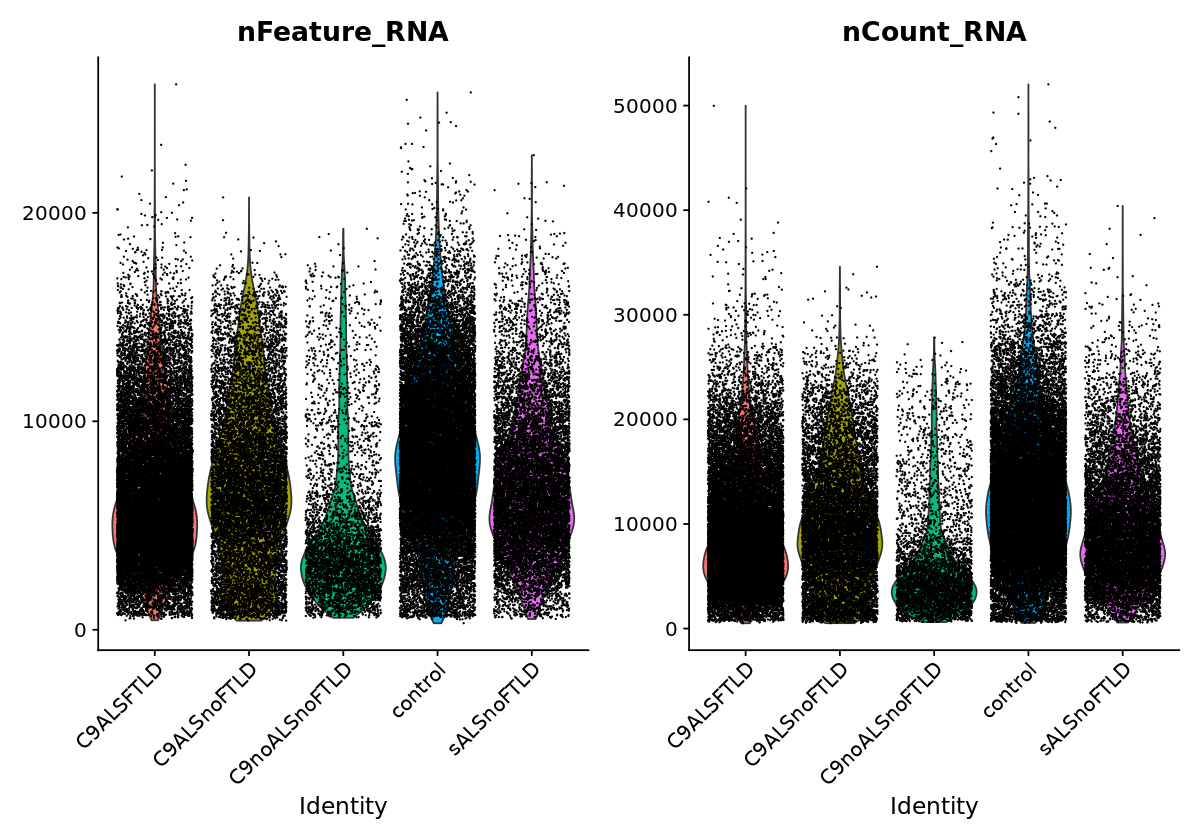

In [220]:
VlnPlot(peaks_so_v3, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2)

In [221]:
mean(peaks_so_v3$nFeature_RNA)

[1] 7291.004

In [222]:
mean(peaks_so_v3$nCount_RNA)

[1] 10601.33

In [223]:
## test the RBP expressions
#grep '"alt":' sALSnoFTLD_tomtom.html | awk '{print $2}' | uniq | tr -d '\n'

In [12]:
sALSnoFTLD_exc_rbp <- toupper(c("A1CF","ANKHD1","ARET","BRUNOL4","TIAR-3","CG14718","CG2950","CNOT4",
                      "CG33714","CG5213","PAPI","CPEB2","DAZAP1","EXC-7","FMR1","FUS","SRSF10",
                      "FXR2","HNRNPA1","HNRNPA1L2","HNRNPA2B1","HNRNPC","HNRNPK","HNRNPL","HRB87F",
                      "HuR","IGF2BP2","LARK","LIN28A","MBNL1","MSI","MSI1","Nab2p","PABPC4","PCBP2",
                      "PPRC1","QKI","RBM3","RBM38","RBM4","RBM8A","RBMS3","RBP1","REF2","RNP4F","RSF1",
                      "SAMD4A","SART3","SF1","SF2","SRSF9","SHEP","SM","SRSF2","SRSF7","SRSF9","TUT1","TIA1",
                      "TRA2","U2AF2","U2AF50","UNC-75","Vts1p","YBX1","YBX2","ZC3H10","ZC3H14","SRSF10",
                      "HNRNPL","HRB98DE","LARK","MSI","PUM","SRSF1","Vts1p","HuR","RBM4","ARET","YBX1",
                      "HuR","HOW","SXL","FNE","ELAV","BRU-3","A2BP1","LARK","ORB2","RBP1-LIKE","CG11360",
                      "CG17838","RBP9","CPO","B52","HuR","MUB","RIN","PABP","MOD","PUF68","CG7903","SNF",
                      "CG7804","CG2931","ROX8","ENOX1","ESRP2","RBMS1","PABPC3","RBM5","PABPC1","CNOT4",
                      "PABPN1","CPEB4","RALY","HNRNPH2","LIN28A","SRSF1","ZNF638","TIA1","BRUNOL5","HNRNPCL1",
                      "RBFOX1","KHDRBS1","RBM6","PABPC5","IGF2BP3","RBMS3","SHEP","SFPQ","HNRPLL","SUP-12",
                      "ASD-1","SUP-26","ETR-1","RBM24","KHDRBS2","PCBP1","BRUNOL6","MAL8P1.40","PFI1435w",
                      "PFI1695c","Pp_0206","NCU08034","Lm_0212","PCBP3","Tb_0216","Tb_0217","Tb_0218","Lm_0223",
                      "Tp_0225","Tv_0226","Pp_0228","Pp_0229","Tb_0230","Smp_067420","MAL13P1.35","PFF0320c",
                      "Tv_0236","Pp_0237","NCU02404","PCBP1","PF10_0214","RBM45","Pcbp2","Rbm4.3","Pr_0249",
                      "Tb_0251","Tb_0253","Lm_0254","Lm_0255","TIAR-1","Tv_0257","Tv_0258","Tv_0259","Ng_0261",
                      "Ot_0262","Ot_0263","An_0265","PTBP1","ARET","SRP54","EIF-2ALPHA","HuR","Nv_0278",
                      "RBM47","Rbm47","Syncrip","Rbm42","Rbm38","Rbm24","An_0287","HNRNPR","Hnrnpr","A1CF"))


c9ALSFTLD_exc_rbp <- toupper(c("A1CF","ANKHD1","ARET","BRUNOL4","TIAR-3","CG14718","CG2950","CNOT4","CG33714",
                                "CG5213","PAPI","CPEB2","DAZAP1","EXC-7","FUS","SRSF10","FXR2","G3BP2","HNRNPA1",
                                "HNRNPA1L2","HNRNPA2B1","HNRNPC","HNRNPK","HNRNPL","HRB87F","HuR","IGF2BP2",
                                "KHDRBS3","LARK","LIN28A","MATR3","MBNL1","MSI","MSI1","Nab2p","PABPC4","PCBP2",
                                "PPRC1","PUM","QKI","RBM3","RBM38","RBM4","RBM41","RBM46","RBM8A","RBMS3","RBP1",
                                "REF2","RSF1","SAMD4A","SART3","SF1","SF2","SRSF9","SHEP","SM","SNRPA","SRSF2","SRSF7",
                                "TUT1","TARDBP","TIA1","TRA2","U2AF2","U2AF50","UNC-75","Vts1p","YBX1","YBX2","ZC3H10",
                                "ZC3H14","SRSF10","HNRNPL","HRB98DE","LARK","MSI","PUM","SRSF1","Vts1p","HuR",
                                "RBM4","ARET","YBX1","HuR","HOW","SXL","FNE","ELAV","BRU-3","A2BP1","LARK","ORB2",
                                "RBP1-LIKE","CG17838","RBP9","CPO","B52","HuR","MUB","RIN","PABP","PUF68",
                                "QKR58E-1","SNRNP70K","CG7903","CG7804","CG2931","ROX8","ENOX1","ESRP2","RBM42",
                                "RBMS1","PABPC3","RBM5","PABPC1","CNOT4","PABPN1","CPEB4","RALY","HNRNPH2","FXR1",
                                "LIN28A","SRSF1","ZNF638","TIA1","BRUNOL5","HNRNPCL1","KHDRBS1","RBM6","PABPC5",
                                "IGF2BP3","RBMS3","SHEP","MSI1","SFPQ","HNRPLL","SUP-12","ASD-1","SUP-26","ETR-1",
                                "RBM24","KHDRBS2","PCBP1","BRUNOL6","MAL8P1.40","PFI1435w","PFI1695c","Pp_0206",
                                "NCU08034","Lm_0212","PCBP3","Tb_0216","Tb_0217","Tb_0218","Tb_0219","Tb_0220",
                                "Sf3b4","Tp_0225","Tv_0226","Pp_0228","Pp_0229","Tb_0230","Smp_067420","PFF0320c",
                                "Tv_0236","Pp_0237","NCU02404","PCBP1","PF10_0214","RBM45","Pcbp2","Rbm4.3",
                                "Pr_0249","Tb_0251","Tb_0253","Lm_0254","Lm_0255","TIAR-1","Tv_0257","Tv_0258",
                                "Tv_0259","Ng_0261","Ot_0262","Ot_0263","An_0265","PTBP1","ARET","HuR","Nv_0278",
                                "RBM47","Rbm47","Rbm42","Rbm38","At_0284","Rbm24","An_0287","HNRNPR","Hnrnpr","A1CF"))

c9ALSnoFTLD_exc_rbp <- toupper(c("ANKHD1","ARET","BRUNOL4","TIAR-3","CG14718","CG2950","CNOT4","CG33714","CG5213",
                                "PAPI","CPEB2","DAZAP1","EXC-7","FMR1","FOX-1","FUS","SRSF10","FXR2","HNRNPA1",
                                "HNRNPA1L2","HNRNPA2B1","HNRNPC","HNRNPK","HNRNPL","HRB27C","HRB87F","HuR",
                                "IGF2BP2","LARK","LIN28A","MATR3","MBNL1","MEX-5","MSI","MSI1","Nab2p",
                                "PABPC4","PCBP2","PPRC1","QKI","RBM3","RBM38","RBM4","RBM46","RBM5","RBM8A",
                                "RBMS3","RBP1","REF2","RNP4F","RSF1","KHDRBS1","SAMD4A","SART3","SF1","SF2",
                                "SRSF9","SHEP","SM","SNRPA","SRSF2","SRSF7","TUT1","TARDBP","TIA1","U2AF2",
                                "U2AF50","UNC-75","Vts1p","YBX1","YBX2","ZC3H10","ZC3H14","SRSF10","HNRNPL",
                                "HRB27C","HRB98DE","LARK","MSI","SRSF1","Vts1p","HuR","RBM4","ARET","YBX1",
                                "HuR","HOW","SXL","FNE","ELAV","BRU-3","A2BP1","LARK","ORB2","RBP1-LIKE",
                                "CG17838","RBP9","CPO","B52","HuR","MUB","RIN","PABP","PUF68","QKR58E-1","CG7903",
                                "CG7804","CG2931","ROX8","ENOX1","ESRP2","RBMS1","PABPC3","RBM5","PABPC1","CNOT4",
                                "CPEB4","RALY","HNRNPH2","FXR1","LIN28A","SRSF1","TIA1","BRUNOL5","HNRNPCL1",
                                "RBFOX1","KHDRBS1","RBM6","PABPC5","IGF2BP3","RBMS3","SHEP","MSI1","SFPQ","HNRPLL",
                                "SUP-12","ASD-1","MEC-8","SUP-26","ETR-1","RBM24","KHDRBS2","PCBP1","BRUNOL6",
                                "PF10_0068","PFI1435w","PFI1695c","NCU08034","PCBP3","Tb_0216","Tb_0217","Sf3b4",
                                "Tp_0225","Tv_0226","Pp_0228","Pp_0229","Tb_0230","Smp_067420","PFF0320c","Tv_0236",
                                "Pp_0237","NCU02404","PCBP1","PF10_0214","RBM45","Pcbp2","Rbm4.3","Pr_0249","Tb_0251",
                                "Tb_0252","Tb_0253","Lm_0254","Lm_0255","TIAR-1","Tv_0257","Tv_0258","Ng_0261","Ot_0262",
                                "Ot_0263","An_0265","PTBP1","ARET","SRP54","EIF-2ALPHA","HuR","Nv_0278","RBM47","Rbm47",
                                "Rbm42","Rbm38","At_0284","Rbm24","An_0287","HNRNPR","Hnrnpr","A1CF"))


c9noALSnoFTLD_exc_rbp <- toupper(c("TIAR-3","CPEB2","EXC-7","FUS","FXR2","HNRNPA1","HNRNPA1L2","HNRNPA2B1",
                                   "HNRNPC","HNRNPK","HRB87F","HuR","LARK","LIN28A","Nab2p","PABPC4","RBM3",
                                   "RBM4","RBM5","RBM8A","SAMD4A","SART3","SF1","TUT1","TIA1","TRA2","U2AF2",
                                   "U2AF50","UNC-75","Vts1p","YBX1","ZC3H14","HRB98DE","MSI","Vts1p","HuR",
                                   "RBM4","HuR","SXL","ELAV","BRU-3","A2BP1","LARK","CG17838","RBP9","HuR",
                                   "MUB","CG7804","RBM5","PABPC1","CNOT4","CPEB4","RALY","LIN28A","SRSF1",
                                   "TIA1","HNRNPCL1","SFPQ","ETR-1","BRUNOL6","PFI1435w","Tv_0226","Pp_0228",
                                   "Pp_0229","Tb_0230","Smp_067420","Tv_0236","Pp_0237","NCU02404","PF10_0214",
                                   "Tb_0253","Lm_0255","TIAR-1","Tv_0257","Tv_0258","Ot_0262","An_0265","PTBP1",
                                   "HuR","Hnrnpr"))

In [21]:
## Check point! save the objects and load them for subsequent analysis
# saveRDS(peaks_so, 'rdata/ALS_CT_labeled_final_MD.rds')
# saveRDS(peaks_so_v3, 'rdata/ALS_CT_v3_final_MD.rds')
peaks_so_v3 <- readRDS('rdata/ALS_CT_v3_final_MD.rds')
ge_so_als_P <- readRDS('rdata/ALS_CT_labeled.rds')
ge_so_als_P_v3 <- subset(ge_so_als_P, subset = chemistry =='V3')
ge_so_als_P_v3 <- AddMetaData(ge_so_als_P, metadata=peaks_so_v3@meta.data)

In [14]:
ge_so_als_P_v3_exc <- subset(ge_so_als_P_v3, subset = main_celltypes=='Excitatory_Neurons')
table(ge_so_als_P_v3_exc$ct_cnd) 


    C9ALSFTLD_Excitatory_Neurons   C9ALSnoFTLD_Excitatory_Neurons 
                            1178                             1794 
C9noALSnoFTLD_Excitatory_Neurons       control_Excitatory_Neurons 
                             594                              520 
   sALSnoFTLD_Excitatory_Neurons 
                             359 

In [25]:
≈
c9noALSnoFTLD_rbp_exp

Warning message:
"The following 40 features were not found in the SCT assay: TIAR-3, EXC-7, HRB87F, HUR, LARK, NAB2P, TRA2, U2AF50, UNC-75, VTS1P, HRB98DE, MSI, SXL, ELAV, BRU-3, A2BP1, CG17838, RBP9, MUB, CG7804, HNRNPCL1, ETR-1, BRUNOL6, PFI1435W, TV_0226, PP_0228, PP_0229, TB_0230, SMP_067420, TV_0236, PP_0237, NCU02404, PF10_0214, TB_0253, LM_0255, TIAR-1, TV_0257, TV_0258, OT_0262, AN_0265"


SCT.C9ALSFTLD_Excitatory_Neurons SCT.C9ALSnoFTLD_Excitatory_Neurons
CPEB2     0.252971138                      0.395763657                       
FUS       0.403225806                      0.552396878                       
FXR2      0.096774194                      0.127647715                       
HNRNPA1   0.261460102                      0.169453735                       
HNRNPA1L2 0.007640068                      0.011148272                       
HNRNPA2B1 1.112903226                      0.901895206                       
HNRNPC    0.600169779                      0.983277592                       
HNRNPK    0.337860781                      0.292084727                       
LIN28A    0.000000000                      0.003344482                       
PABPC4    0.068760611                      0.109253066                       
RBM3      0.050084890                      0.107023411                       
RBM4      0.410016978                      0.562987737                       
RBM5      0.448217317                      0.652173913                       
RBM8A     0.161290323                      0.108695652                       
SAMD4A    0.179966044                      0.547937570                       
SART3     0.232597623                      0.261426979                       
SF1       0.395585739                      0.324972129                       
TUT1      0.037351443                      0.057413601                       
TIA1      0.210526316                      0.254738016                       
U2AF2     0.062818336                      0.099777035                       
YBX1      0.156196944                      0.143812709                       
ZC3H14    0.730050934                      0.855629877                       
PABPC1    0.518675722                      0.492753623                       
CNOT4     0.593378608                      0.856744705                       
CPEB4     1.525466893                      2.000000000                       
RALY      0.116298812                      0.193422520                       
SRSF1     0.191001698                      0.255852843                       
SFPQ      0.524617997                      1.176142698                       
PTBP1     0.100169779                      0.104793757                       
HNRNPR    0.402376910                      0.365663322                       
          SCT.C9noALSnoFTLD_Excitatory_Neurons SCT.control_Excitatory_Neurons
CPEB2     0.109427609                          1.02307692                    
FUS       0.321548822                          1.02307692                    
FXR2      0.043771044                          0.19230769                    
HNRNPA1   0.077441077                          0.55576923                    
HNRNPA1L2 0.003367003                          0.01346154                    
HNRNPA2B1 0.430976431                          2.36730769                    
HNRNPC    0.303030303                          1.72500000                    
HNRNPK    0.101010101                          1.05384615                    
LIN28A    0.001683502                          0.01153846                    
PABPC4    0.062289562                          0.17884615                    
RBM3      0.040404040                          0.20576923                    
RBM4      0.299663300                          0.81923077                    
RBM5      0.296296296                          1.11153846                    
RBM8A     0.038720539                          0.22692308                    
SAMD4A    0.303030303                          0.88846154                    
SART3     0.084175084                          0.41923077                    
SF1       0.200336700                          0.85576923                    
TUT1      0.016835017                          0.06538462                    
TIA1      0.141414141                          0.68846154                    
U2AF2     0.031986532           

In [85]:
c9noALSnoFTLD_rbp_lfc <- log(c9noALSnoFTLD_rbp_exp['SCT.C9noALSnoFTLD_Excitatory_Neurons']/c9noALSnoFTLD_rbp_exp[,'SCT.control_Excitatory_Neurons'] , base=2)
c9noALSnoFTLD_rbp_lfc
c9noALSnoFTLD_available_rbps <- rownames(c9noALSnoFTLD_rbp_lfc)

SCT.C9noALSnoFTLD_Excitatory_Neurons
CPEB2     -3.224866                           
FUS       -1.669805                           
FXR2      -2.135368                           
HNRNPA1   -2.843315                           
HNRNPA1L2 -1.999306                           
HNRNPA2B1 -2.457566                           
HNRNPC    -2.509062                           
HNRNPK    -3.383093                           
LIN28A    -2.776914                           
PABPC4    -1.521657                           
RBM3      -2.348456                           
RBM4      -1.450927                           
RBM5      -1.907445                           
RBM8A     -2.551032                           
SAMD4A    -1.551847                           
SART3     -2.316279                           
SF1       -2.094795                           
TUT1      -1.957486                           
TIA1      -2.283450                           
U2AF2     -2.093771                           
YBX1      -2.379578                           
ZC3H14    -1.823456                           
PABPC1    -2.161291                           
CNOT4     -1.974790                           
CPEB4     -2.223136                           
RALY      -1.068377                           
SRSF1     -2.251823                           
SFPQ      -1.627221                           
PTBP1     -1.541536                           
HNRNPR    -2.837943

In [255]:
log(0.109427609/1.02307692, base=2)

[1] -3.224866

In [84]:
c9ALSnoFTLD_rbp_exp <- as.data.frame(AverageExpression(ge_so_als_P_v3_exc,
                                                         features = c9ALSnoFTLD_exc_rbp,
                                                         assays = 'SCT', group.by='ct_cnd' ))
c9ALSnoFTLD_rbp_lfc <- log(c9ALSnoFTLD_rbp_exp['SCT.C9ALSnoFTLD_Excitatory_Neurons']/c9ALSnoFTLD_rbp_exp[,'SCT.control_Excitatory_Neurons'] , base=2)
c9ALSnoFTLD_rbp_lfc
c9ALSnoFTLD_available_rbps <- rownames(c9noALSnoFTLD_rbp_lfc)

Warning message:
"The following 90 features were not found in the SCT assay: ARET, BRUNOL4, TIAR-3, CG14718, CG2950, CG33714, CG5213, PAPI, EXC-7, FOX-1, HRB27C, HRB87F, HUR, LARK, MEX-5, MSI, NAB2P, REF2, RNP4F, SF2, SHEP, SM, U2AF50, UNC-75, VTS1P, HRB98DE, HOW, SXL, FNE, ELAV, BRU-3, A2BP1, ORB2, RBP1-LIKE, CG17838, RBP9, B52, MUB, RIN, PABP, PUF68, QKR58E-1, CG7903, CG7804, CG2931, ROX8, BRUNOL5, HNRNPCL1, HNRPLL, SUP-12, ASD-1, MEC-8, SUP-26, ETR-1, BRUNOL6, PF10_0068, PFI1435W, PFI1695C, NCU08034, TB_0216, TB_0217, TP_0225, TV_0226, PP_0228, PP_0229, TB_0230, SMP_067420, PFF0320C, TV_0236, PP_0237, NCU02404, PF10_0214, RBM4.3, PR_0249, TB_0251, TB_0252, TB_0253, LM_0254, LM_0255, TIAR-1, TV_0257, TV_0258, NG_0261, OT_0262, OT_0263, AN_0265, EIF-2ALPHA, NV_0278, AT_0284, AN_0287"


SCT.C9ALSnoFTLD_Excitatory_Neurons
ANKHD1    -0.70803666                       
CNOT4     -0.59086387                       
CPEB2     -1.37020358                       
DAZAP1    -0.09228646                       
FMR1      -0.85016149                       
FUS       -0.88913755                       
SRSF10    -1.08352926                       
FXR2      -0.59124876                       
HNRNPA1   -1.71359453                       
HNRNPA1L2 -0.27202319                       
HNRNPA2B1 -1.39221552                       
HNRNPC    -0.81092569                       
HNRNPK    -1.85120544                       
HNRNPL    -1.11883356                       
IGF2BP2   -1.78659636                       
LIN28A    -1.78659636                       
MATR3      0.85725983                       
MBNL1     -0.29572945                       
MSI1       0.43579606                       
PABPC4    -0.71104533                       
PCBP2     -1.49816518                       
PPRC1     -0.17188652                       
QKI       -1.87336855                       
RBM3      -0.94310085                       
RBM38     -1.04963077                       
RBM4      -0.54116640                       
RBM46      0.53533173                       
RBM5      -0.76922923                       
RBM8A     -1.06190910                       
RBMS3     -0.59914799                       
⋮         ⋮                                 
ZC3H10    -0.43609911                       
ZC3H14    -0.76481585                       
SRSF1     -0.88676052                       
CPO        0.23047715                       
ENOX1     -0.04789988                       
ESRP2             NaN                       
RBMS1      0.22635929                       
PABPC3            Inf                       
PABPC1    -0.70950024                       
CPEB4     -0.61244324                       
RALY      -0.29031901                       
HNRNPH2   -1.13268651                       
FXR1      -0.74287498                       
RBFOX1     0.62023734                       
RBM6      -0.30654094                       
PABPC5    -0.52356196                       
IGF2BP3   -1.13451967                       
SFPQ      -0.87927836                       
RBM24     -0.05541312                       
KHDRBS2    0.80662824                       
PCBP1     -1.16957265                       
PCBP3      0.01584307                       
SF3B4     -0.84317989                       
RBM45     -0.04963077                       
PTBP1     -0.53578826                       
SRP54     -0.96200931                       
RBM47     -1.91212724                       
RBM42     -0.56420394                       
HNRNPR    -1.41488629                       
A1CF              NaN

In [69]:
c9ALSFTLD_exc_rbp_exp <- as.data.frame(AverageExpression(ge_so_als_P_v3_exc,
                                                         features = c9ALSFTLD_exc_rbp,
                                                         assays = 'SCT', group.by='ct_cnd' ))
c9ALSFTLD_exc_rbp_lfc <- log(c9ALSFTLD_exc_rbp_exp['SCT.C9ALSFTLD_Excitatory_Neurons']/c9ALSFTLD_exc_rbp_exp[,'SCT.control_Excitatory_Neurons'] , base=2)
c9ALSFTLD_exc_rbp_lfc
c9ALSFTLD_exc_available_rbp <- rownames(c9ALSFTLD_exc_rbp_lfc)

In [82]:
sALSnoFTLD_exc_rbp_exp <- as.data.frame(AverageExpression(ge_so_als_P_v3_exc,
                                                         features = sALSnoFTLD_exc_rbp,
                                                         assays = 'SCT', group.by='ct_cnd' ))

sALSnoFTLD_exc_rbp_lfc <- log(sALSnoFTLD_exc_rbp_exp['SCT.sALSnoFTLD_Excitatory_Neurons']/sALSnoFTLD_exc_rbp_exp[,'SCT.control_Excitatory_Neurons'] , base=2)
sALSnoFTLD_exc_rbp_lfc

sALSnoFTLD_exc_available_rbps <-  rownames(sALSnoFTLD_exc_rbp_lfc)

In [42]:
sALSnoFTLD_exc_rbp_exp
sALSnoFTLD_available_rbps_exc <- rownames(sALSnoFTLD_exc_rbp_exp)

SCT.C9ALSFTLD_Excitatory_Neurons SCT.C9ALSnoFTLD_Excitatory_Neurons
A1CF      0.009337861                      0.000000000                       
ANKHD1    0.671477080                      1.283166109                       
CNOT4     0.593378608                      0.856744705                       
CPEB2     0.252971138                      0.395763657                       
DAZAP1    0.183361630                      0.229096990                       
FMR1      0.205432937                      0.247491639                       
FUS       0.403225806                      0.552396878                       
SRSF10    0.565365025                      0.382943144                       
FXR2      0.096774194                      0.127647715                       
HNRNPA1   0.261460102                      0.169453735                       
HNRNPA1L2 0.007640068                      0.011148272                       
HNRNPA2B1 1.112903226                      0.901895206                       
HNRNPC    0.600169779                      0.983277592                       
HNRNPK    0.337860781                      0.292084727                       
HNRNPL    0.213921902                      0.279821628                       
IGF2BP2   0.004244482                      0.009476031                       
LIN28A    0.000000000                      0.003344482                       
MBNL1     2.135823430                      2.547380156                       
MSI1      0.008488964                      0.023411371                       
PABPC4    0.068760611                      0.109253066                       
PCBP2     0.298811545                      0.332218506                       
PPRC1     0.025466893                      0.054626533                       
QKI       1.213073005                      1.438684504                       
RBM3      0.050084890                      0.107023411                       
RBM38     0.005942275                      0.019509476                       
RBM4      0.410016978                      0.562987737                       
RBM8A     0.161290323                      0.108695652                       
RBMS3     0.401528014                      0.750278707                       
RBP1      0.010186757                      0.007246377                       
RSF1      0.896434635                      1.382943144                       
⋮         ⋮                                ⋮                                 
SRSF1     1.910017e-01                     2.558528e-01                      
CPO       4.753820e-02                     9.476031e-02                      
ENOX1     2.228353e+00                     4.648829e+00                      
ESRP2     0.000000e+00                     0.000000e+00                      
RBMS1     1.943973e-01                     4.364548e-01                      
PABPC3    8.488964e-04                     5.574136e-04                      
RBM5      4.482173e-01                     6.521739e-01                      
PABPC1    5.186757e-01                     4.927536e-01                      
PABPN1    2.555178e-01                     3.216276e-01                      
CPEB4     1.525467e+00                     2.000000e+00                      
RALY      1.162988e-01                     1.934225e-01                      
HNRNPH2   1.468591e-01                     1.254181e-01                      
ZNF638    2.893888e+00                     3.688406e+00                      
RBFOX1    2.006197e+01                     4.522408e+01                      
KHDRBS1   2.920204e-01                     4.091416e-01                      
RBM6      9.745331e-01                     2.032330e+00                      
PABPC5    2.122241e-02                     2.006689e-02                      
IGF2BP3   5.942275e-03                     1.839465e-02                      
SFPQ      5.246180e-01                     1.176143e+00                      
RBM24     1.035654e-01          

In [71]:
table(ge_so_als_P_v3_exc$group)


    C9ALSFTLD   C9ALSnoFTLD C9noALSnoFTLD       control    sALSnoFTLD 
         1178          1794           594           520           359 

In [43]:
### lets try DE of seurat for the rbps
ge_so_als_P_v3_exc <- SetIdent(ge_so_als_P_v3_exc, value = ge_so_als_P_v3_exc$group)
sALS_noFTLD_rbp_DE <- FindMarkers(ge_so_als_P_v3_exc, features = sALSnoFTLD_available_rbps_exc,
                                  ident.1 = 'sALSnoFTLD' , ident.2 = 'control' ,
                                  logfc.threshold = 0.25, test.use = "wilcox")
sALS_noFTLD_rbp_DE

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
HNRNPA2B1 2.546645e-44 -0.8818836 0.565 0.877 7.669986e-40
QKI       1.651855e-38 -1.2585200 0.393 0.815 4.975058e-34
HNRNPR    3.166550e-36 -0.6273423 0.209 0.644 9.537016e-32
HNRNPK    5.464352e-36 -0.7448084 0.184 0.610 1.645754e-31
PCBP2     2.277035e-33 -0.5847711 0.206 0.637 6.857974e-29
CPEB4     4.345183e-28 -0.6614422 0.825 0.942 1.308682e-23
HNRNPC    3.328113e-22 -0.5699616 0.568 0.838 1.002361e-17
SF1       3.267308e-21 -0.4789905 0.256 0.583 9.840478e-17
ZC3H14    9.568759e-21 -0.5955328 0.440 0.706 2.881919e-16
TIA1      7.009740e-20 -0.3639661 0.217 0.537 2.111194e-15
CPEB2     2.125901e-19 -0.4875829 0.340 0.642 6.402790e-15
ZNF638    1.476023e-18 -0.6169802 0.972 0.987 4.445486e-14
FUS       4.148588e-18 -0.4169284 0.421 0.708 1.249472e-13
SRSF10    7.840387e-17 -0.4261922 0.290 0.563 2.361368e-12
HNRNPA1   1.703483e-16 -0.4924729 0.078 0.308 5.130550e-12
KHDRBS2   2.261732e-16  0.5537232 0.883 0.827 6.811885e-12
RBFOX1    6.881496e-15  0.4824352 0.997 0.992 2.072569e-10
SRP54     1.589656e-14 -0.3340568 0.097 0.321 4.787725e-10
ANKHD1    2.287824e-14 -0.5908402 0.691 0.840 6.890469e-10
SFPQ      3.762032e-12 -0.5036857 0.710 0.902 1.133049e-07
RBM5      1.018289e-11 -0.3111060 0.479 0.727 3.066882e-07
SRSF1     2.673278e-09 -0.3324273 0.136 0.304 8.051378e-05
HNRNPL    3.384619e-08 -0.3431086 0.220 0.383 1.019380e-03
PABPC1    4.356658e-08 -0.4426081 0.273 0.431 1.312138e-03
SART3     2.835464e-07 -0.2925095 0.139 0.279 8.539852e-03
SAMD4A    3.598403e-07 -0.2991429 0.340 0.531 1.083767e-02
CNOT4     7.378663e-07 -0.3258779 0.593 0.760 2.222306e-02
RBM6      1.097247e-06 -0.3191659 0.891 0.952 3.304687e-02
RBM4      1.142040e-06 -0.3371481 0.329 0.471 3.439596e-02
RSF1      2.024004e-06 -0.3779568 0.772 0.883 6.095896e-02
RBMS3     6.013870e-06 -0.3257275 0.423 0.598 1.811257e-01
ENOX1     2.683597e-05 -0.3724823 0.944 0.971 8.082456e-01
FMR1      3.171395e-05 -0.2585098 0.164 0.279 9.551607e-01
YBX1      8.434792e-05 -0.2503295 0.095 0.188 1.000000e+00
KHDRBS1   5.249862e-04 -0.2915902 0.312 0.415 1.000000e+00

In [57]:
sALS_noFTLD_rbp_DE$names <- rownames(sALS_noFTLD_rbp_DE)

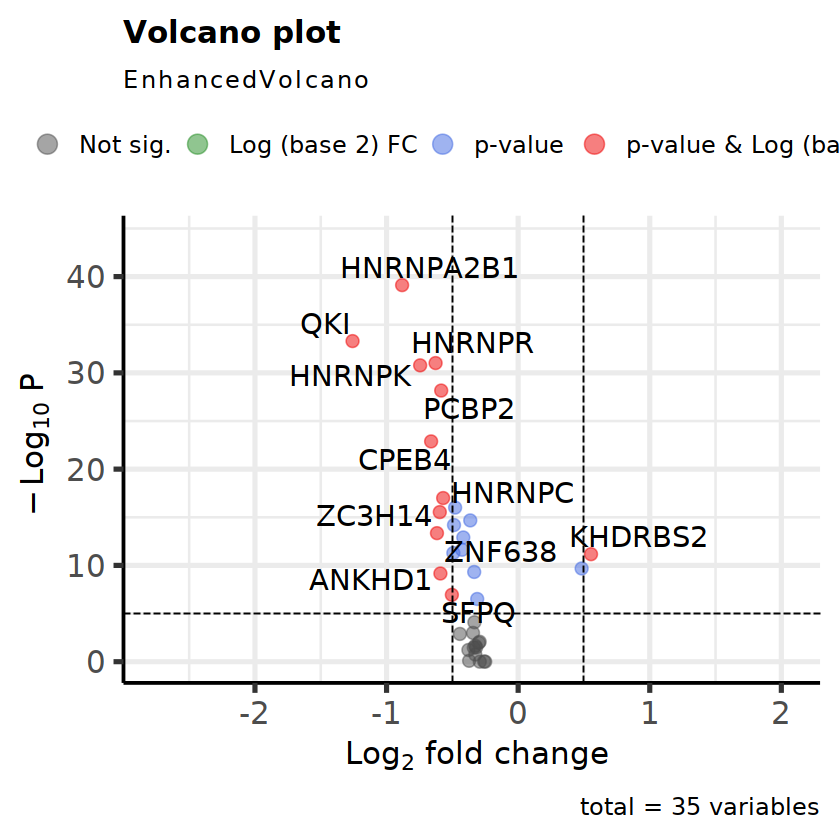

In [68]:
library(EnhancedVolcano)
EnhancedVolcano(sALS_noFTLD_rbp_DE, lab = sALS_noFTLD_rbp_DE$names,
                x = 'avg_log2FC', y = 'p_val_adj',
                FCcutoff = 0.5,  pointSize = 3.0,
                drawConnectors = TRUE, widthConnectors = 0.75,
                labSize = 6.0,
                legendLabels=c('Not sig.','Log (base 2) FC','p-value',
                'p-value & Log (base 2) FC'),)

Warning message:
"ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


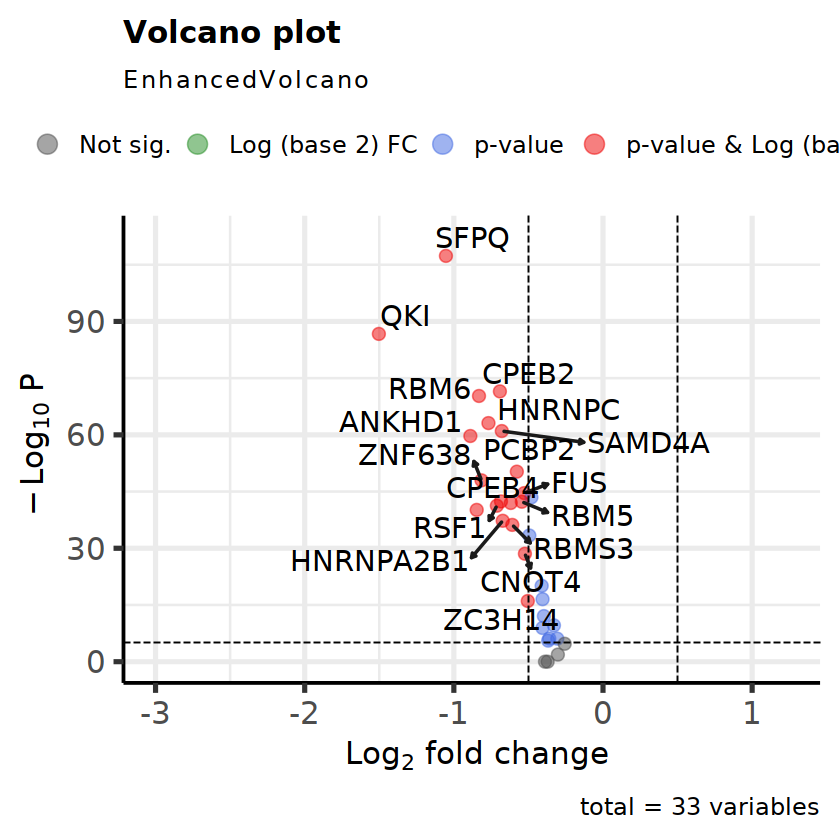

In [75]:
#C9ALSFTLD
c9ALSFTLD_exc_rbp_DE <- FindMarkers(ge_so_als_P_v3_exc, features = c9ALSFTLD_exc_available_rbp,
                                  ident.1 = 'C9ALSFTLD' , ident.2 = 'control' ,
                                  logfc.threshold = 0.25, test.use = "wilcox")
c9ALSFTLD_exc_rbp_DE$names <- rownames(c9ALSFTLD_exc_rbp_DE)
EnhancedVolcano(c9ALSFTLD_exc_rbp_DE, lab = c9ALSFTLD_exc_rbp_DE$names,
                x = 'avg_log2FC', y = 'p_val_adj',
                FCcutoff = 0.5,  pointSize = 3.0,
                drawConnectors = TRUE, widthConnectors = 0.75,
                labSize = 6.0,
                legendLabels=c('Not sig.','Log (base 2) FC','p-value',
                'p-value & Log (base 2) FC'),)

In [80]:
DE_volcano_rbps <- function(so, pathology, features){
    rbp_DE <- FindMarkers(so, features = features,
                                  ident.1 = pathology , ident.2 = 'control' ,
                                  logfc.threshold = 0.25, test.use = "wilcox")
    rbp_DE$names <- rownames(rbp_DE)
    plt <- EnhancedVolcano(rbp_DE, lab = rbp_DE$names,
                    x = 'avg_log2FC', y = 'p_val_adj',
                    FCcutoff = 0.5,  pointSize = 3.0,
                    title = paste0(pathology, ' vs control'),
                    drawConnectors = TRUE, widthConnectors = 0.75,
                    labSize = 6.0,
                    legendLabels=c('Not sig.','Log (base 2) FC','p-value',
                    'p-value & Log (base 2) FC'))
    return(plt)

}

Warning message:
"ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


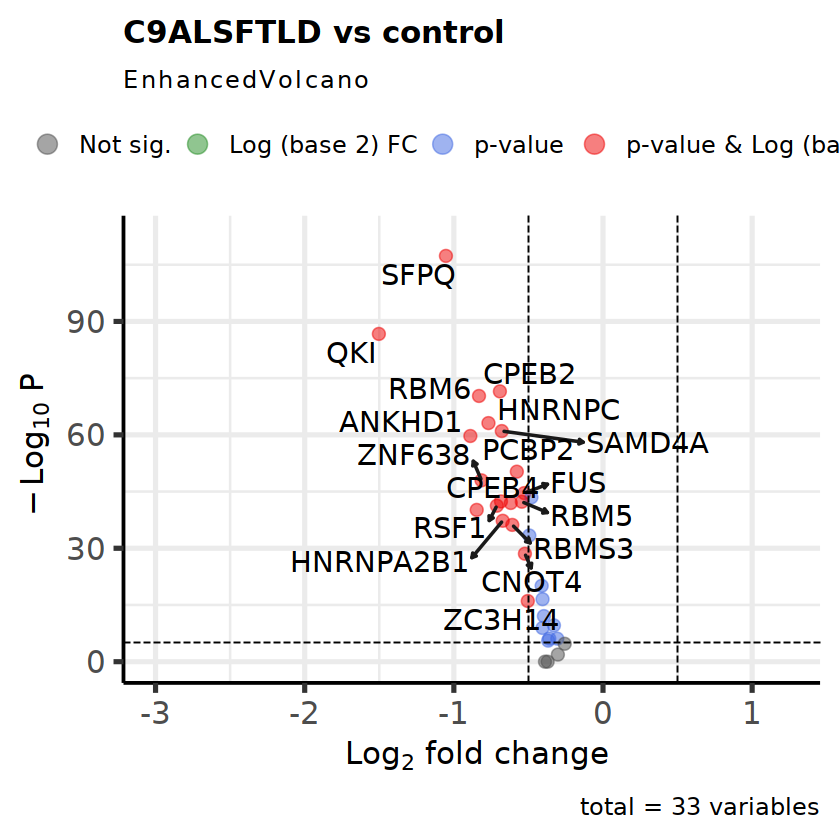

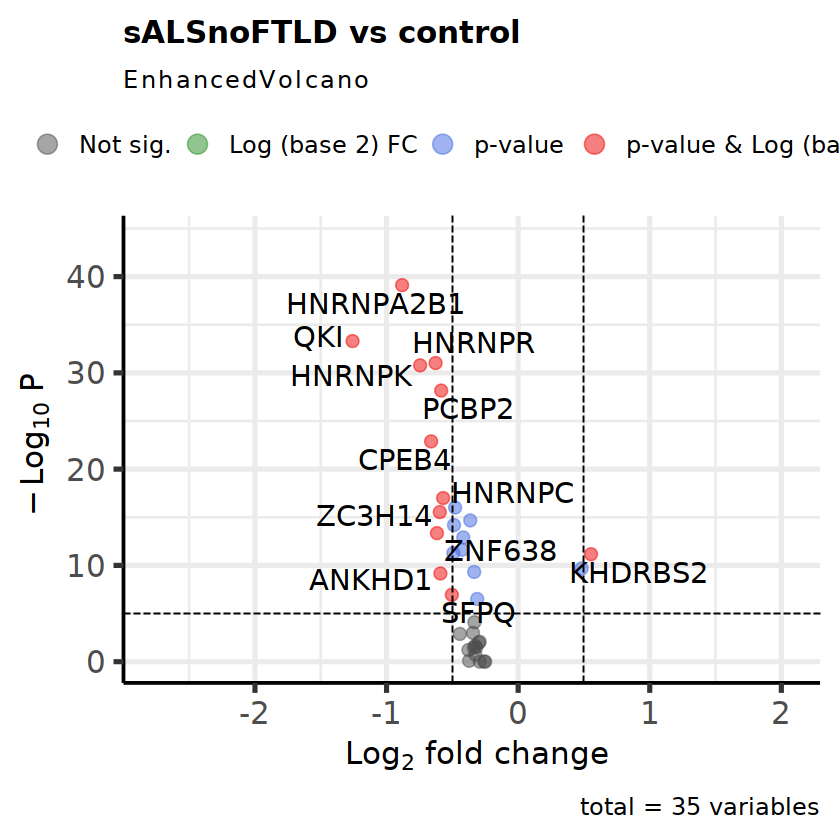

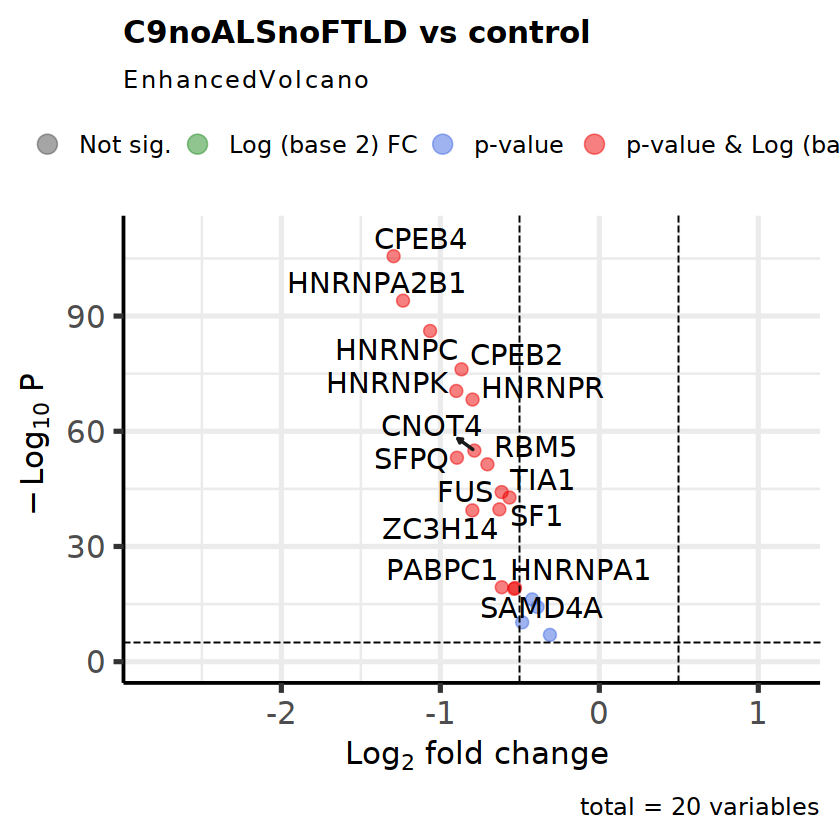

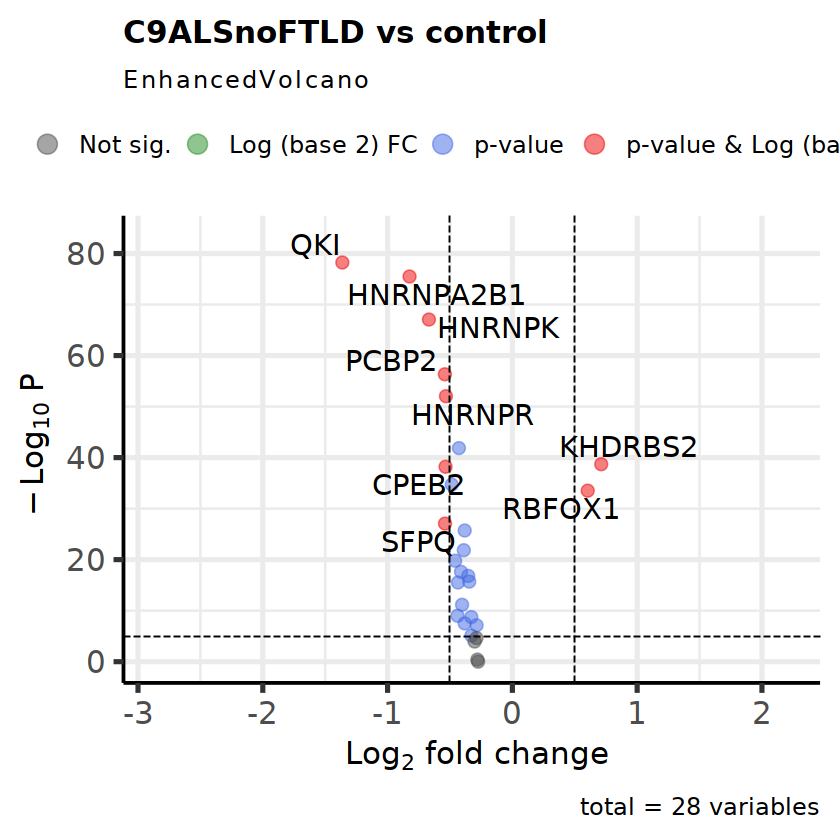

In [86]:
DE_volcano_rbps(ge_so_als_P_v3_exc,'C9ALSFTLD',c9ALSFTLD_exc_available_rbp)
DE_volcano_rbps(ge_so_als_P_v3_exc,'sALSnoFTLD',sALSnoFTLD_exc_available_rbps)
DE_volcano_rbps(ge_so_als_P_v3_exc,'C9noALSnoFTLD',c9noALSnoFTLD_available_rbps)
DE_volcano_rbps(ge_so_als_P_v3_exc,'C9ALSnoFTLD',c9ALSnoFTLD_available_rbps)

table(ge_so_als_P_v3_exc$sample)

In [28]:
### get the peak_stat_df for seq_peak analysis
count_per_sample <- data.frame(samples=ALS_all_peaks_so$sample, peak_count=ALS_all_peaks_so$nCount_peaks,
                               features=ALS_all_peaks_so$nFeature_peaks)
count_per_sample <- count_per_sample %>%
  group_by(samples) %>%
  summarise(median_peak_count = median(peak_count), median_feature_count=median(features))
count_per_sample
write.table(count_per_sample, file='results/Paul_ALS_peak_stat.tsv', sep='\t')

samples       median_peak_count median_feature_count
1  C9ALSFTLD1     6808.0           5217.0              
2  C9ALSFTLD2     6039.0           4561.5              
3  C9ALSFTLD3    12590.0           8552.0              
4  C9ALSFTLD4     7683.0           5756.0              
5  C9ALSFTLD5     2507.0           2027.5              
6  C9ALSFTLD6     2940.0           2392.0              
7  C9ALSnoFTLD1   9383.0           6861.0              
8  C9ALSnoFTLD2   3113.0           2491.0              
9  C9ALSnoFTLD3   9454.0           6804.0              
10 C9noALSnoFTLD  4619.0           3669.0              
11 CTRL1         13743.0           9209.0              
12 CTRL2         13805.0           8954.0              
13 CTRL4         14456.0           9314.0              
14 CTRL6         10829.0           7759.5              
15 CTRL7         10397.0           7445.0              
16 sALSnoFTLD1    2868.0           2408.0              
17 sALSnoFTLD2    3170.5           2554.5              
18 sALSnoFTLD3    9246.0           6752.0              
19 sALSnoFTLD4   10180.5           7259.0              
20 sALSnoFTLD6    4255.0           3363.0              
21 sALSnoFTLD7    2937.0           2407.5              
22 sALSnoFTLD8    7462.0           5482.0

In [277]:
write.table(count_per_sample, file='results/Paul_ALS_peak_stat.tsv', sep='\t')

# Chapter N 
## lets do the analysis for the other celltypes and see the results important


In [1]:
ge_so_als_P_v

ERROR: Error in eval(expr, envir, enclos): object 'ge_so_als_P_v' not found


In [5]:
peaks_so_v3 <- readRDS('rdata/ALS_CT_v3_final_MD.rds')
peaks_so_v3

An object of class Seurat 
279088 features across 73066 samples within 1 assay 
Active assay: RNA (279088 features, 0 variable features)

In [6]:
table(peaks_so_v3$ct_cnd)


            C9ALSFTLD_Astrocytes            C9ALSFTLD_Endothelial 
                            3101                              270 
    C9ALSFTLD_Excitatory_Neurons     C9ALSFTLD_Inhibitory_Neurons 
                            1178                             1961 
             C9ALSFTLD_Microglia       C9ALSFTLD_Oligodendrocytes 
                            1095                            13958 
                   C9ALSFTLD_OPC           C9ALSnoFTLD_Astrocytes 
                            1305                             1997 
         C9ALSnoFTLD_Endothelial   C9ALSnoFTLD_Excitatory_Neurons 
                             113                             1794 
  C9ALSnoFTLD_Inhibitory_Neurons            C9ALSnoFTLD_Microglia 
                            1231                              394 
    C9ALSnoFTLD_Oligodendrocytes                  C9ALSnoFTLD_OPC 
                            4868                              531 
        C9noALSnoFTLD_Astrocytes        C9noALSnoFTLD_Endothe

In [11]:
utrshift_from_all <- function(celltype){
    res <- list()
    ##
    print('C9ALSFTLD')
    ALSFTLD_utrshift <- DetectUTRLengthShift(peaks.object = peaks_so_v3, 
                                          gtf_gr = gtf_gr,
                                          gtf_TxDb = gtf_TxDb,
                                          population.1 = paste0('C9ALSFTLD_',celltype), 
                                          population.2 = paste0('control_',celltype))

    plt1 <- PlotUTRLengthShift(ALSFTLD_utrshift)
    res[['C9ALSFTLD']] <- plt1
    ## 
    print('c9ALSnoFTLD')
    c9ALSnoFTLD_utrshift <- DetectUTRLengthShift(peaks.object = peaks_so_v3, 
                                          gtf_gr = gtf_gr,
                                          gtf_TxDb = gtf_TxDb,
                                          population.1 = paste0('C9ALSnoFTLD_',celltype), 
                                          population.2 = paste0('control_',celltype))
    plt2 <- PlotUTRLengthShift(c9ALSnoFTLD_utrshift)
    res[['C9ALSnoFTLD']] <- plt2
    ####
    print('sALSnoFTLD')
    sALSnoFTLD_utrshift <- DetectUTRLengthShift(peaks.object = peaks_so_v3, 
                                          gtf_gr = gtf_gr,
                                          gtf_TxDb = gtf_TxDb,
                                          population.1 =  paste0('sALSnoFTLD_',celltype), 
                                          population.2 =  paste0('control_',celltype))
    plt3 <- PlotUTRLengthShift(sALSnoFTLD_utrshift)
    res[['sALSnoFTLD']] <- plt3
    ## 
    print('c9noALSnoFTLD')
    C9noALSnoFTLD_utrshift <- DetectUTRLengthShift(peaks.object = peaks_so_v3, 
                                          gtf_gr = gtf_gr,
                                          gtf_TxDb = gtf_TxDb,
                                          population.1 = paste0('C9noALSnoFTLD_',celltype), 
                                          population.2 =  paste0('control_',celltype))
    plt4 <- PlotUTRLengthShift(C9noALSnoFTLD_utrshift)
    res[['c9noALSnoFTLD']] <- plt4
    return(res)
}

[1] "C9ALSFTLD"
[1] "4091 expressed peaks in feature types UTR3"
[1] "3906 peaks after filtering out A-rich annotations"
[1] "896 genes detected with multiple peak sites expressed"
[1] "2873 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 4.18572797967759e-11"
[1] "c9ALSnoFTLD"
[1] "3852 expressed peaks in feature types UTR3"
[1] "3677 peaks after filtering out A-rich annotations"
[1] "841 genes detected with multiple peak sites expressed"
[1] "2710 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"


Warning message in wilcox.test.default(pos.upreg, pos.downreg):
"cannot compute exact p-value with ties"


[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 0.358215995901377"
[1] "sALSnoFTLD"
[1] "4001 expressed peaks in feature types UTR3"
[1] "3820 peaks after filtering out A-rich annotations"
[1] "871 genes detected with multiple peak sites expressed"
[1] "2808 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 6.93308508521463e-12"
[1] "c9noALSnoFTLD"
[1] "3816 expressed peaks in feature types UTR3"
[1] "3645 peaks after filtering out A-rich annotations"
[1] "831 genes detected with multiple peak sites expressed"
[1] "2687 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"


Warning message in wilcox.test.default(pos.upreg, pos.downreg):
"cannot compute exact p-value with ties"


[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 0.00588787992462223"


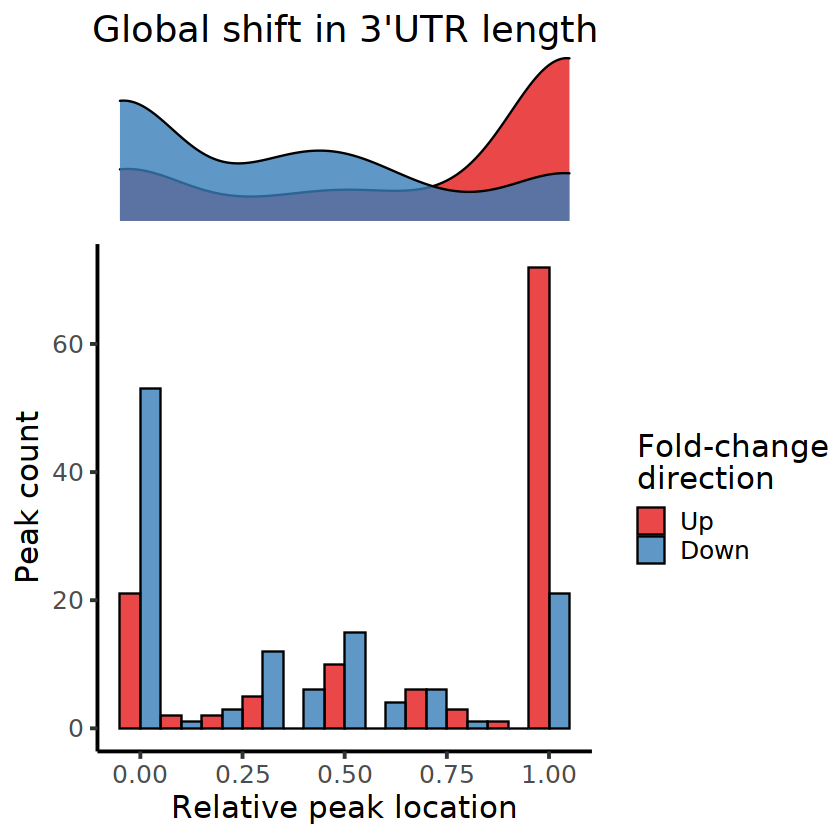

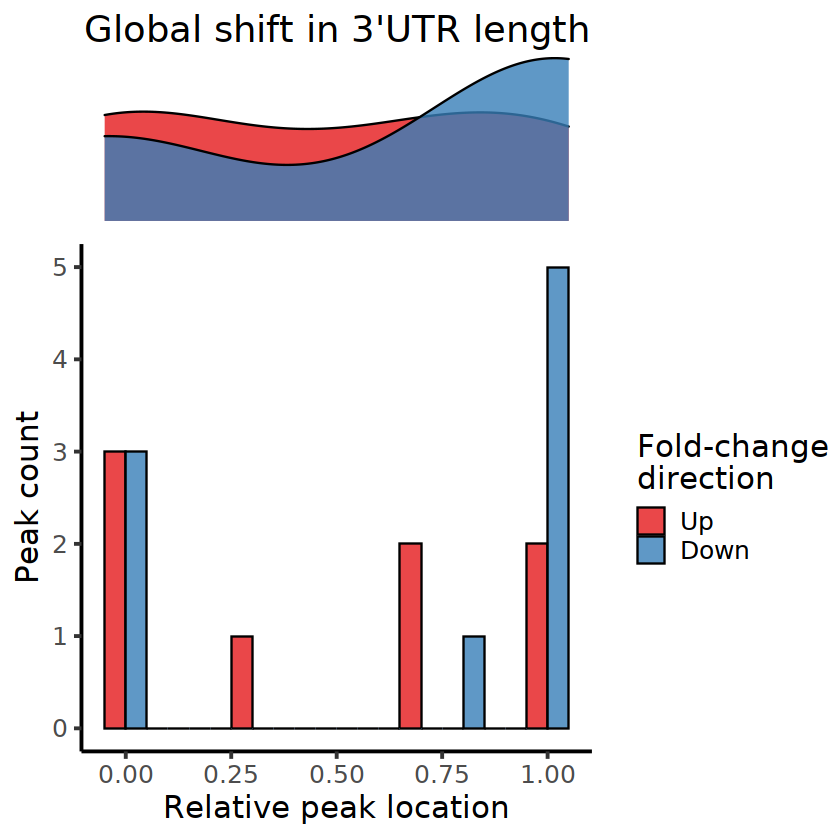

$C9ALSFTLD

$C9ALSnoFTLD

$sALSnoFTLD

$c9noALSnoFTLD


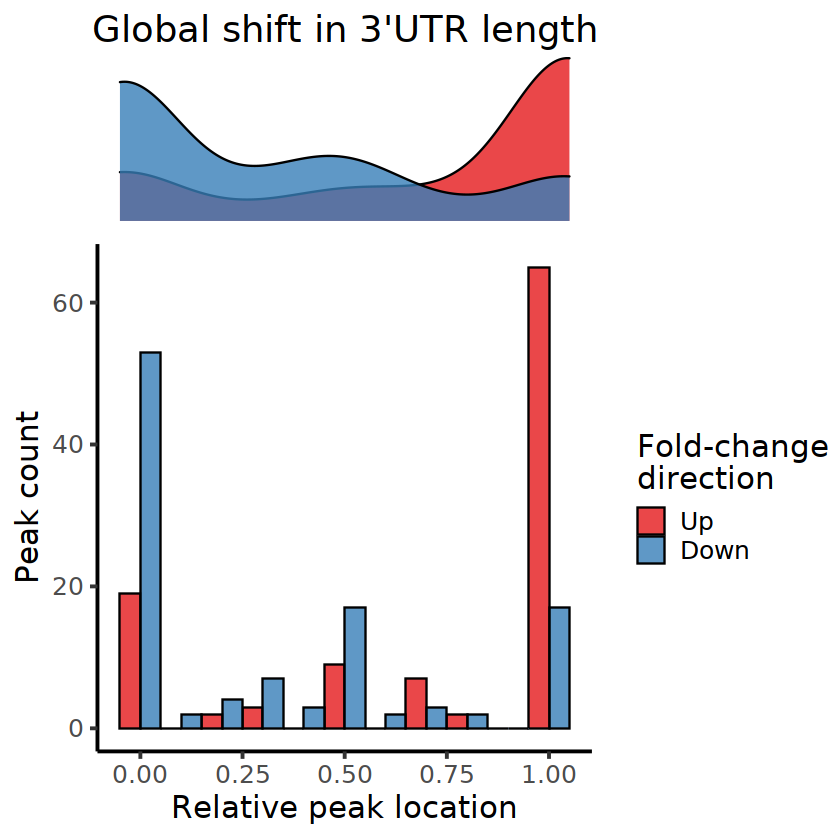

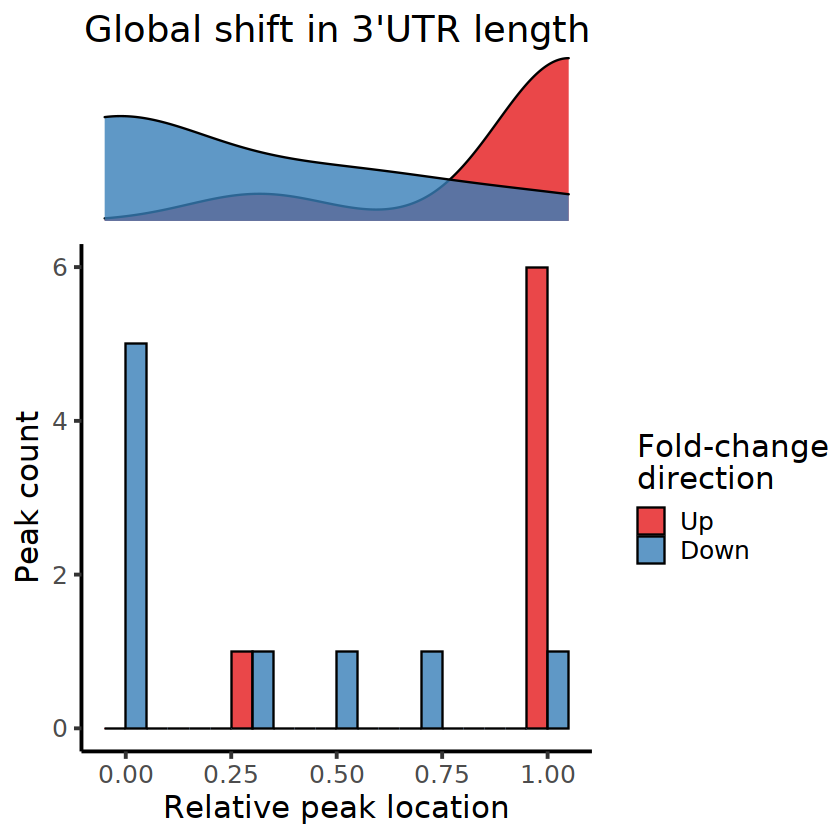

In [12]:
##Microglia
mg_res <- utrshift_from_all('Microglia')
mg_res

[1] "C9ALSFTLD"
[1] "11109 expressed peaks in feature types UTR3"
[1] "10526 peaks after filtering out A-rich annotations"
[1] "2284 genes detected with multiple peak sites expressed"
[1] "8194 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 2.85303262460052e-24"
[1] "c9ALSnoFTLD"
[1] "8161 expressed peaks in feature types UTR3"
[1] "7747 peaks after filtering out A-rich annotations"
[1] "1684 genes detected with multiple peak sites expressed"
[1] "6140 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 3.81532431071641e-18"
[1] "sALSnoFTLD"
[1] "11854 expressed peaks in feature types UTR3"
[1] "11238 peaks after filtering out A-rich annotations"
[1] "2422 genes detected with multiple peak sites expressed"
[1] "8781 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 4.83328601259445e-80"
[1] "c9noALSnoFTLD"
[1] "9058 expressed peaks in feature types UTR3"
[1] "8591 peaks after filtering out A-rich annotations"
[1] "1857 genes detected with multiple peak sites expressed"
[1] "6726 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 2.19151096868749e-17"


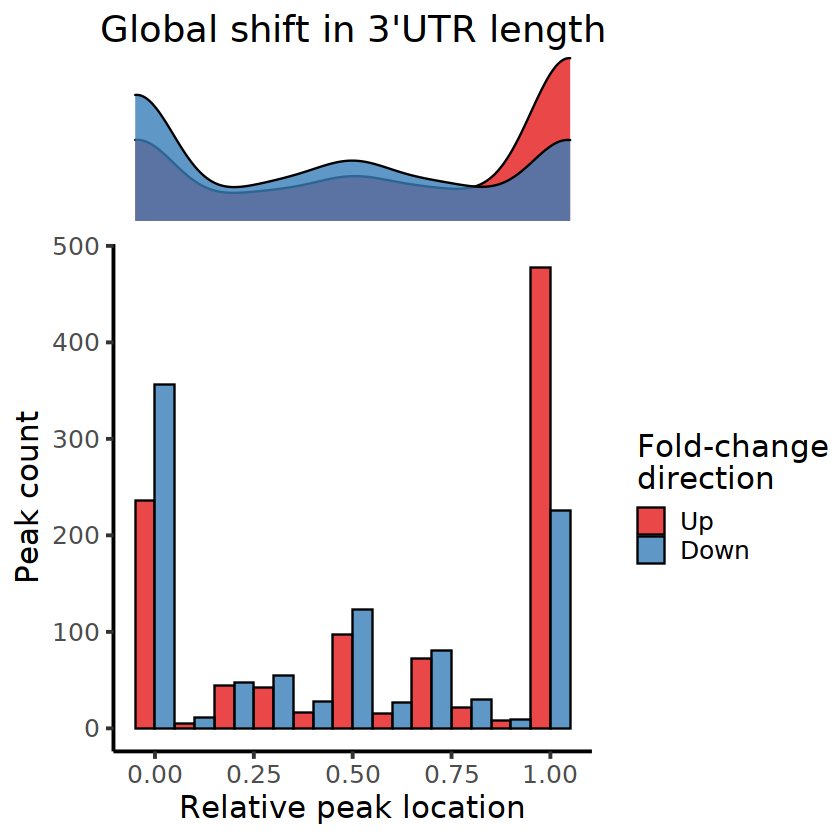

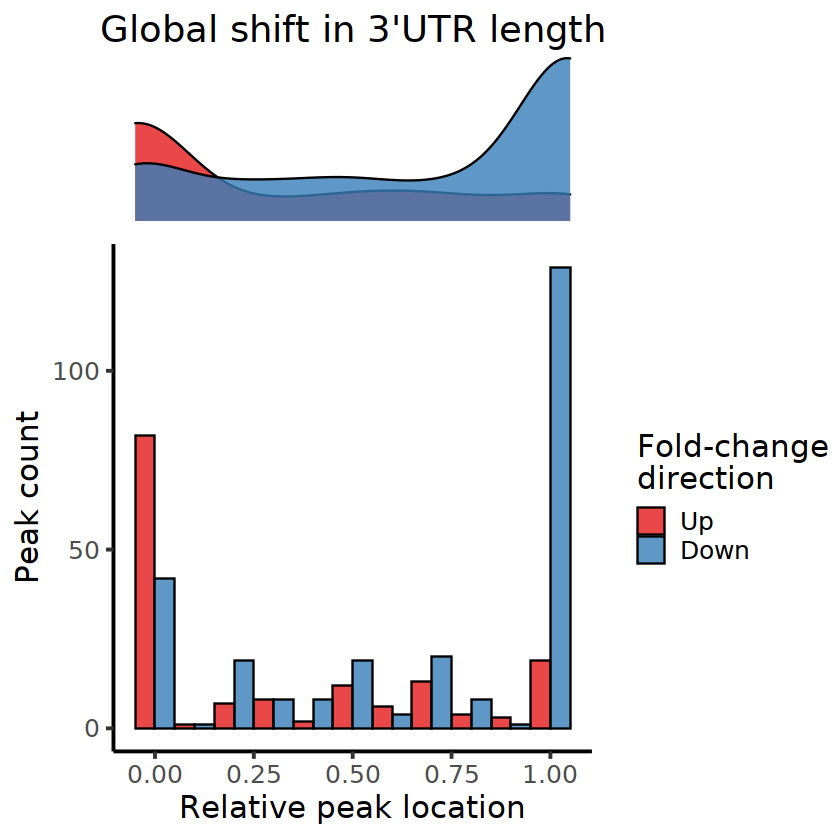

$C9ALSFTLD

$C9ALSnoFTLD

$sALSnoFTLD

$c9noALSnoFTLD


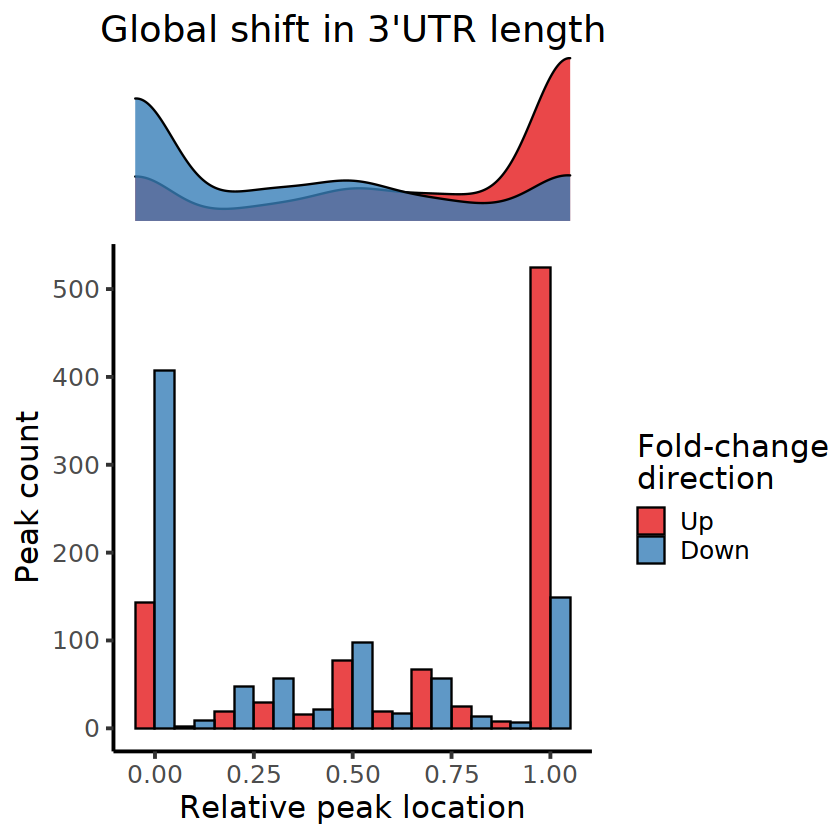

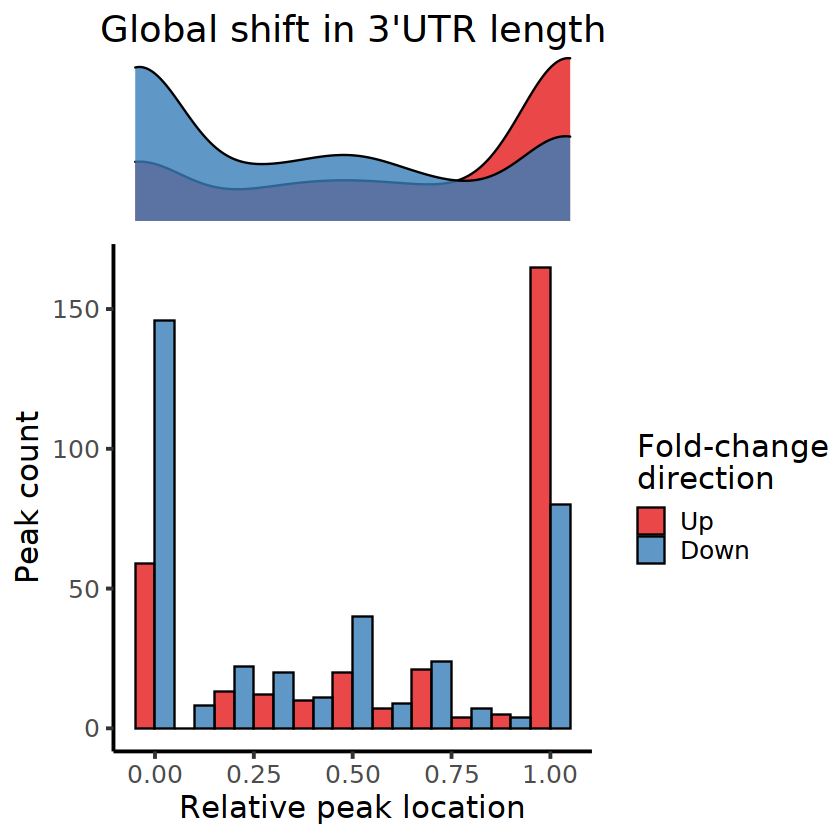

In [13]:
## Inhibitory_Neurons
inh_res <- utrshift_from_all('Inhibitory_Neurons')
inh_res

[1] "C9ALSFTLD"
[1] "7222 expressed peaks in feature types UTR3"
[1] "6907 peaks after filtering out A-rich annotations"
[1] "1411 genes detected with multiple peak sites expressed"
[1] "5696 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 0.00227528687383838"
[1] "c9ALSnoFTLD"
[1] "7058 expressed peaks in feature types UTR3"
[1] "6749 peaks after filtering out A-rich annotations"
[1] "1379 genes detected with multiple peak sites expressed"
[1] "5576 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 8.92811635933278e-34"
[1] "sALSnoFTLD"
[1] "7122 expressed peaks in feature types UTR3"
[1] "6809 peaks after filtering out A-rich annotations"
[1] "1387 genes detected with multiple peak sites expressed"
[1] "5614 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 8.14498960793718e-21"
[1] "c9noALSnoFTLD"
[1] "7042 expressed peaks in feature types UTR3"
[1] "6735 peaks after filtering out A-rich annotations"
[1] "1378 genes detected with multiple peak sites expressed"
[1] "5570 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 6.83074163546155e-16"


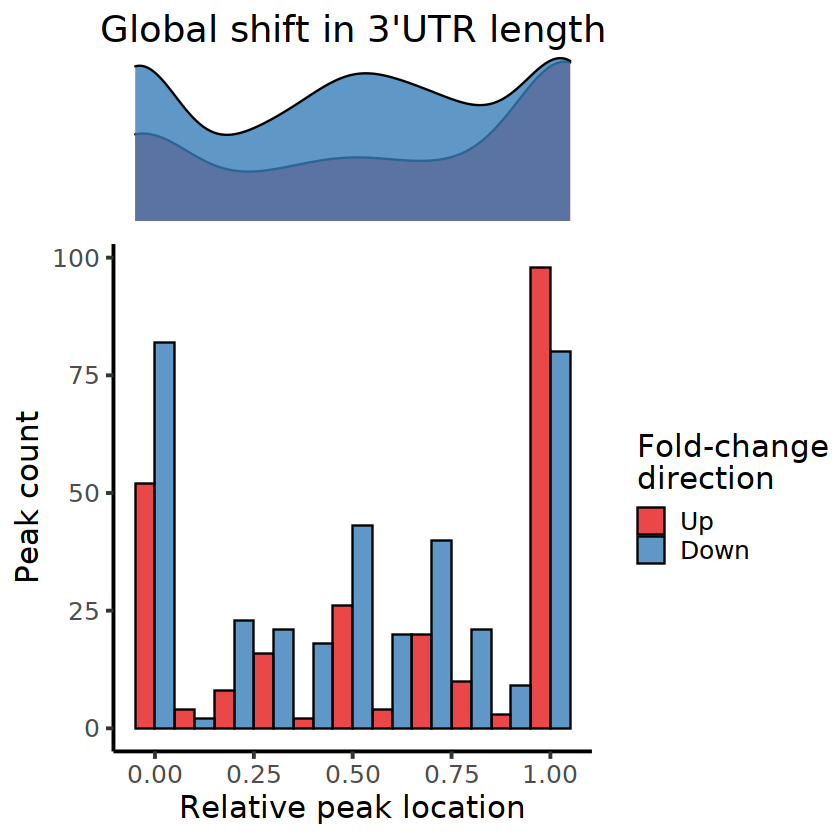

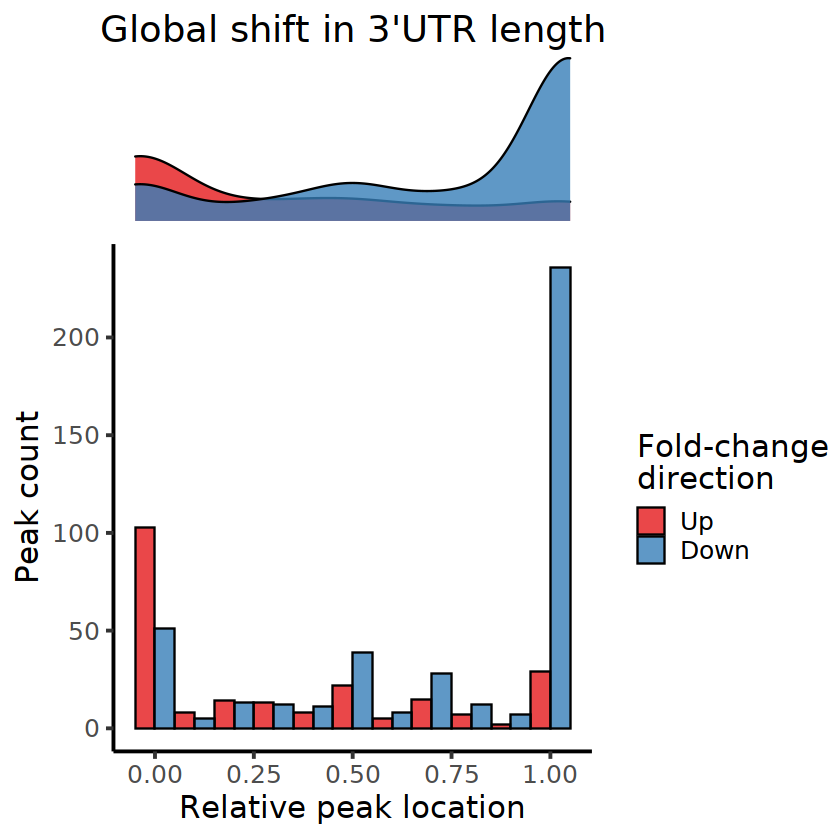

$C9ALSFTLD

$C9ALSnoFTLD

$sALSnoFTLD

$c9noALSnoFTLD


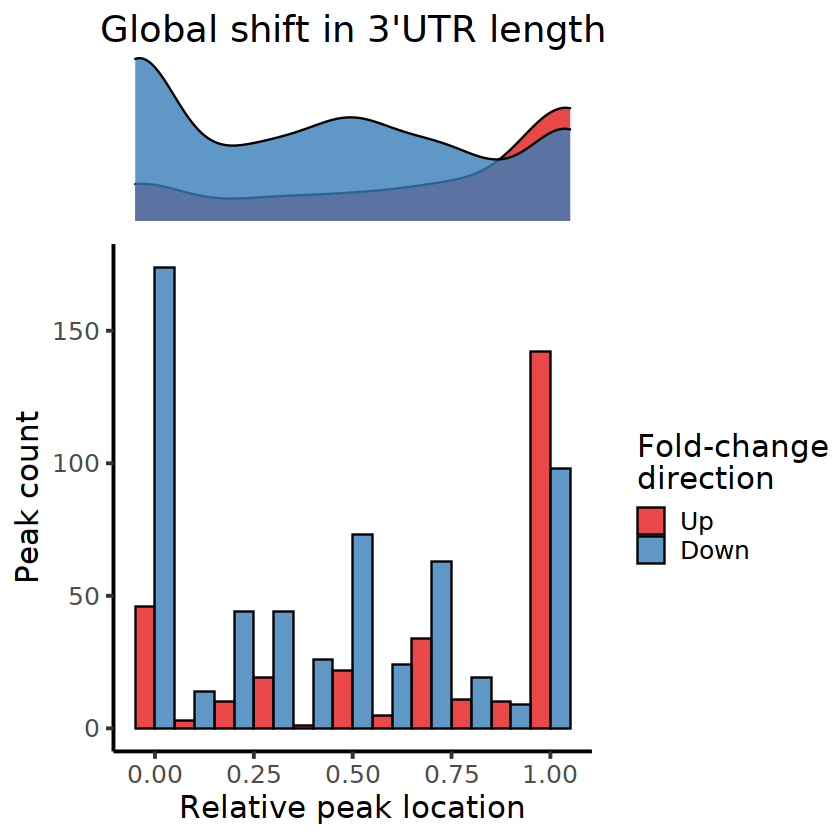

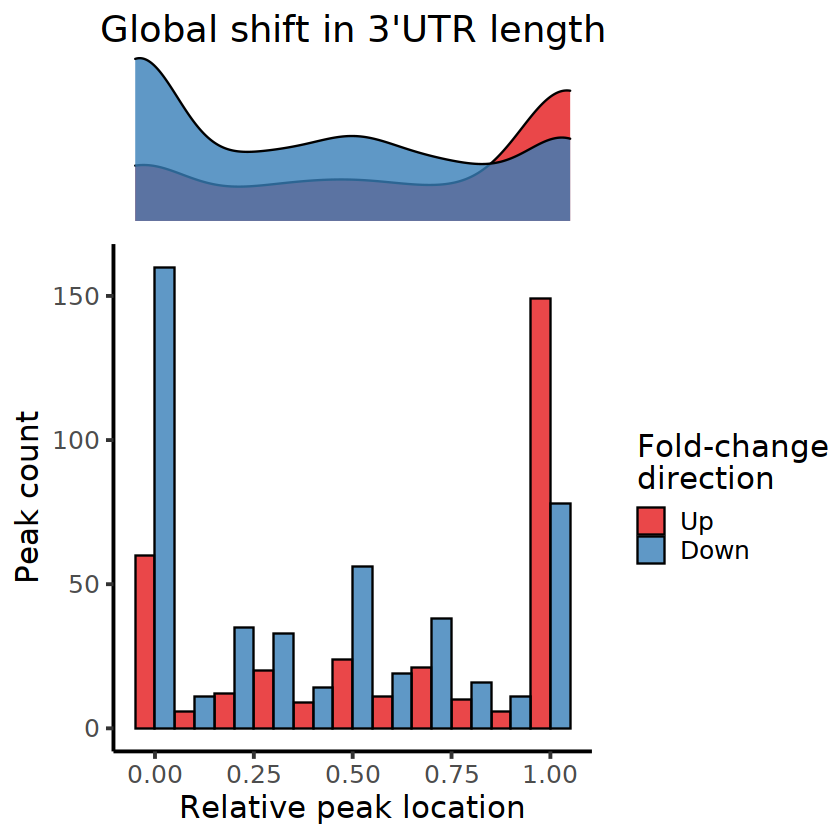

In [14]:
## Oligodendrocytes 
olg_res <- utrshift_from_all('Oligodendrocytes')
olg_res

[1] "C9ALSFTLD"
[1] "8070 expressed peaks in feature types UTR3"
[1] "7654 peaks after filtering out A-rich annotations"
[1] "1652 genes detected with multiple peak sites expressed"
[1] "5869 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 0.0023704429262454"
[1] "c9ALSnoFTLD"
[1] "8212 expressed peaks in feature types UTR3"
[1] "7776 peaks after filtering out A-rich annotations"
[1] "1662 genes detected with multiple peak sites expressed"
[1] "5974 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 2.07987869421873e-45"
[1] "sALSnoFTLD"
[1] "8313 expressed peaks in feature types UTR3"
[1] "7888 peaks after filtering out A-rich annotations"
[1] "1707 genes detected with multiple peak sites expressed"
[1] "6070 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 6.21855504326124e-25"
[1] "c9noALSnoFTLD"
[1] "7979 expressed peaks in feature types UTR3"
[1] "7570 peaks after filtering out A-rich annotations"
[1] "1631 genes detected with multiple peak sites expressed"
[1] "5796 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 3.23352362182543e-09"


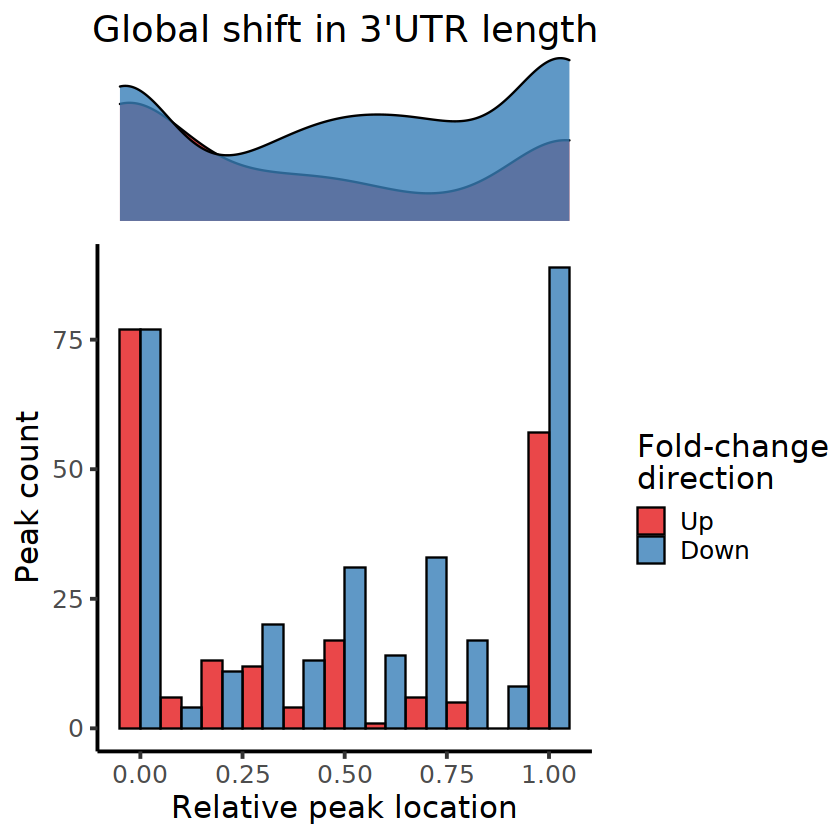

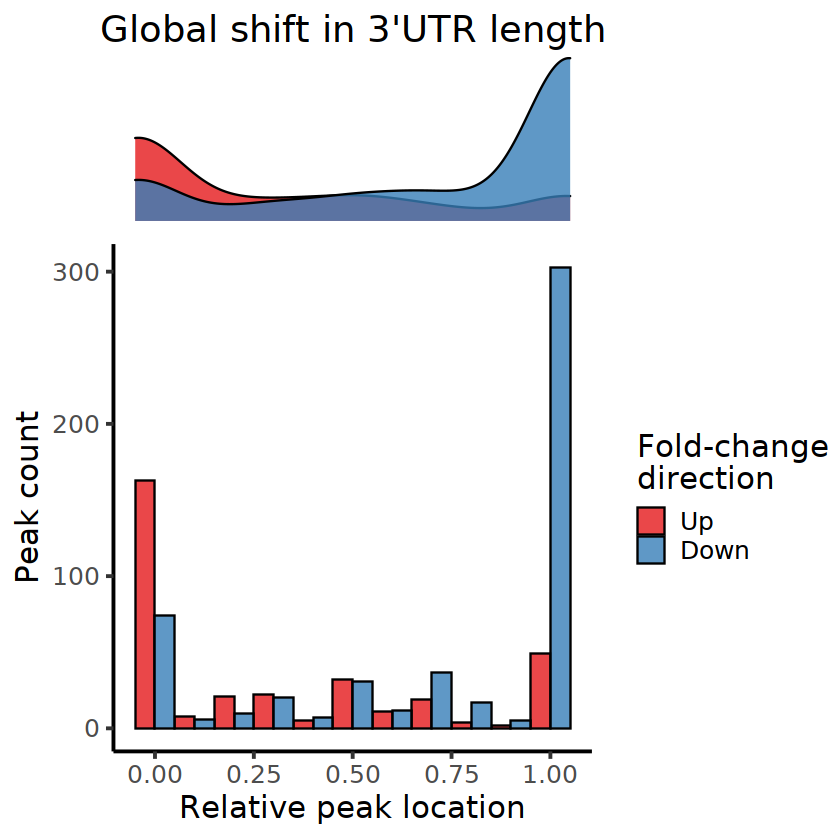

$C9ALSFTLD

$C9ALSnoFTLD

$sALSnoFTLD

$c9noALSnoFTLD


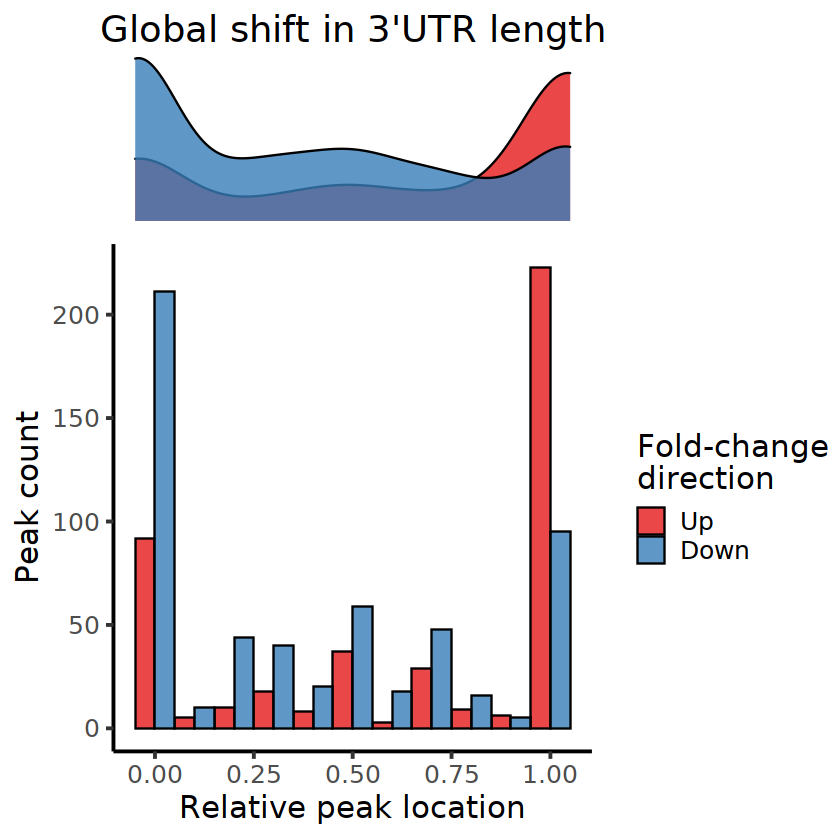

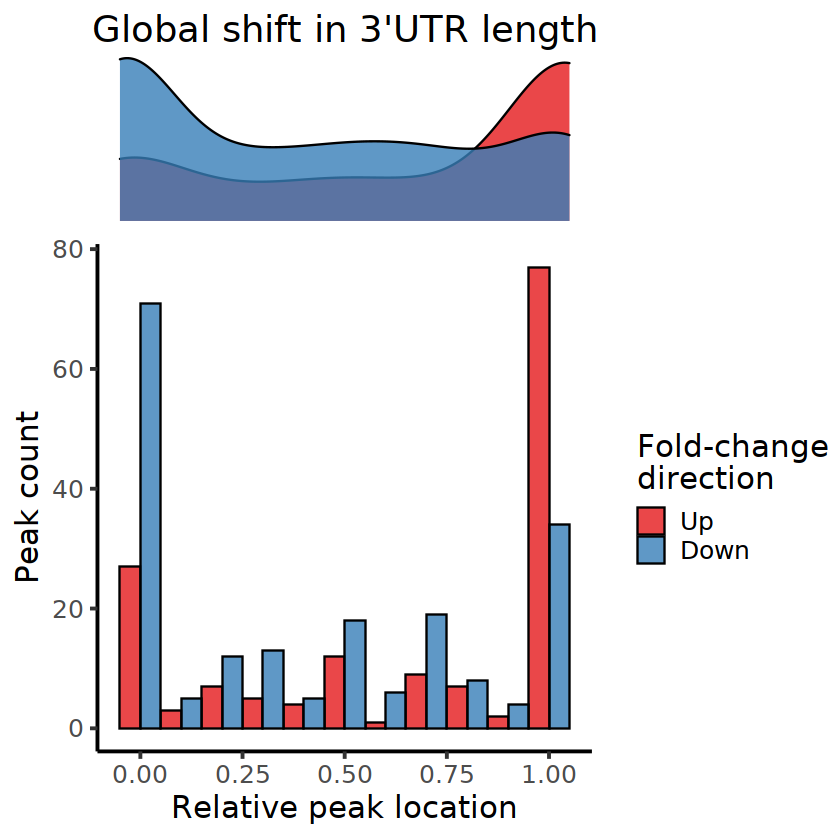

In [15]:
## Astrocytes 
ast_res <- utrshift_from_all('Astrocytes')
ast_res

In [16]:
## Astrocytes 
End_res <- utrshift_from_all('Endothelial')
End_res

[1] "C9ALSFTLD"
[1] "3836 expressed peaks in feature types UTR3"
[1] "3686 peaks after filtering out A-rich annotations"
[1] "920 genes detected with multiple peak sites expressed"
[1] "2672 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"


Warning message in wilcox.test.default(pos.upreg, pos.downreg):
"cannot compute exact p-value with ties"


[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 1"
[1] "c9ALSnoFTLD"
[1] "4147 expressed peaks in feature types UTR3"
[1] "3989 peaks after filtering out A-rich annotations"
[1] "978 genes detected with multiple peak sites expressed"
[1] "2905 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "No DU peaks identified"


ERROR: Error in subset.default(results.table, FC_direction == "Up"): object 'FC_direction' not found
